# TRANSFORMATION METHOD WEB ANALYTICS

In [ ]:
# Reding the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Spacy_CV_PARSER_NER/online_shoppers_intention.csv')
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [ ]:
df.shape


(12330, 18)

In [ ]:
#Converting the data types as required
df['OperatingSystems'] = df['OperatingSystems'].astype('object')
df['Browser'] = df['Browser'].astype('object')
df['Region'] = df['Region'].astype('object')
df['TrafficType'] = df['TrafficType'].astype('object')
df['Revenue']= df['Revenue'].replace({True:'Yes',False:'No'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  object 
 12  Browser                  12330 non-null  object 
 13  Region                   12330 non-null  object 
 14  TrafficType           

In [ ]:
df.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  
count  12330.000000  12330.000000  12330.000000  12330.000000  
mean       0.022191      0.043073      5.889258      0.061427  
std        0.048488      0.048597     18.568437      0.198917  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.014286      0.000000      0.000000  
50%        0.003112      0.025156      0.000000      0.000000  
75%        0.016813      0.050000      0.000000      0.000000  
max        0.200000      0.200000    361.763742      1.000000

In [ ]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

# Univariate Analysis

Countplots

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize'] = [12,6]

import warnings
warnings.filterwarnings('ignore')

In [ ]:
url = '/content/drive/MyDrive/Spacy_CV_PARSER_NER/online_shoppers_intention.csv'
raw = pd.read_csv(url)
df = raw.copy()

In [ ]:
import scipy.stats as st
from scipy.stats import chi2_contingency
def chi_squared_test_result(col):

    x = df.groupby(['Revenue', col])[col].count().unstack(1).fillna(0).astype('int')
    print(x.values)
    test_results = chi2_contingency(x.values)
    pval = test_results[1]
    print(pval)
    print('%.4f' % pval)
    if pval<0.05:
        print(pval<0.05)
        print(f"P-value: {pval:.4f} - \n\nIt means we can **reject the null hypothesis (at 95% CI)** and conclude that **Revenue is dependent on {col}.**")
    else:
        print(f"P-value: {pval:.4f} - \n\nFailed to reject null hypothesis. Both **Revenue is independent on {col}.**")

In [ ]:
def plot_data_count(df, col, return_pct_share=True, hue=None, figsize=(12,6)):

    plt.figure(figsize=figsize)
    g = sns.countplot(data=df, x=col, hue=hue,order=df[col].value_counts(ascending=False).index)
    for rect in g.patches:
        h = rect.get_height()
        w = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()
        g.annotate(f"{h}", (x+w/2, h), ha='center', va='bottom', fontsize=12)
    g.legend()
    g.spines['top'].set_visible(False)
    g.spines['right'].set_visible(False)
    g.spines['left'].set_visible(False)
    plt.show()
    if return_pct_share:
        print("\n")
        print("Percent share for each category:")
        print(df[col].value_counts(normalize=True)*100)

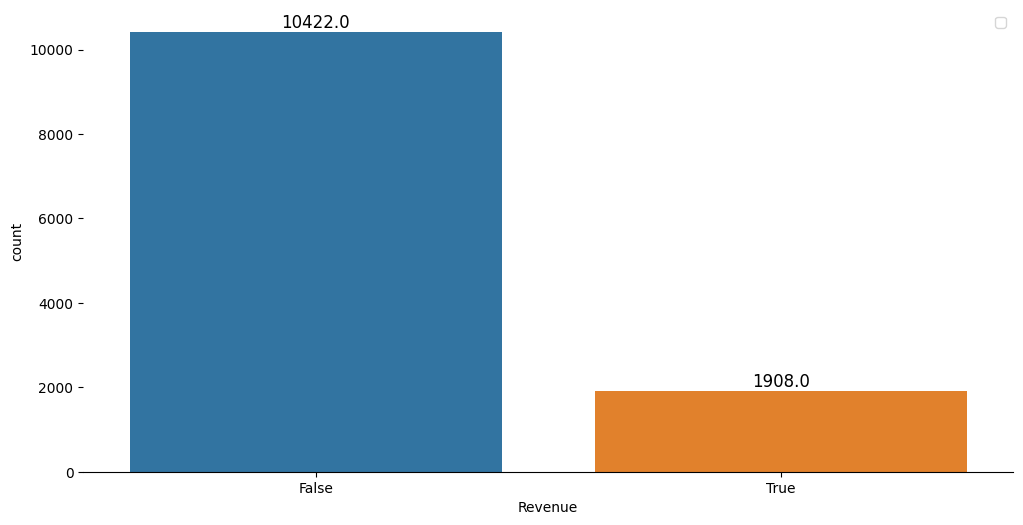



Percent share for each category:
False    84.525547
True     15.474453
Name: Revenue, dtype: float64


In [ ]:
plot_data_count(df, 'Revenue')

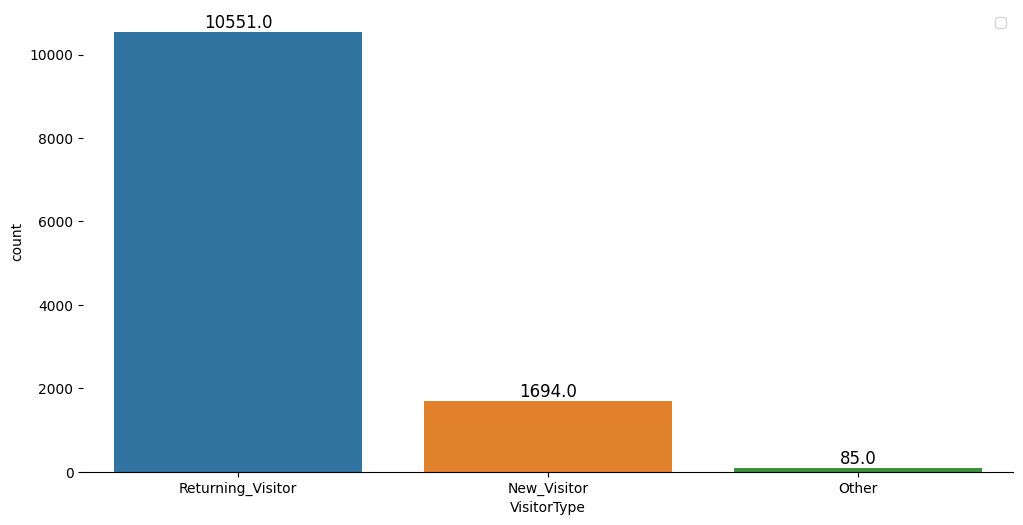



Percent share for each category:
Returning_Visitor    85.571776
New_Visitor          13.738848
Other                 0.689376
Name: VisitorType, dtype: float64


In [ ]:
plot_data_count(df, 'VisitorType')

In [ ]:
df_trc = df[['TrafficType','Revenue']]
df_trc

TrafficType  Revenue
0                1    False
1                2    False
2                3    False
3                4    False
4                4    False
...            ...      ...
12325            1    False
12326            8    False
12327           13    False
12328           11    False
12329            2    False

[12330 rows x 2 columns]

In [ ]:
df_tr_c = {1 :"Direct",2:"Google",3:"Partners",4:"youtube",5:"facebook",6:"dfa",7:"etsi",8:"mail.google",9:"yahoo",10:"quora"
,11:"gophergala",12:"reddit",13:"google.co.in",14:"sites.google.com",15:"mail.yahoo",
16:"squishable",17:"phandroid.com",18:"google.co.jp",19:"google.co.za",20:"qita"}
df_trc = df_trc.replace({"TrafficType": df_tr_c})
df_trc

TrafficType  Revenue
0            Direct    False
1            Google    False
2          Partners    False
3           youtube    False
4           youtube    False
...             ...      ...
12325        Direct    False
12326   mail.google    False
12327  google.co.in    False
12328    gophergala    False
12329        Google    False

[12330 rows x 2 columns]

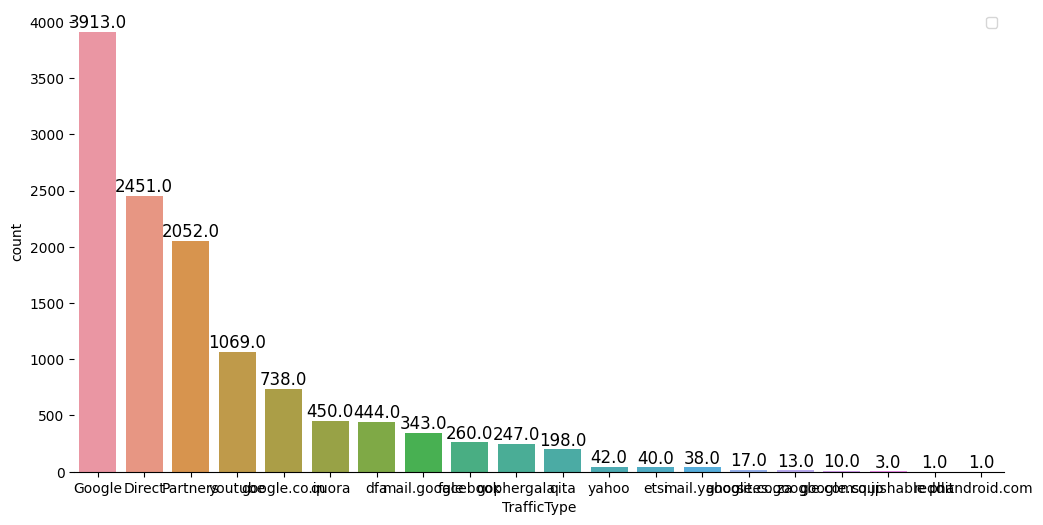



Percent share for each category:
Google              31.735604
Direct              19.878345
Partners            16.642336
youtube              8.669911
google.co.in         5.985401
quora                3.649635
dfa                  3.600973
mail.google          2.781833
facebook             2.108678
gophergala           2.003244
qita                 1.605839
yahoo                0.340633
etsi                 0.324412
mail.yahoo           0.308191
google.co.za         0.137875
sites.google.com     0.105434
google.co.jp         0.081103
squishable           0.024331
reddit               0.008110
phandroid.com        0.008110
Name: TrafficType, dtype: float64


In [ ]:
plot_data_count(df_trc, 'TrafficType')

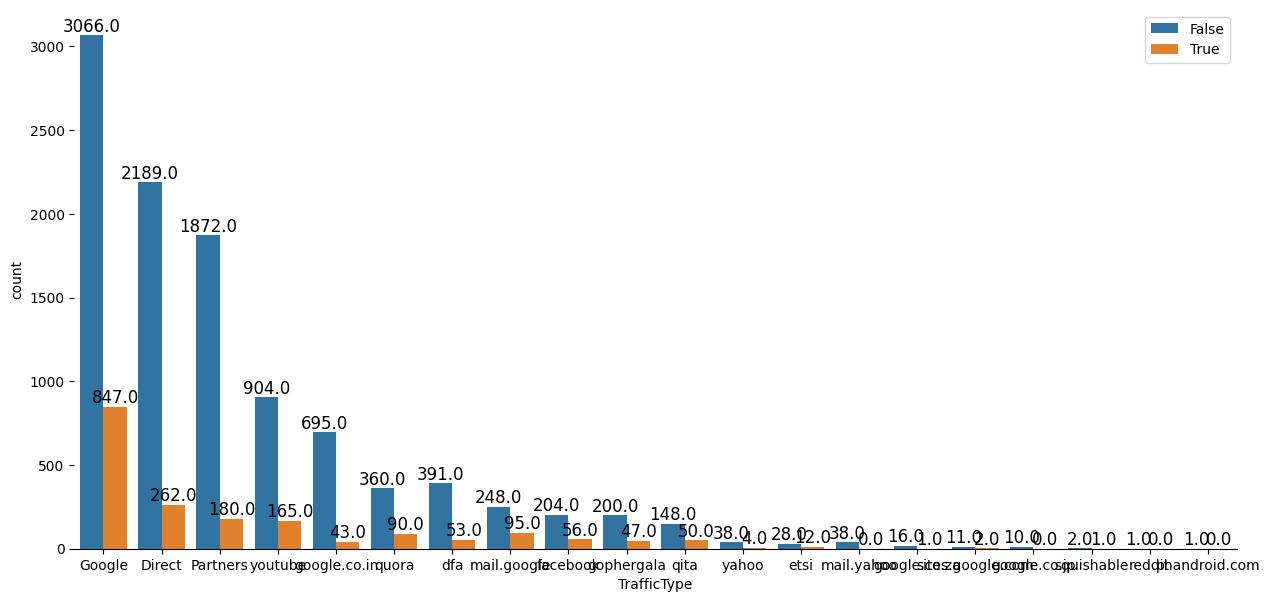

[[2189 3066 1872  904  204  391   28  248   38  360  200    1  695   11
    38    2    1   10   16  148]
 [ 262  847  180  165   56   53   12   95    4   90   47    0   43    2
     0    1    0    0    1   50]]
1.652735258160153e-67
0.0000
True
P-value: 0.0000 - 

It means we can **reject the null hypothesis (at 95% CI)** and conclude that **Revenue is dependent on TrafficType.**


In [ ]:
plot_data_count(df_trc, col='TrafficType', return_pct_share=False, hue='Revenue', figsize=(15,7))
chi_squared_test_result('TrafficType')

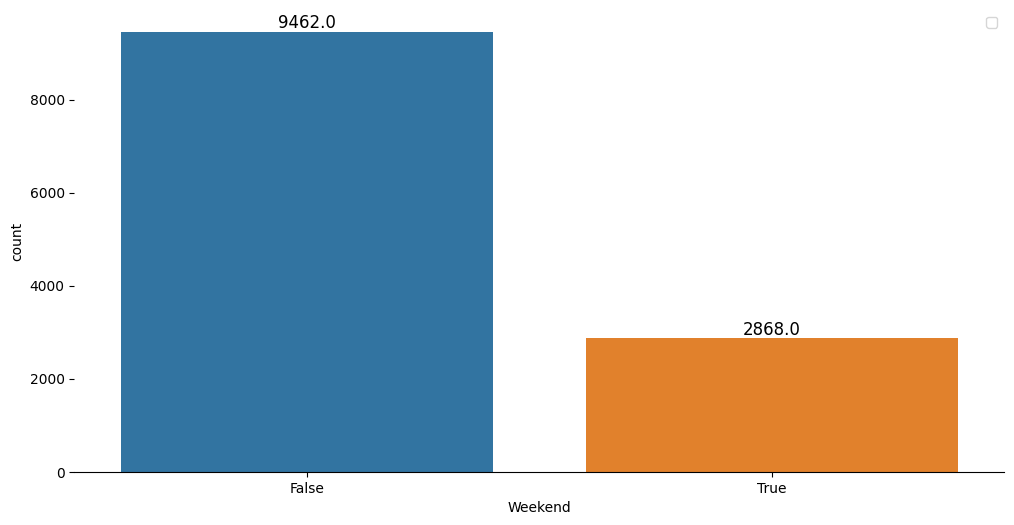



Percent share for each category:
False    76.739659
True     23.260341
Name: Weekend, dtype: float64


In [ ]:
plot_data_count(df, 'Weekend')

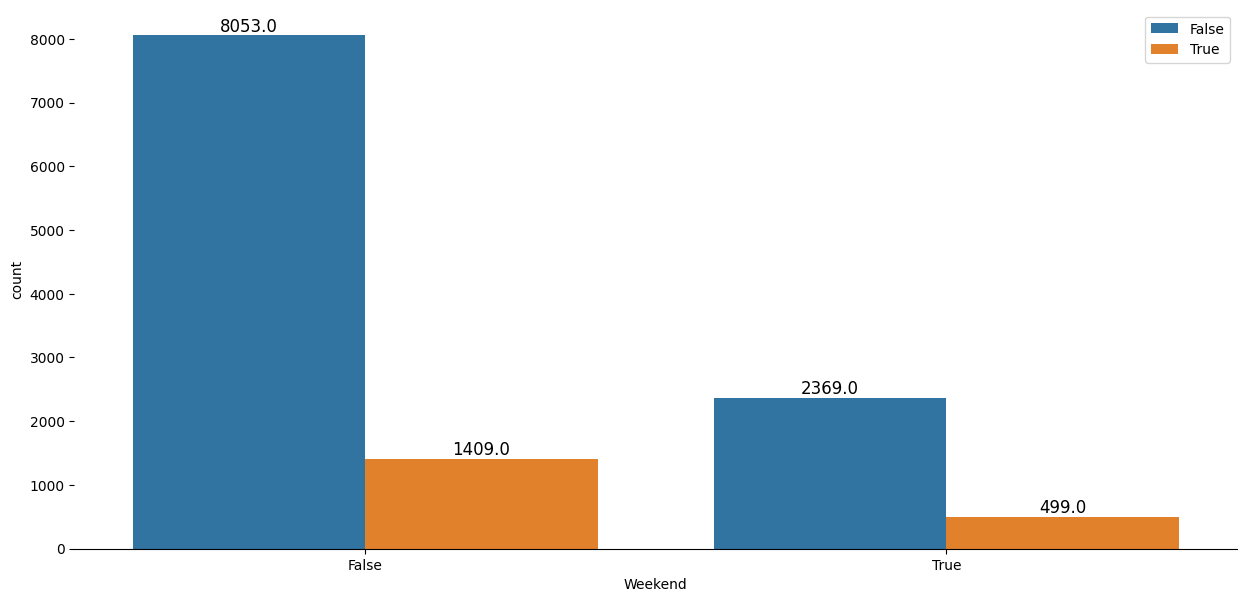

[[8053 2369]
 [1409  499]]
0.0012663251061221968
0.0013
True
P-value: 0.0013 - 

It means we can **reject the null hypothesis (at 95% CI)** and conclude that **Revenue is dependent on Weekend.**


In [ ]:
plot_data_count(df, col='Weekend', return_pct_share=False, hue='Revenue', figsize=(15,7))

# chi-squared test
chi_squared_test_result('Weekend')

In [ ]:
df_rg = df[['Region','Revenue']]
df_rg

Region  Revenue
0           1    False
1           1    False
2           9    False
3           2    False
4           1    False
...       ...      ...
12325       1    False
12326       1    False
12327       1    False
12328       3    False
12329       1    False

[12330 rows x 2 columns]

In [ ]:
replace_values = {1 :"UK",2:"USA",3:"India",4:"Canada",5:"AMC",6:"Turkey",7:"Germany",8:"Ukraine",9:"NE"}
df_rg = df_rg.replace({"Region": replace_values})
df_rg

Region  Revenue
0         UK    False
1         UK    False
2         NE    False
3        USA    False
4         UK    False
...      ...      ...
12325     UK    False
12326     UK    False
12327     UK    False
12328  India    False
12329     UK    False

[12330 rows x 2 columns]

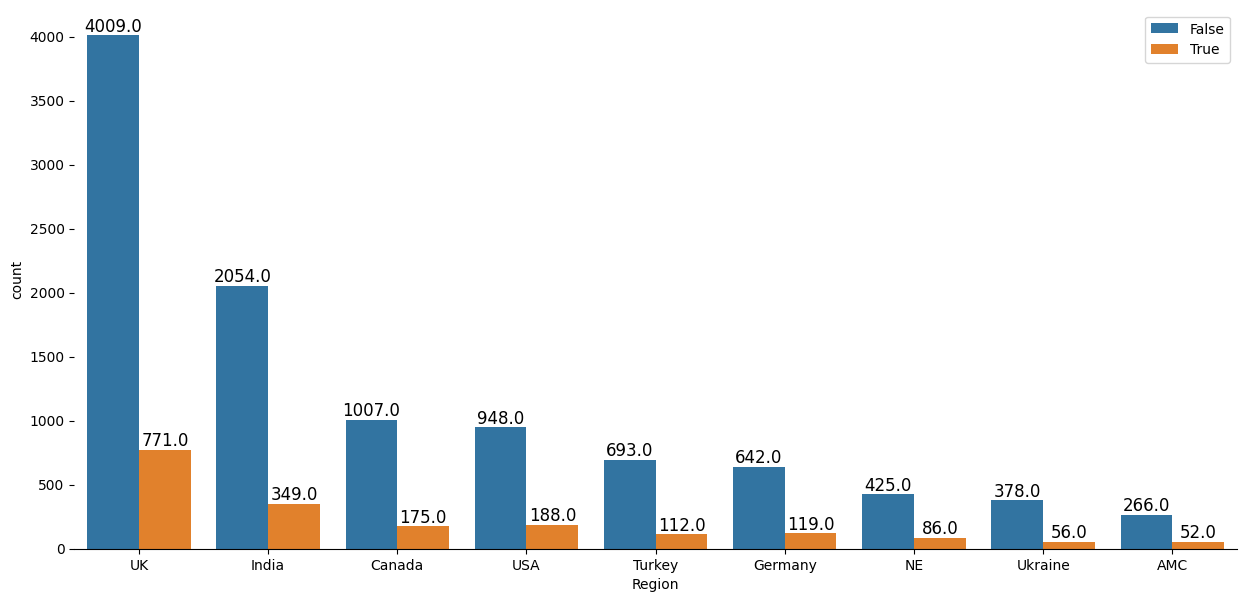

[[4009  948 2054 1007  266  693  642  378  425]
 [ 771  188  349  175   52  112  119   56   86]]
0.3214249979076556
0.3214
P-value: 0.3214 - 

Failed to reject null hypothesis. Both **Revenue is independent on Region.**


In [ ]:
plot_data_count(df_rg, col='Region', return_pct_share=False, hue='Revenue', figsize=(15,7))

# chi-squared test
chi_squared_test_result('Region')

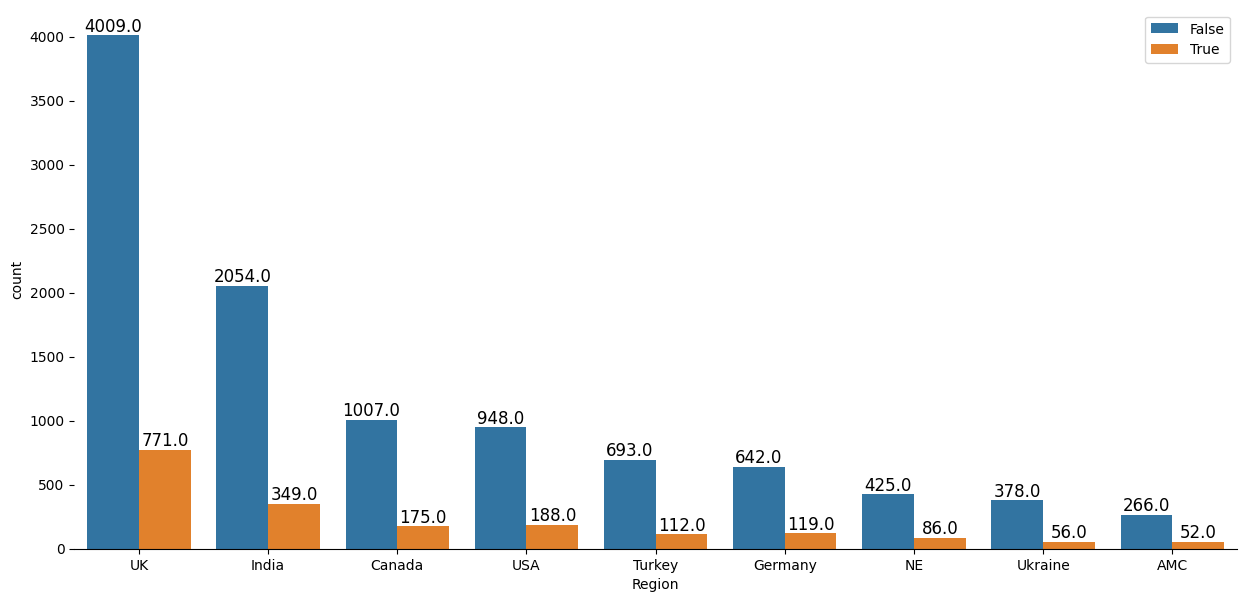

[[4009  948 2054 1007  266  693  642  378  425]
 [ 771  188  349  175   52  112  119   56   86]]
0.3214249979076556
0.3214
P-value: 0.3214 - 

Failed to reject null hypothesis. Both **Revenue is independent on Region.**


In [ ]:
plot_data_count(df_rg, col='Region', return_pct_share=False, hue='Revenue', figsize=(15,7))

# chi-squared test
chi_squared_test_result('Region')

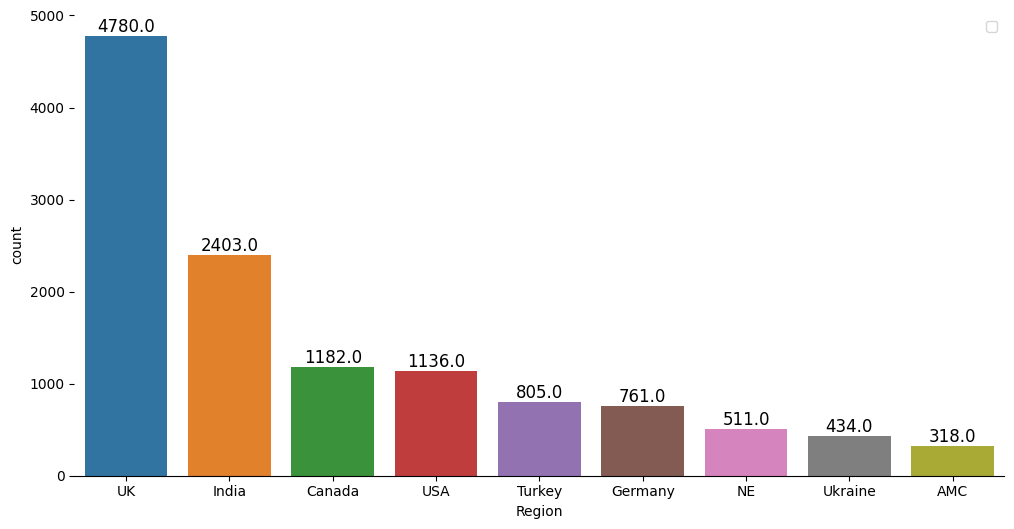



Percent share for each category:
UK         38.767234
India      19.489051
Canada      9.586375
USA         9.213301
Turkey      6.528792
Germany     6.171938
NE          4.144363
Ukraine     3.519870
AMC         2.579075
Name: Region, dtype: float64


In [ ]:
plot_data_count(df_rg, 'Region')

In [ ]:
df_br = df[['Browser','Revenue']]
df_br

Browser  Revenue
0            1    False
1            2    False
2            1    False
3            2    False
4            3    False
...        ...      ...
12325        6    False
12326        2    False
12327        2    False
12328        2    False
12329        2    False

[12330 rows x 2 columns]

In [ ]:
replace_values_br = {1 :"MozillaFirefox",2:"GoogleChrome",3:"Opera",4:"Safari",5:"Brave",6:"Vialid",
                     7:"Uc Browser",8:"Opera mini",9:"Lynx",10:"Internet explorer",11:"MicrosoftEdge",12:"Android Browser",13:"Arc"}

In [ ]:
df_br = df_br.replace({"Browser": replace_values_br})
df_br

Browser  Revenue
0      MozillaFirefox    False
1        GoogleChrome    False
2      MozillaFirefox    False
3        GoogleChrome    False
4               Opera    False
...               ...      ...
12325          Vialid    False
12326    GoogleChrome    False
12327    GoogleChrome    False
12328    GoogleChrome    False
12329    GoogleChrome    False

[12330 rows x 2 columns]

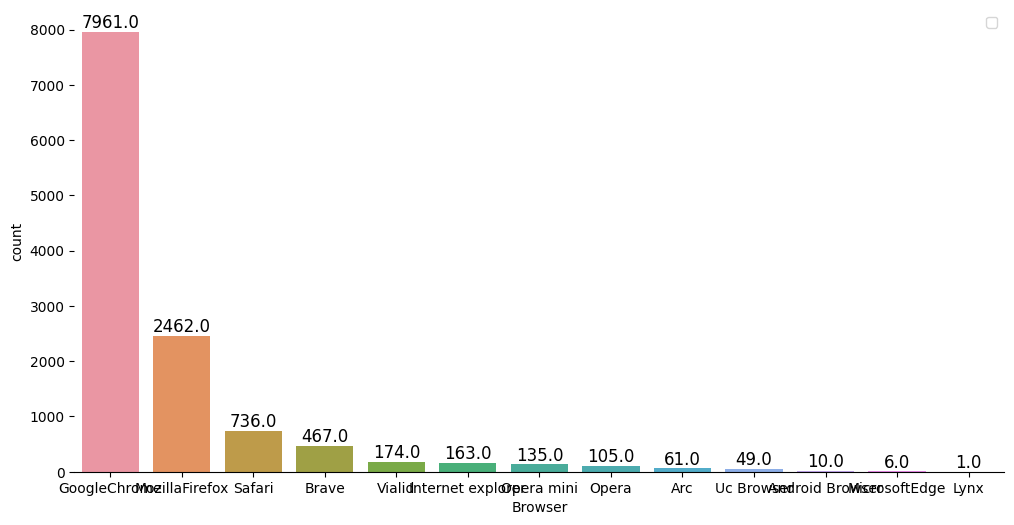



Percent share for each category:
GoogleChrome         64.566099
MozillaFirefox       19.967559
Safari                5.969181
Brave                 3.787510
Vialid                1.411192
Internet explorer     1.321979
Opera mini            1.094891
Opera                 0.851582
Arc                   0.494728
Uc Browser            0.397405
Android Browser       0.081103
MicrosoftEdge         0.048662
Lynx                  0.008110
Name: Browser, dtype: float64


In [ ]:
plot_data_count(df_br, 'Browser')

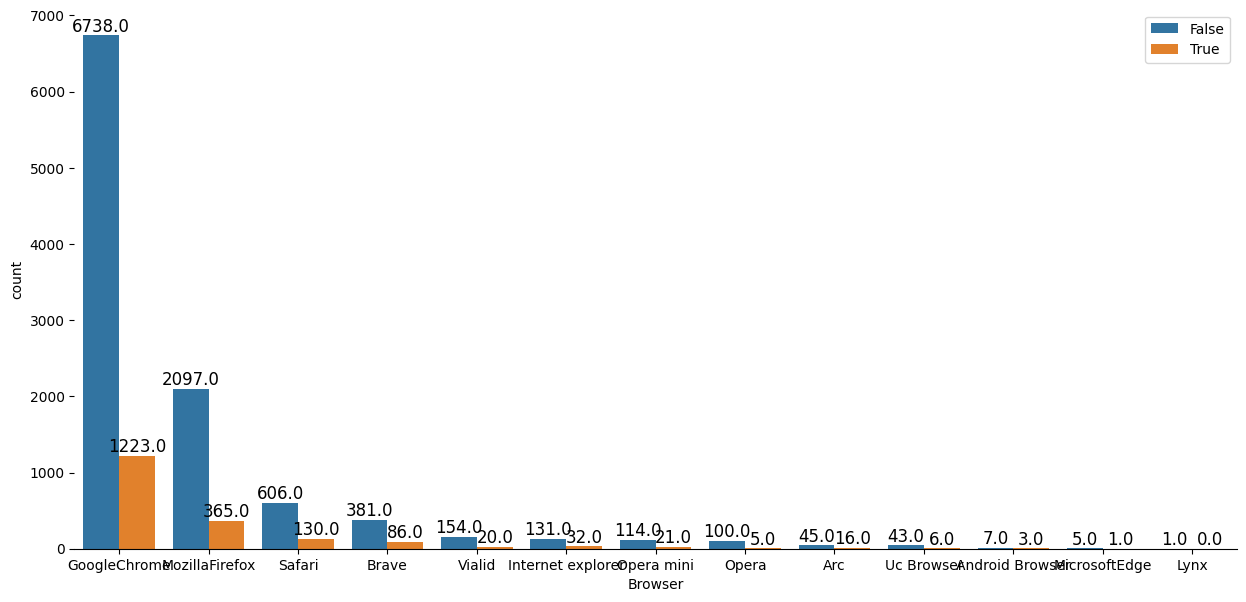

[[2097 6738  100  606  381  154   43  114    1  131    5    7   45]
 [ 365 1223    5  130   86   20    6   21    0   32    1    3   16]]
0.00608754317955108
0.0061
True
P-value: 0.0061 - 

It means we can **reject the null hypothesis (at 95% CI)** and conclude that **Revenue is dependent on Browser.**


In [ ]:
plot_data_count(df_br, col='Browser', return_pct_share=False, hue='Revenue', figsize=(15,7))

# chi-squared test
chi_squared_test_result('Browser')

In [ ]:
df_op = df[['OperatingSystems','Revenue']]
df_op

OperatingSystems  Revenue
0                     1    False
1                     2    False
2                     4    False
3                     3    False
4                     3    False
...                 ...      ...
12325                 4    False
12326                 3    False
12327                 3    False
12328                 2    False
12329                 3    False

[12330 rows x 2 columns]

In [ ]:
replace_values_op = {1 :"Linux",2:"Windows",3:"Android",4:"macos",5:"ios",6:"unix",7:"MS-DOS",8:"Ubuntu"}
df_op = df_op.replace({"OperatingSystems": replace_values_op})
df_op

OperatingSystems  Revenue
0                Linux    False
1              Windows    False
2                macos    False
3              Android    False
4              Android    False
...                ...      ...
12325            macos    False
12326          Android    False
12327          Android    False
12328          Windows    False
12329          Android    False

[12330 rows x 2 columns]

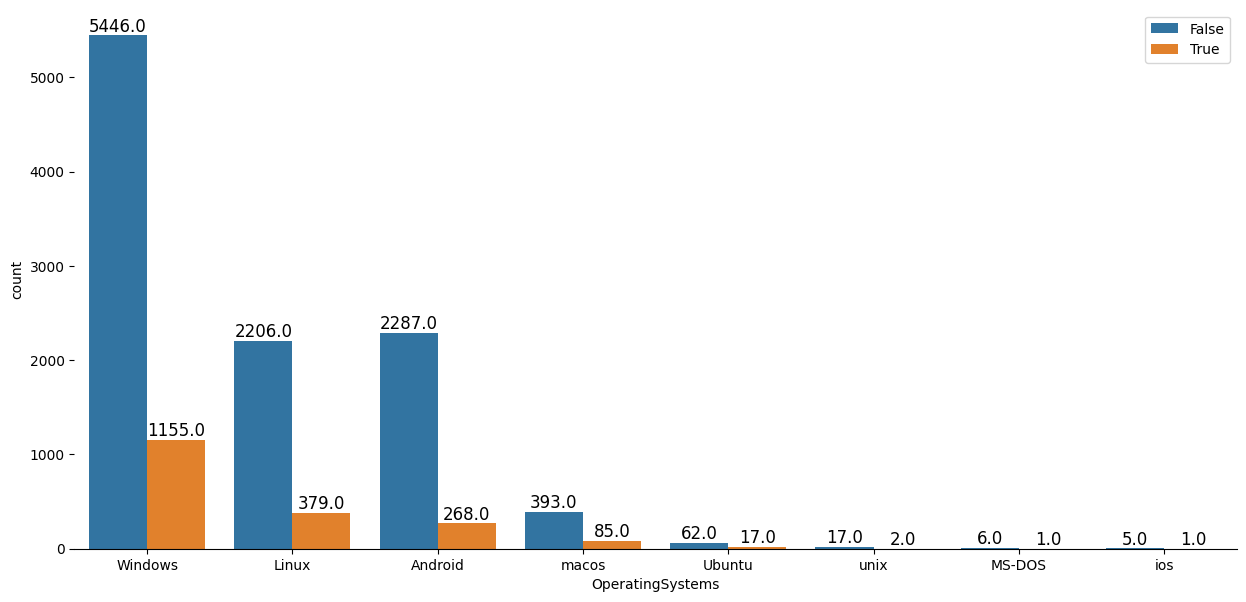

[[2206 5446 2287  393    5   17    6   62]
 [ 379 1155  268   85    1    2    1   17]]
1.4160941129614507e-13
0.0000
True
P-value: 0.0000 - 

It means we can **reject the null hypothesis (at 95% CI)** and conclude that **Revenue is dependent on OperatingSystems.**


In [ ]:
## Revenue and OperatingSystems

plot_data_count(df_op, col='OperatingSystems', return_pct_share=False, hue='Revenue', figsize=(15,7))

# chi-squared test
chi_squared_test_result('OperatingSystems')

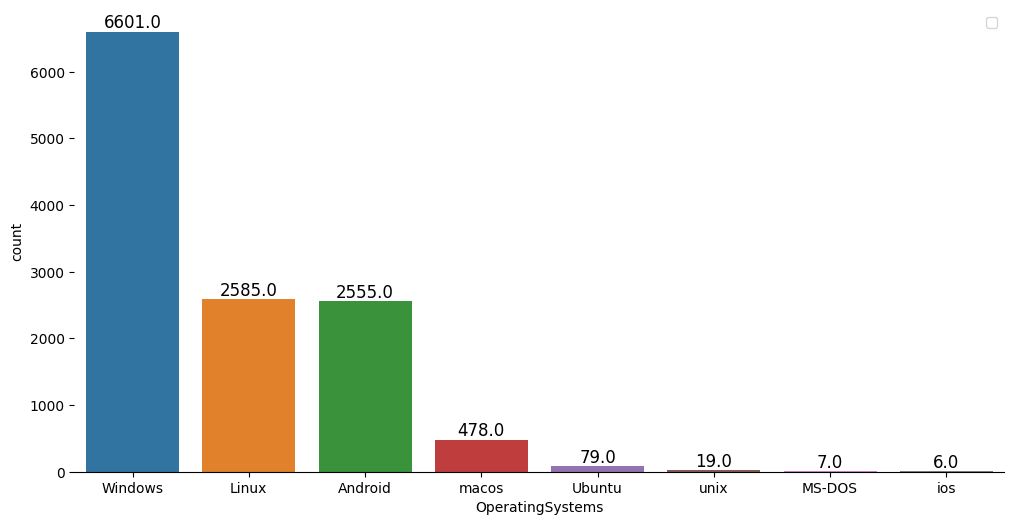



Percent share for each category:
Windows    53.536091
Linux      20.965126
Android    20.721817
macos       3.876723
Ubuntu      0.640714
unix        0.154096
MS-DOS      0.056772
ios         0.048662
Name: OperatingSystems, dtype: float64


In [ ]:
plot_data_count(df_op, 'OperatingSystems')

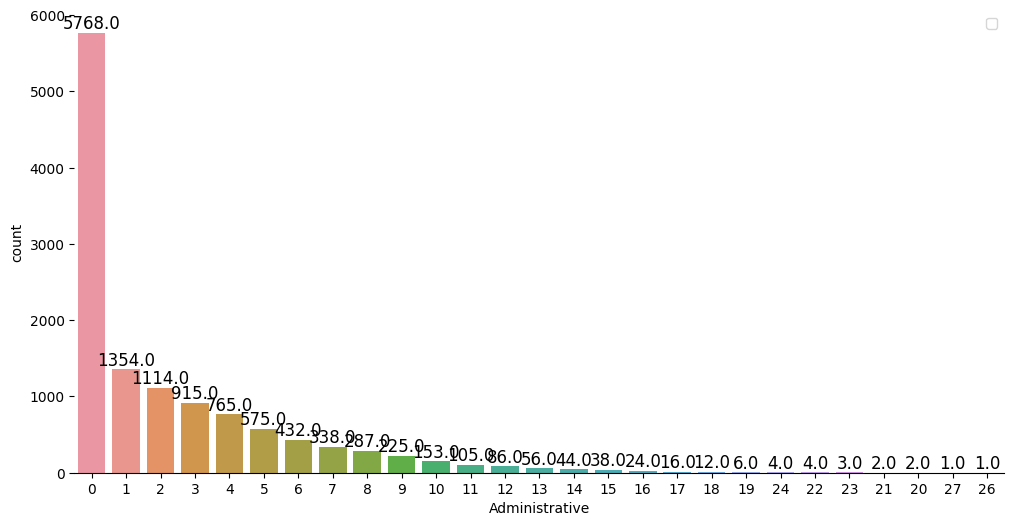



Percent share for each category:
0     46.780211
1     10.981346
2      9.034874
3      7.420925
4      6.204380
5      4.663423
6      3.503650
7      2.741281
8      2.327656
9      1.824818
10     1.240876
11     0.851582
12     0.697486
13     0.454177
14     0.356853
15     0.308191
16     0.194647
17     0.129765
18     0.097324
19     0.048662
24     0.032441
22     0.032441
23     0.024331
21     0.016221
20     0.016221
27     0.008110
26     0.008110
Name: Administrative, dtype: float64


In [ ]:
plot_data_count(df, 'Administrative')

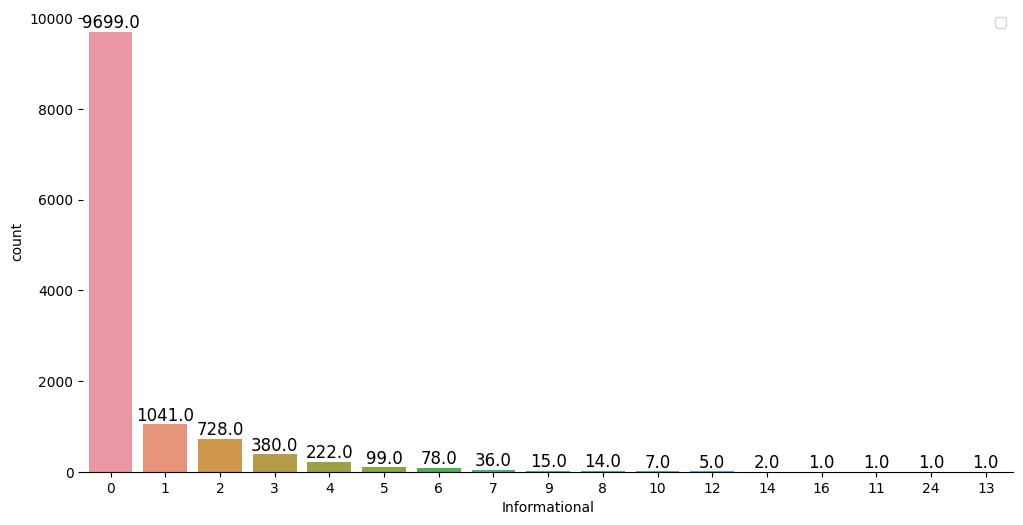



Percent share for each category:
0     78.661800
1      8.442822
2      5.904298
3      3.081914
4      1.800487
5      0.802920
6      0.632603
7      0.291971
9      0.121655
8      0.113544
10     0.056772
12     0.040552
14     0.016221
16     0.008110
11     0.008110
24     0.008110
13     0.008110
Name: Informational, dtype: float64


In [ ]:
plot_data_count(df, 'Informational')

In [ ]:
def plot_data_count(df, col, return_pct_share=True, hue=None, figsize=(12,6)):

    plt.figure(figsize=figsize)
    g = sns.countplot(data=df, x=col, hue=hue,order=df[col].value_counts(ascending=False).index)
    for rect in g.patches:
        h = rect.get_height()
        w = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()
        g.annotate(f"{h}", (x+w/2, h), ha='center', va='bottom', fontsize=12)
    g.legend()
    g.spines['top'].set_visible(False)
    g.spines['right'].set_visible(False)
    g.spines['left'].set_visible(False)
    plt.show()
    if return_pct_share:
        print("\n")
        print("Percent share for each category:")
        print(df[col].value_counts(normalize=True)*100)

1      5.044607
2      3.771290
3      3.714517
4      3.276561
6      3.211679
         ...   
243    0.008110
409    0.008110
262    0.008110
414    0.008110
192    0.008110
Name: ProductRelated, Length: 311, dtype: float64


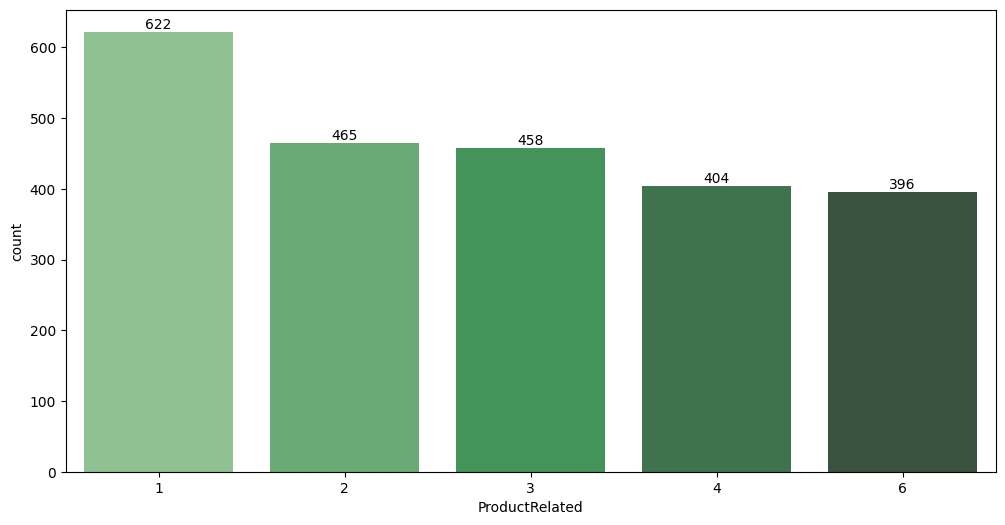

In [ ]:
out = sns.countplot(x='ProductRelated', hue=None, data=df, palette="Greens_d",
              order=df.ProductRelated.value_counts().iloc[:5].index)
out.bar_label(out.containers[0], label_type='edge')
print(df['ProductRelated'].value_counts(normalize=True)*100)

In [ ]:
df_sd = df[['SpecialDay','Revenue']]
df_sd

SpecialDay  Revenue
0             0.0    False
1             0.0    False
2             0.0    False
3             0.0    False
4             0.0    False
...           ...      ...
12325         0.0    False
12326         0.0    False
12327         0.0    False
12328         0.0    False
12329         0.0    False

[12330 rows x 2 columns]

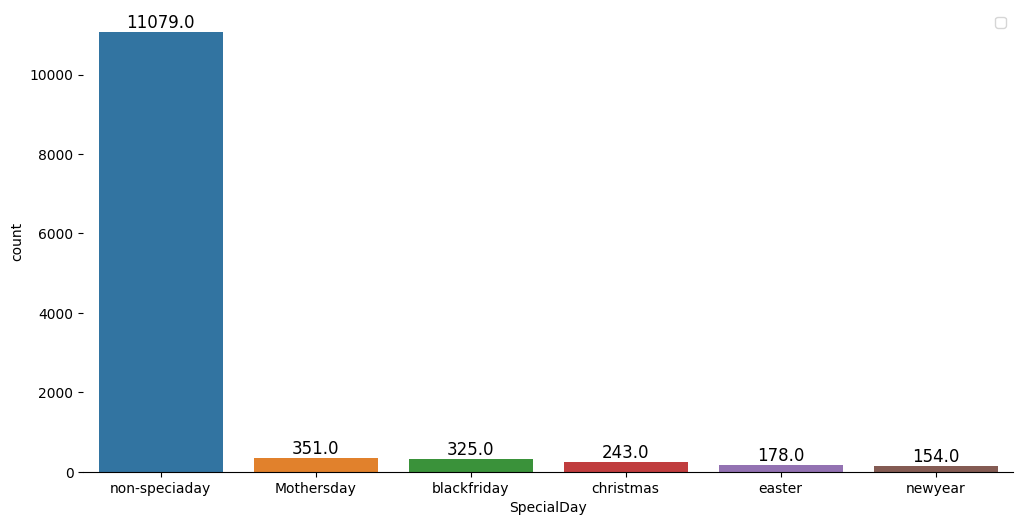



Percent share for each category:
non-speciaday    89.854015
Mothersday        2.846715
blackfriday       2.635848
christmas         1.970803
easter            1.443633
newyear           1.248986
Name: SpecialDay, dtype: float64


In [ ]:
replace_values_sd = {0.0 :"non-speciaday",0.6:"Mothersday",0.8:"blackfriday",0.4:"christmas",0.2:"easter",1:"newyear"}
df_sd = df_sd.replace({"SpecialDay": replace_values_sd})
df_sd
plot_data_count(df_sd, 'SpecialDay')

# Distribution Plots

In [ ]:
continuous_features = ['Administrative_Duration',
                       'Informational_Duration',
                       'ProductRelated_Duration',
                       'BounceRates',
                       'ExitRates',
                       'PageValues']

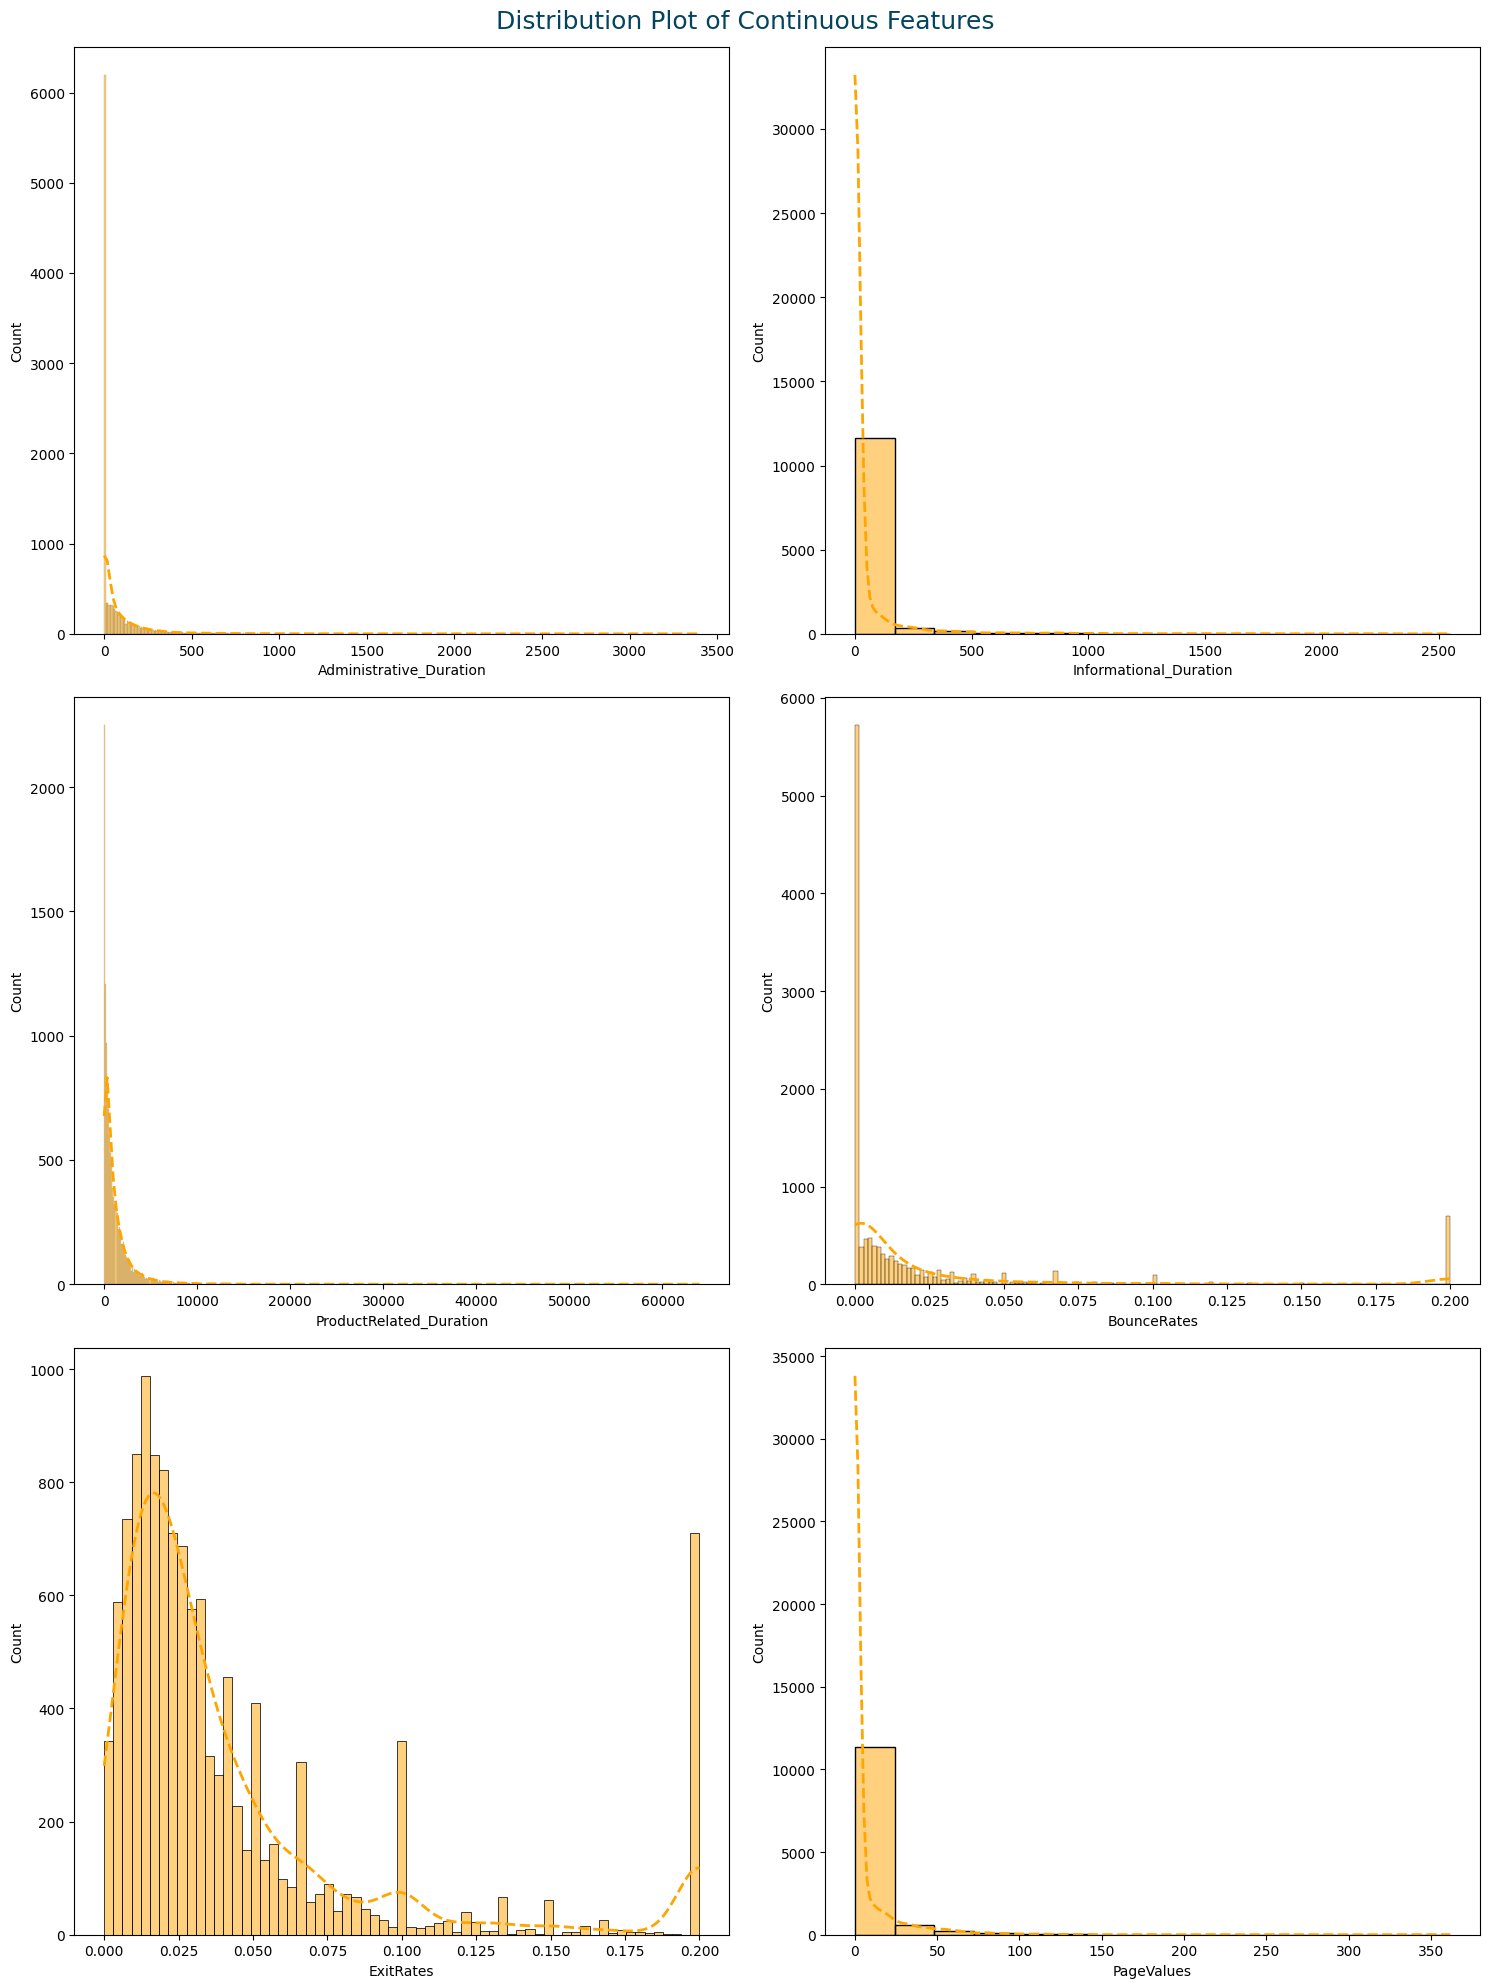

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,20))
axs = np.ravel(axs)
for i, col in enumerate(continuous_features):
    plt.sca(axs[i])
    sns.histplot(data=df, x=col, kde=True, line_kws={'lw':2, 'ls':'--'}, color='orange')

plt.suptitle("Distribution Plot of Continuous Features", fontsize=18, color='#05445E', va='bottom')
plt.tight_layout()
plt.show()

In [ ]:
df[continuous_features].describe()

Administrative_Duration  Informational_Duration  \
count             12330.000000            12330.000000   
mean                 80.818611               34.472398   
std                 176.779107              140.749294   
min                   0.000000                0.000000   
25%                   0.000000                0.000000   
50%                   7.500000                0.000000   
75%                  93.256250                0.000000   
max                3398.750000             2549.375000   

       ProductRelated_Duration   BounceRates     ExitRates    PageValues  
count             12330.000000  12330.000000  12330.000000  12330.000000  
mean               1194.746220      0.022191      0.043073      5.889258  
std                1913.669288      0.048488      0.048597     18.568437  
min                   0.000000      0.000000      0.000000      0.000000  
25%                 184.137500      0.000000      0.014286      0.000000  
50%                 598.936905      0.003112      0.025156      0.000000  
75%                1464.157214      0.016813      0.050000      0.000000  
max               63973.522230      0.200000      0.200000    361.763742

# Bivarient Analysis

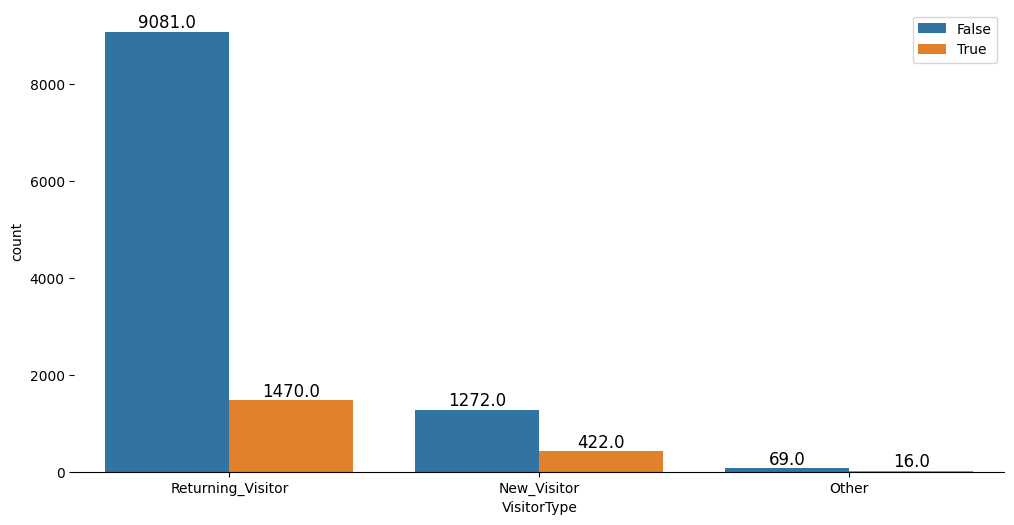

In [ ]:
## Visitor type
plot_data_count(df, col='VisitorType', return_pct_share=False, hue='Revenue')

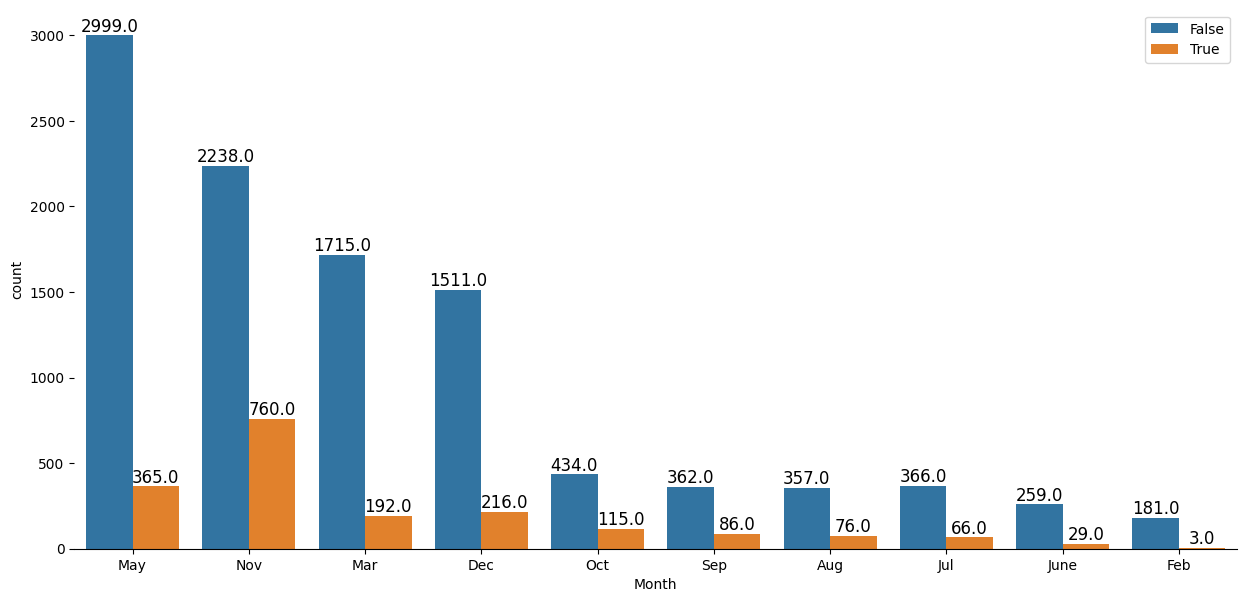

[[ 357 1511  181  366  259 1715 2999 2238  434  362]
 [  76  216    3   66   29  192  365  760  115   86]]
2.2387855164805443e-77
0.0000
True
P-value: 0.0000 - 

It means we can **reject the null hypothesis (at 95% CI)** and conclude that **Revenue is dependent on Month.**


In [ ]:
## Revenue and Month

plot_data_count(df, col='Month', return_pct_share=False, hue='Revenue', figsize=(15,7))

# chi-squared test
chi_squared_test_result('Month')

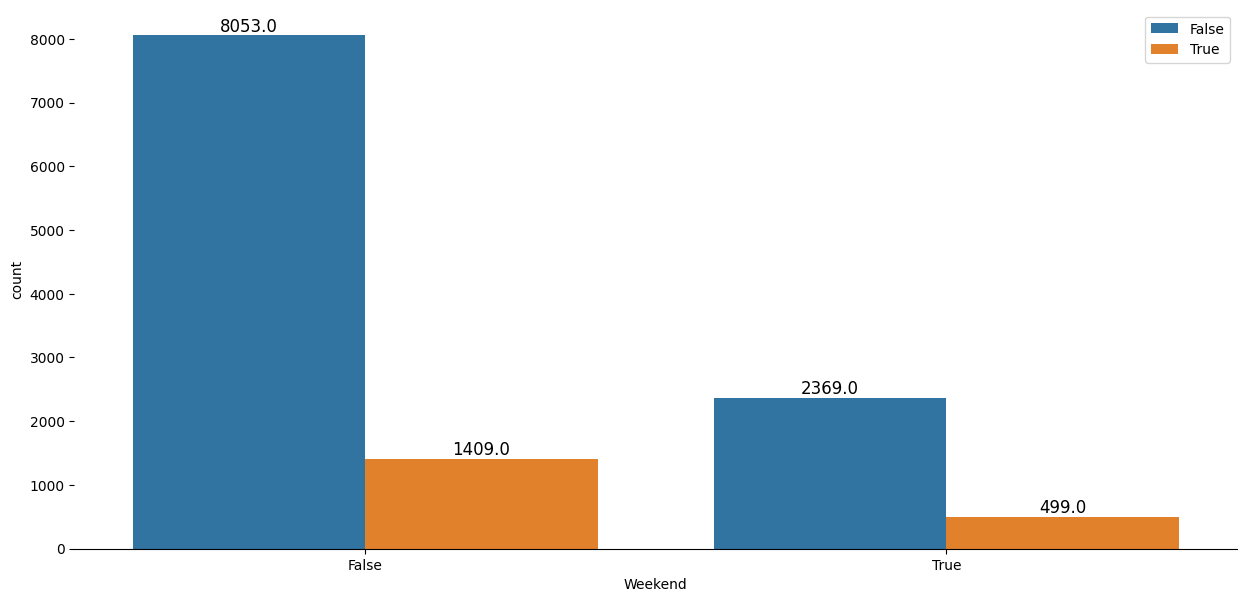

[[8053 2369]
 [1409  499]]
0.0012663251061221968
0.0013
True
P-value: 0.0013 - 

It means we can **reject the null hypothesis (at 95% CI)** and conclude that **Revenue is dependent on Weekend.**


In [ ]:
## Revenue and Month

plot_data_count(df, col='Weekend', return_pct_share=False, hue='Revenue', figsize=(15,7))

# chi-squared test
chi_squared_test_result('Weekend')

In [ ]:
discrete_features = ['Administrative', 'Informational',
                     'ProductRelated', 'Month',
                     'OperatingSystems', 'Browser',
                     'Region', 'TrafficType',
                     'VisitorType', 'Weekend']



chi_squared_df = pd.DataFrame(columns=['feature', 'pval', 'dependent'])

for i, col in enumerate(discrete_features):
    x = df.groupby(['Revenue', col])[col].count().unstack(1).fillna(0).astype('int')
    res = stats.chi2_contingency(x.values)
    pval = res[1]

    if pval < 0.05:
        dependent = 'Yes'
    else:
        dependent = 'No'

    chi_squared_df.loc[i] = [col, round(pval,3), dependent]

chi_squared_df

feature   pval dependent
0    Administrative  0.000       Yes
1     Informational  0.000       Yes
2    ProductRelated  0.000       Yes
3             Month  0.000       Yes
4  OperatingSystems  0.000       Yes
5           Browser  0.006       Yes
6            Region  0.321        No
7       TrafficType  0.000       Yes
8       VisitorType  0.000       Yes
9           Weekend  0.001       Yes

# Data Visualization & Insights

In [ ]:
#visualizations with insights

# Reding the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Spacy_CV_PARSER_NER/online_shoppers_intention.csv')

In [ ]:
#Converting the data types as required
df['OperatingSystems'] = df['OperatingSystems'].astype('object')
df['Browser'] = df['Browser'].astype('object')
df['Region'] = df['Region'].astype('object')
df['TrafficType'] = df['TrafficType'].astype('object')
df['Revenue']= df['Revenue'].replace({True:'Yes',False:'No'})

In [ ]:
revenue = df['Revenue'].value_counts()
label = revenue.index
value = revenue.values

In [ ]:
!pip install plotly

In [ ]:
colors = ['gold', 'mediumturquoise']
fig = go.Figure(data=go.Pie(labels=label,values=value,marker=dict(colors=colors)))

fig.update_traces(hoverinfo='label+percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.update_layout(font_color="black",font=dict(size=18),title={
        'text': "Revenue",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

- 84.5% of the transactions did not turn into sales
- 15.5 % of transactions turned into sales
- Highly Imblanaced data set.
- Therefore, we would need to use techniques to handle such data while applying ML algorithms

A low rate of sales conversion is a matter of concern for any business and needs to be dealt with. The data provides various parameters about the customer’s activities on the website and the same shall be used to identify which factors are more likely to trigger the customer’s decision of purchase.

In [ ]:
page

Administrative  Informational  ProductRelated
Revenue                                               
No                22071           4709          299264
Yes                6475           1500           91985

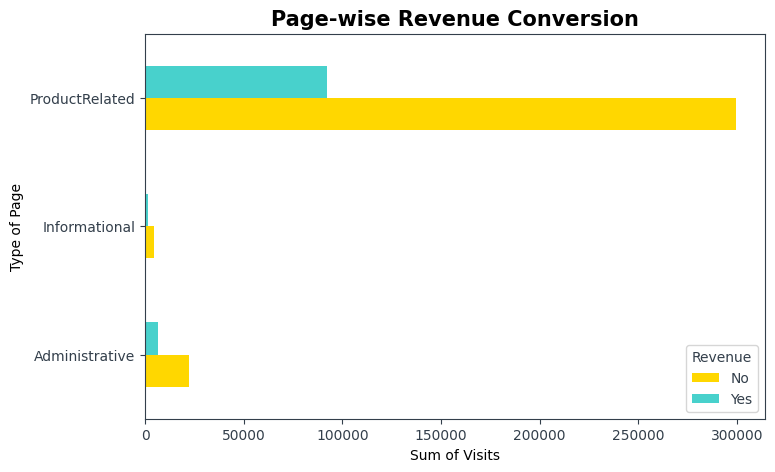

In [ ]:
page = pd.pivot_table(df,values=['Administrative','Informational','ProductRelated'],index='Revenue',aggfunc='sum')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

page.T.plot(kind='barh',figsize=(8,5),color=['gold', 'mediumturquoise'])
plt.title('Page-wise Revenue Conversion',fontweight='bold',size=15,color='black')
plt.ylabel('Type of Page')
plt.xlabel('Sum of Visits')
plt.show()

Inference-

The majority of the sessions on the website included visit to product related pages. Further, it has the highest contribution to revenue generation. Therefore, product related pages are of utmost importance to the client as suggested by the number of customer visits.

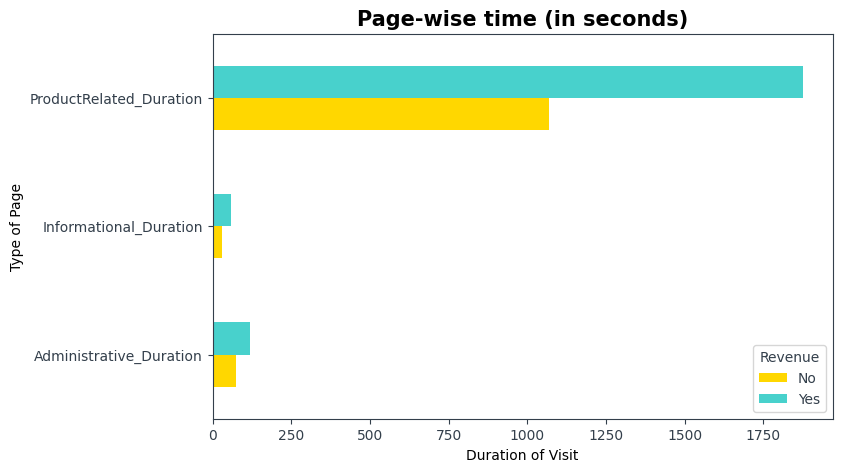

In [ ]:
pd.pivot_table(df,values=['Administrative_Duration','Informational_Duration','ProductRelated_Duration'],index='Revenue').T.plot(kind='barh',figsize=(8,5),color=['gold', 'mediumturquoise'])
plt.title('Page-wise time (in seconds)',fontweight='bold',size=15,color='black')
plt.ylabel('Type of Page')
plt.xlabel('Duration of Visit')
plt.show()

Inference-

The majority of the time spent on the website was on Product Related pages. Therefore, product related pages are of utmost importance to the client from the perspective of revenue generation.

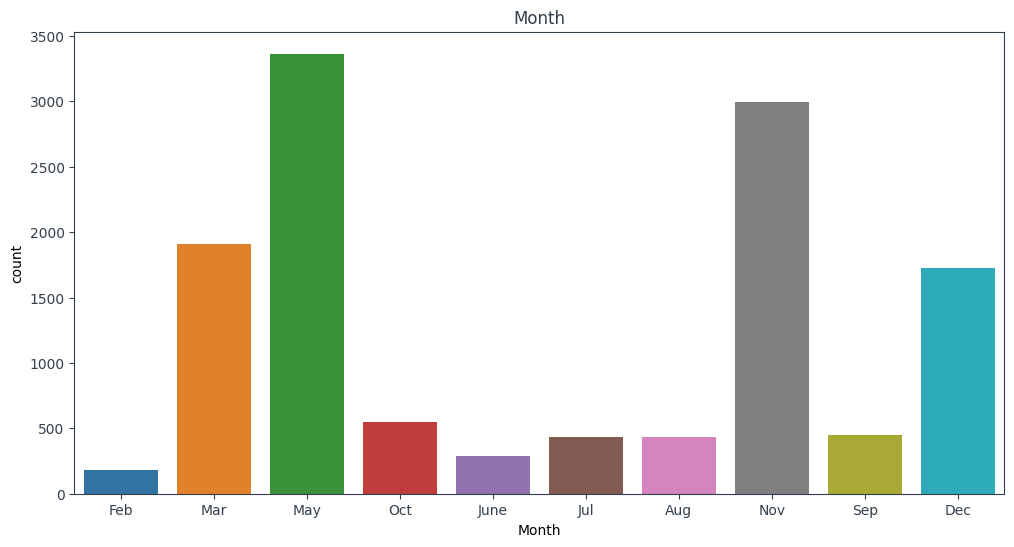

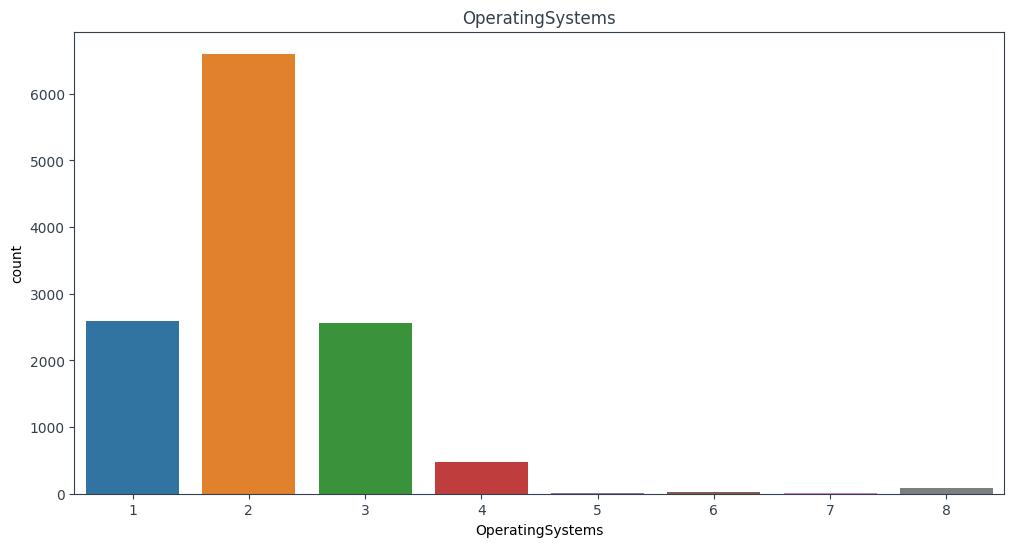

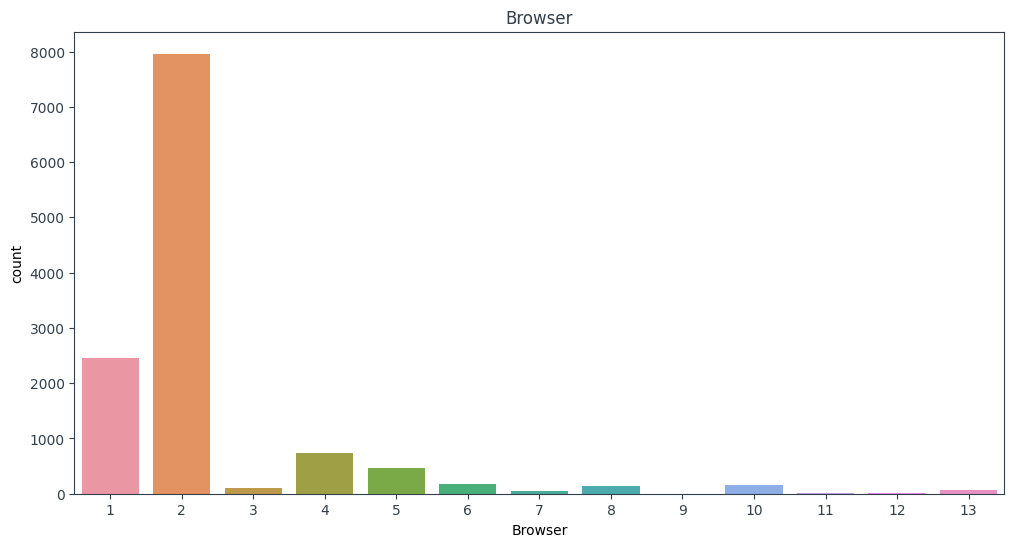

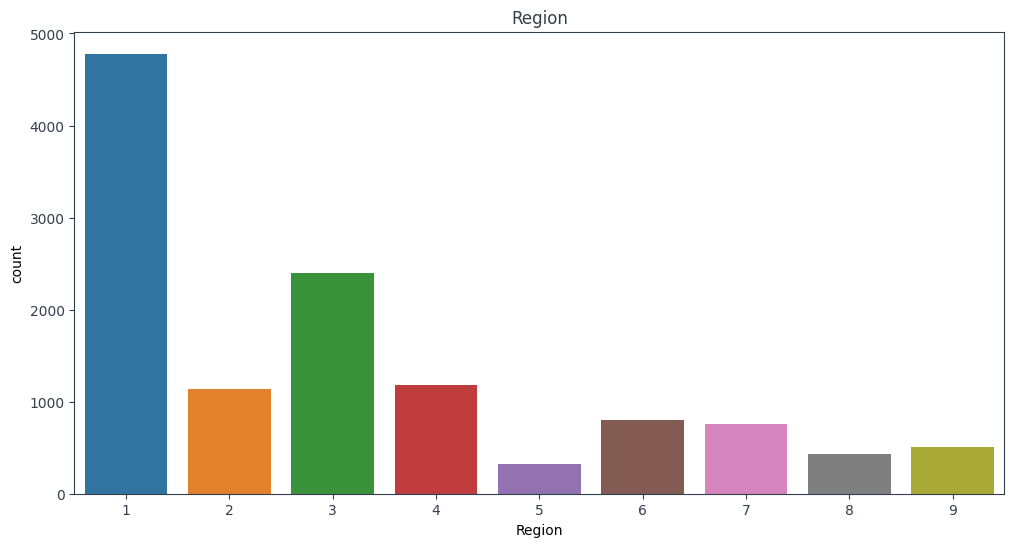

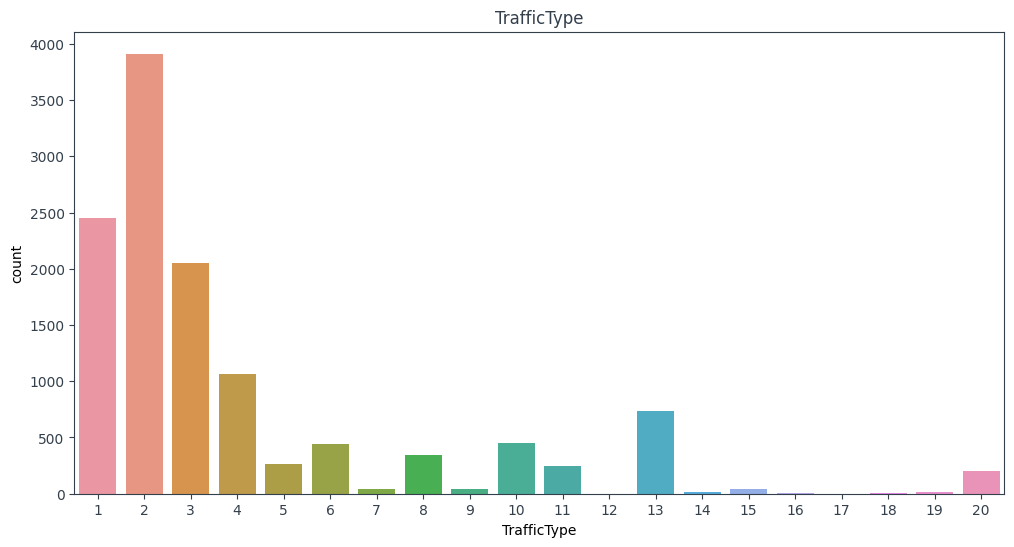

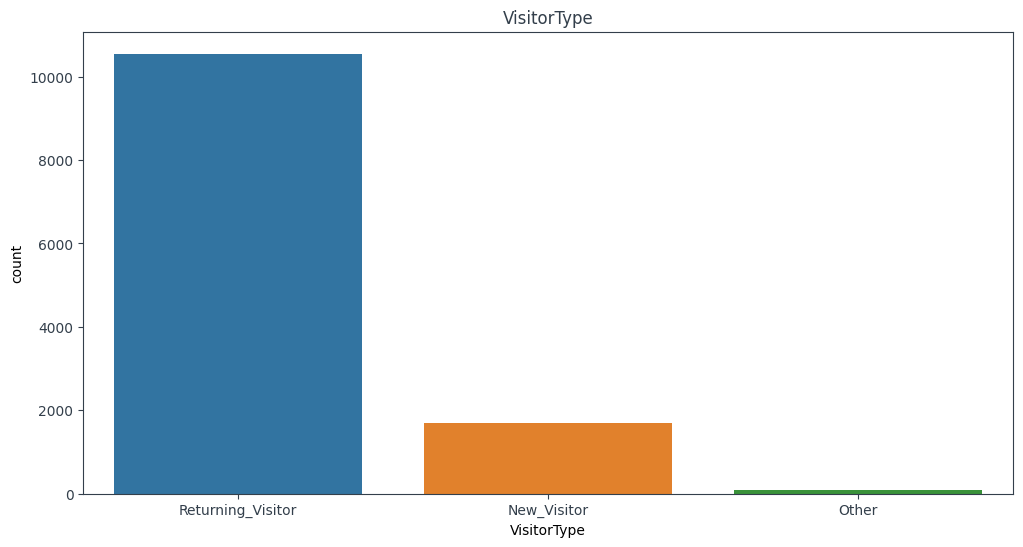

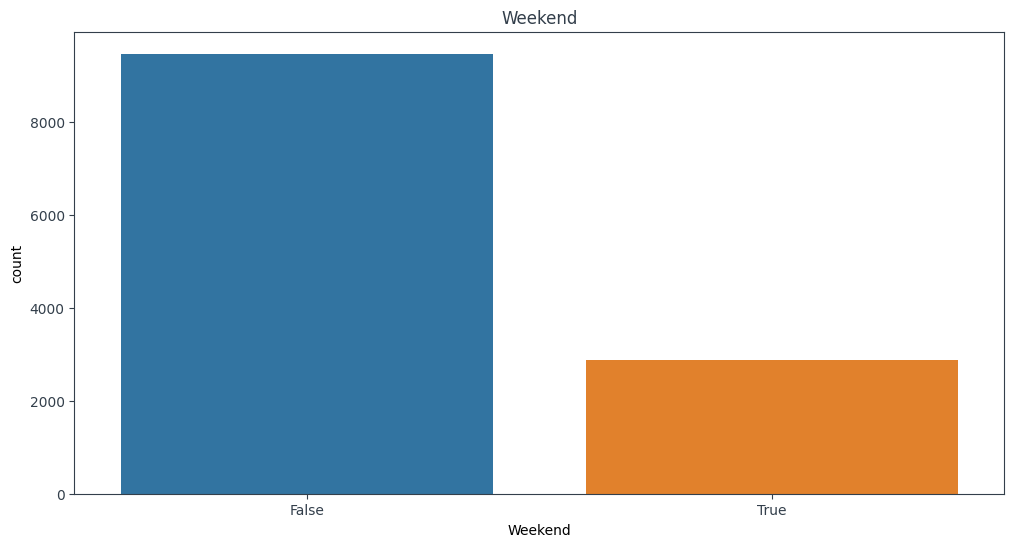

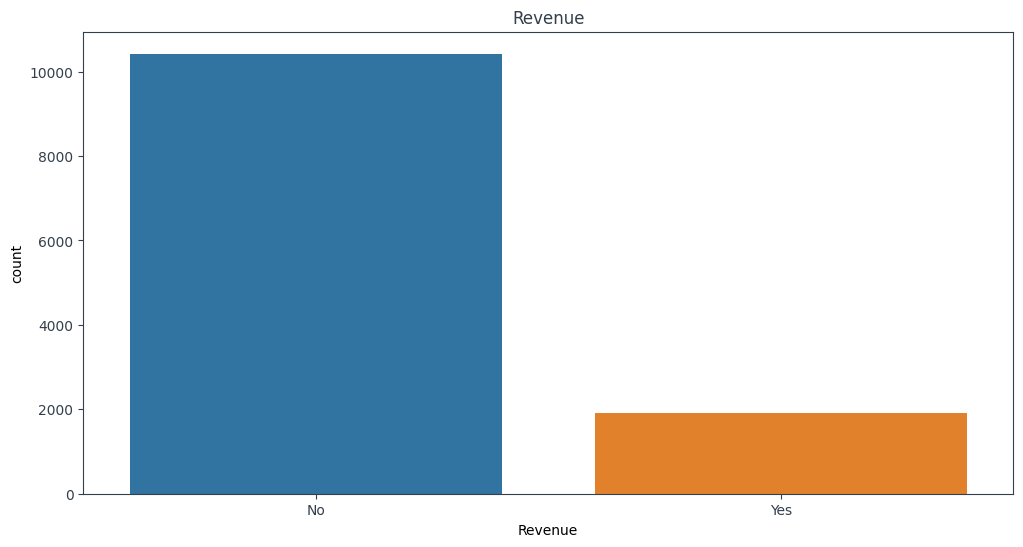

In [ ]:
for i in df.select_dtypes(include=['object','bool']).columns:
    sns.countplot(x=i,data=df)
    plt.title(i)
    plt.show()
# Majority of the sessions in the data pertain to the month of may followed by November
# Majority of the sessions happened on from systems having Operating System,Browser Number and Traffic type 2 and region 1
# Majority of the visitors are returning visitors

In [ ]:
sc =  df[['BounceRates','ExitRates','PageValues','Revenue']]
sc['Revenue'] = sc['Revenue'].replace({'Yes':0,'No':1})
sc

BounceRates  ExitRates  PageValues  Revenue
0         0.200000   0.200000    0.000000        1
1         0.000000   0.100000    0.000000        1
2         0.200000   0.200000    0.000000        1
3         0.050000   0.140000    0.000000        1
4         0.020000   0.050000    0.000000        1
...            ...        ...         ...      ...
12325     0.007143   0.029031   12.241717        1
12326     0.000000   0.021333    0.000000        1
12327     0.083333   0.086667    0.000000        1
12328     0.000000   0.021053    0.000000        1
12329     0.000000   0.066667    0.000000        1

[12330 rows x 4 columns]

In [ ]:
df['Revenue'].replace({'Yes':0,'No':1})

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

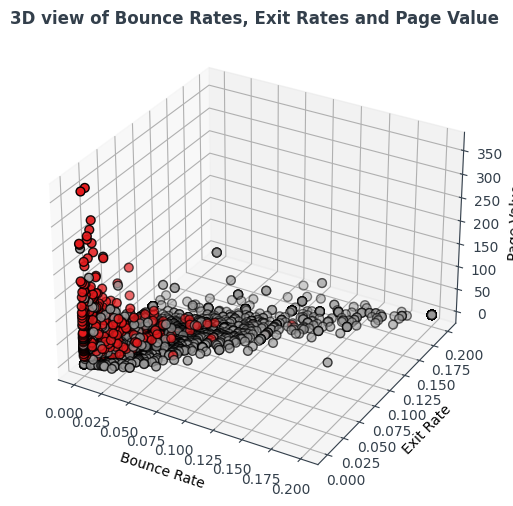

In [ ]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(df['BounceRates'],df['ExitRates'],df['PageValues'],c=df['Revenue'].replace({'Yes':0,'No':1}),
           cmap=plt.cm.Set1, edgecolor='k',s=40)
ax.set_title("3D view of Bounce Rates, Exit Rates and Page Value",fontweight='bold')
ax.set_xlabel("Bounce Rate")
#ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Exit Rate")
#ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Page Value")
#ax.w_zaxis.set_ticklabels([])
plt.show()

Here, Red points represent customers who did not bring revenue and Black points represent revenue positive customers. From the above visualization, following points are noted:

Customers who havent ended up shopping (Reds) have a relatively lower bounce rate and exit rate than the black points.
Customers who ended up shopping have a page value on the higher side relative to the negative classes.

# Analysis on only Revenue Positive Cases (15.5% Data)

In [ ]:
rev_yes_month = df[df['Revenue']=='Yes']['Month'].value_counts()
label = rev_yes_month.index
values = rev_yes_month.values

In [ ]:
rev_yes_month

Nov     760
May     365
Dec     216
Mar     192
Oct     115
Sep      86
Aug      76
Jul      66
June     29
Feb       3
Name: Month, dtype: int64

In [ ]:
label,values

(Index(['Nov', 'May', 'Dec', 'Mar', 'Oct', 'Sep', 'Aug', 'Jul', 'June', 'Feb'], dtype='object'),
 array([760, 365, 216, 192, 115,  86,  76,  66,  29,   3]))

In [ ]:
rev_no_month =  df[df['Revenue']=='No']['Month'].value_counts()

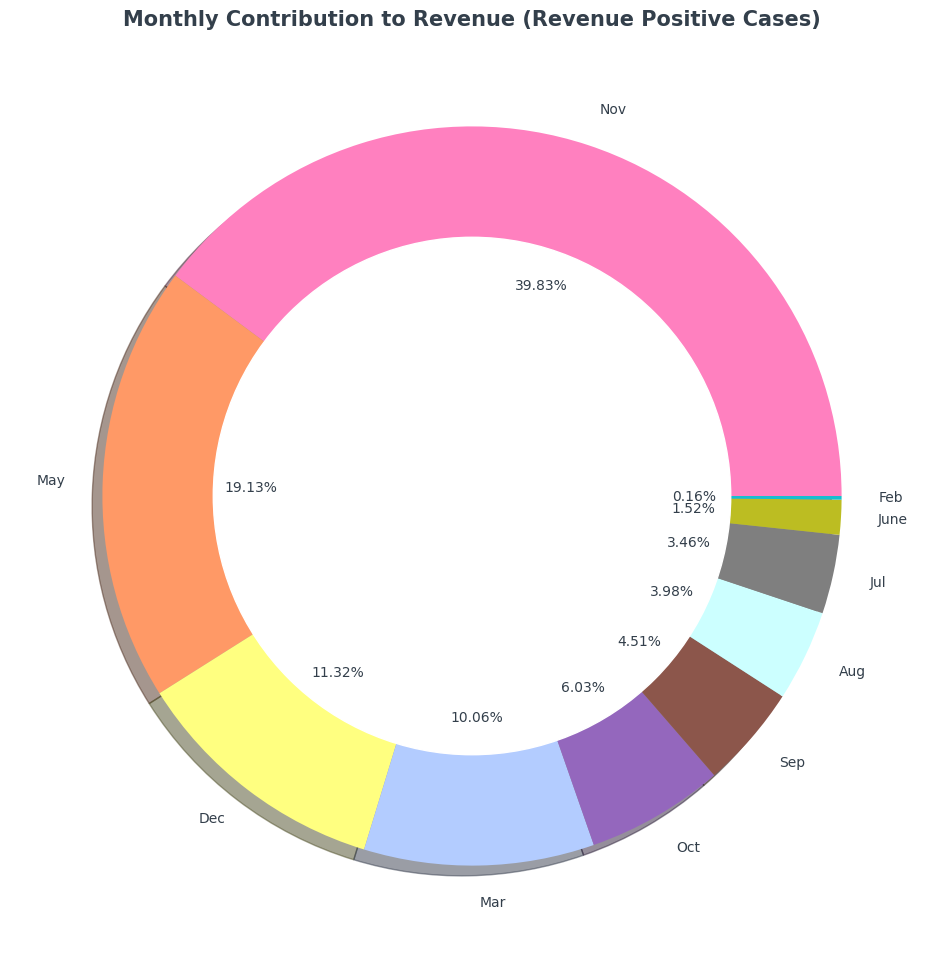

In [ ]:
%matplotlib inline
plt.figure(figsize=(20,12))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(rev_yes_month,labels=label,shadow=True,colors=['#ff80bf','#ff9966', '#ffff80', '#b3ccff', '#9467bd', '#8c564b', '#ccffff', '#7f7f7f', '#bcbd22', '#17becf'],autopct='%1.2f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Monthly Contribution to Revenue (Revenue Positive Cases)',fontweight= 'bold',size=15)
plt.show()

From the above doughnut plot, it can be inferred that November has the most significant contribution to client’s revenue followed by May, December and March. While February, June and July have the least contribution. Client needs to analyze what drives the customers during the peak months and implement similar strategies in the other months.

In [ ]:
for j in ['OperatingSystems','Browser','Region','TrafficType']:
    reg = round(df[df['Revenue']=='Yes'][j].value_counts(normalize=True)*100,2)
    ind = []
    for i in reg.index:
        i = str(i)
        v = j+' '+i
        ind.append(v)
        v =''

    from plotly import graph_objects as go
    fig = go.Figure(
       go.Funnel(
          y = ind,
          x = reg.values
       )
    )

    fig.update_layout(font_color="black",font=dict(size=8),title={
            'text': "{} (%) with Revenue".format(j),
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'})
    fig.show()

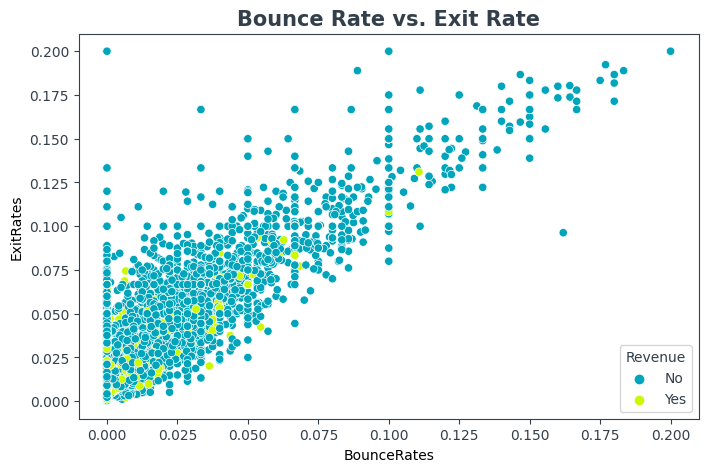

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x= 'BounceRates',y='ExitRates',data=df,hue='Revenue',palette='nipy_spectral')
plt.title('Bounce Rate vs. Exit Rate',fontweight='bold',fontsize=15)
plt.show()

# Higher bounce rates are generally associated with higher exit rates

In [ ]:
num = df.select_dtypes(include=np.number)
cat = df.select_dtypes(exclude=np.number)

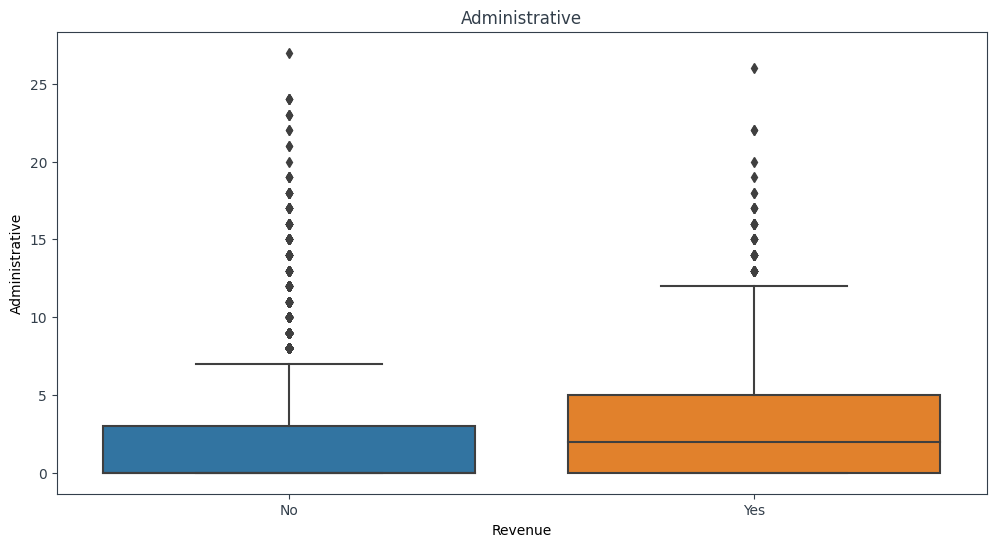

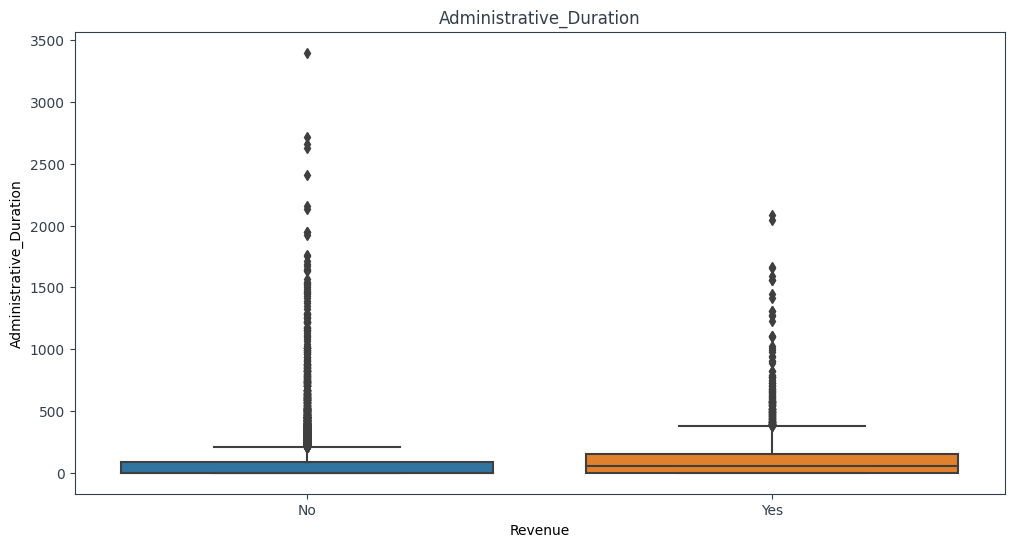

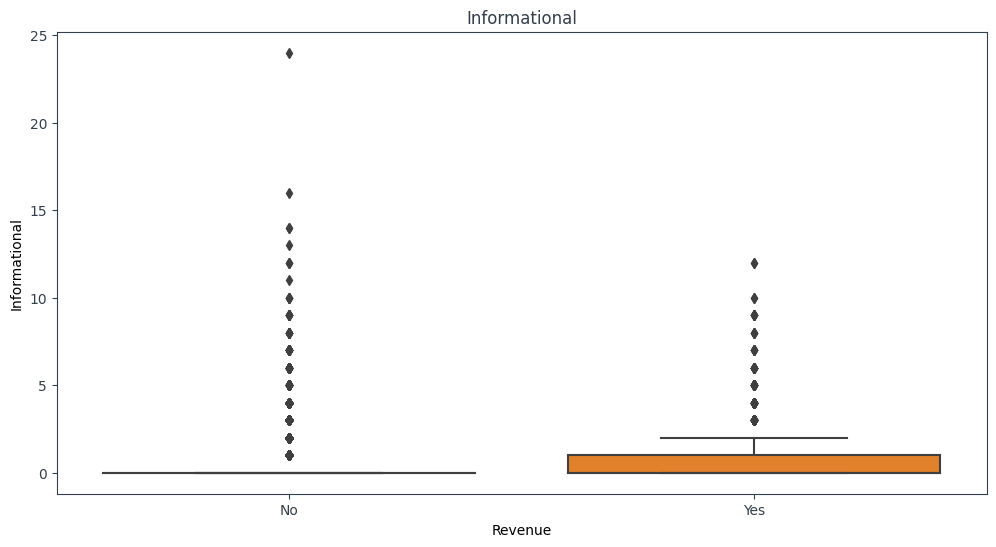

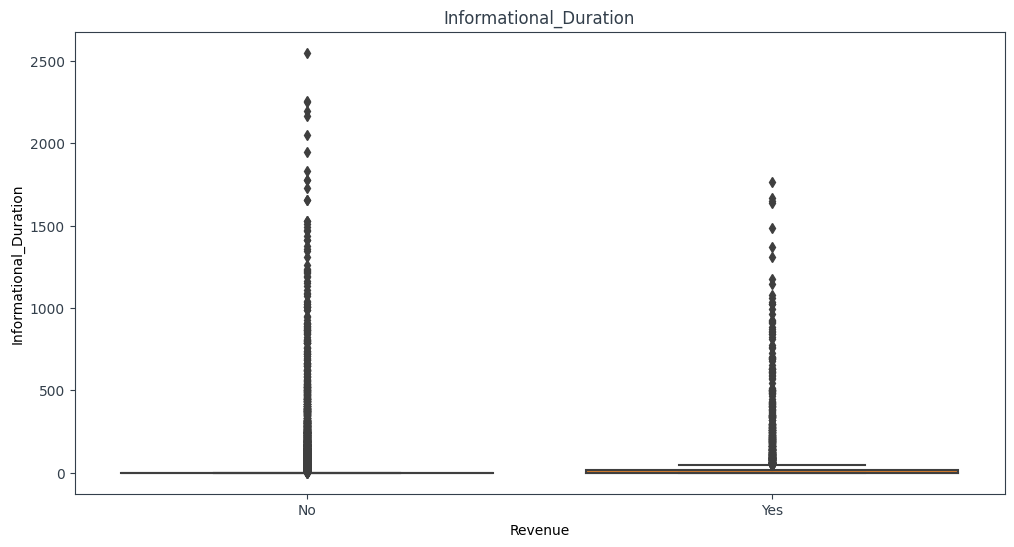

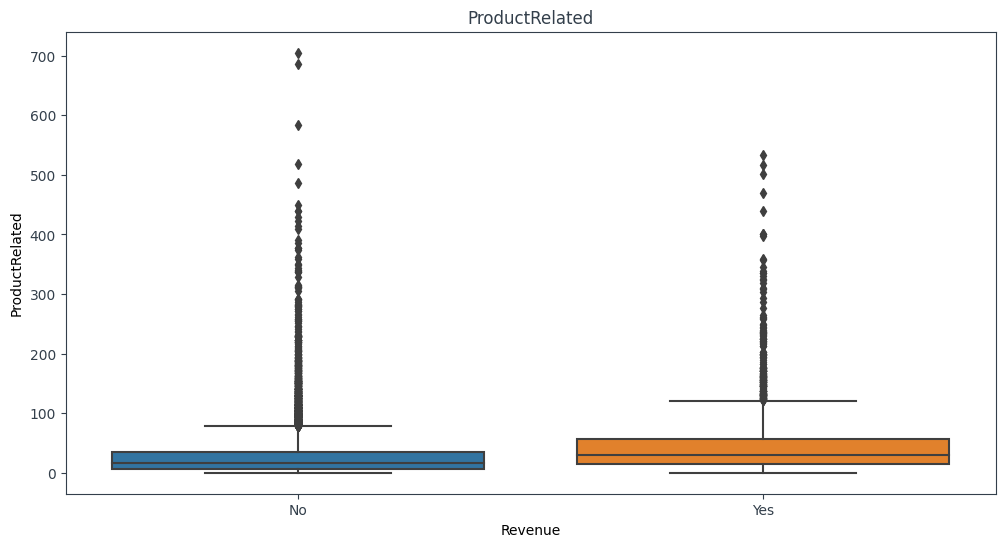

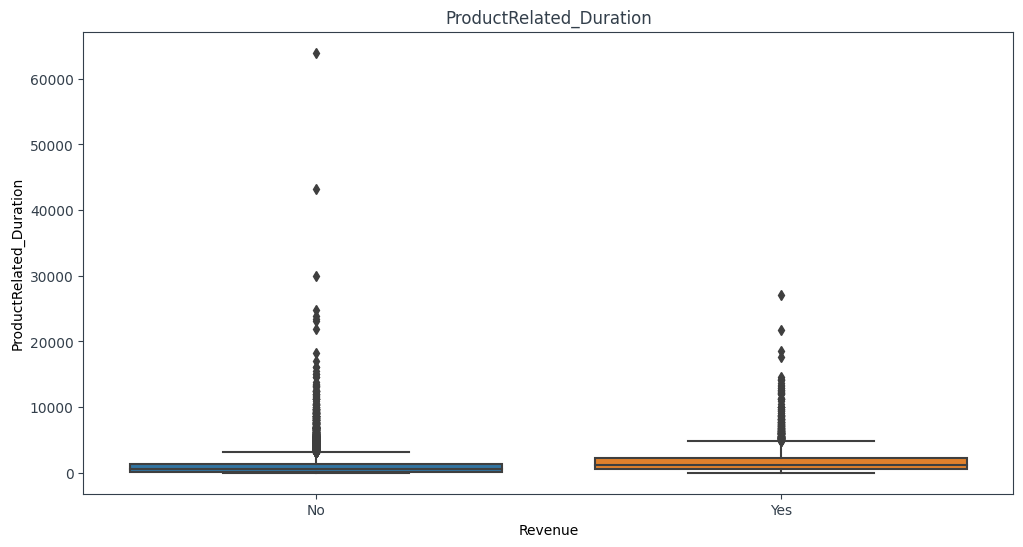

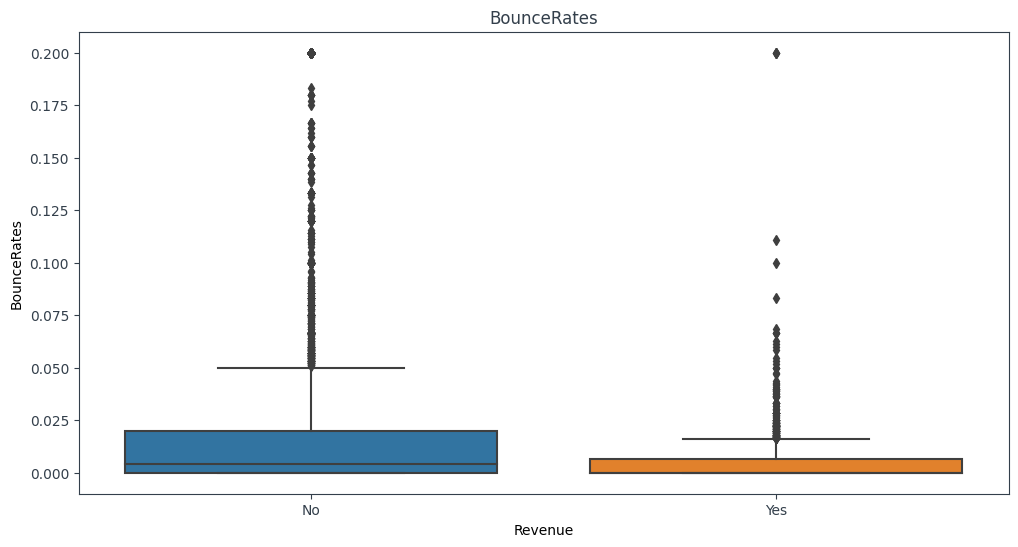

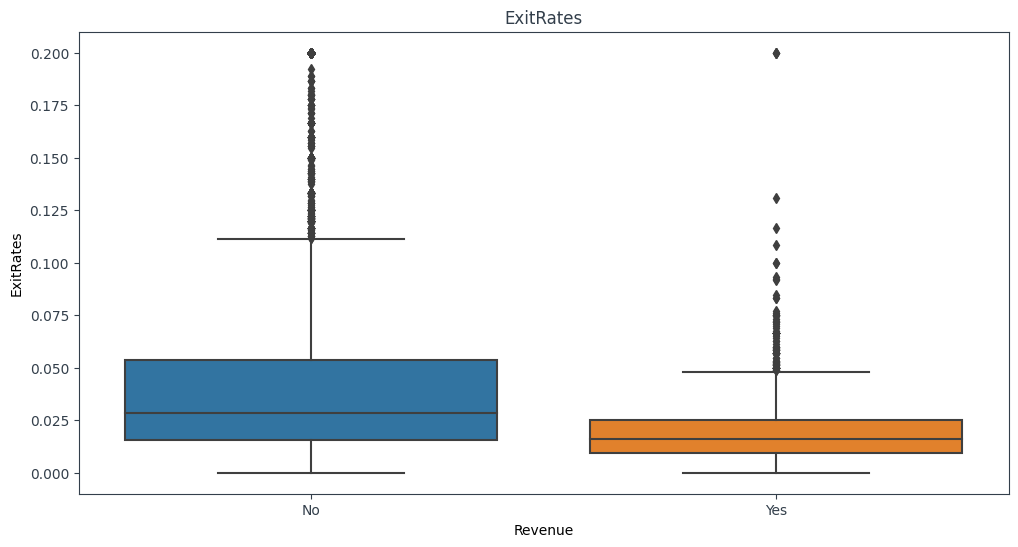

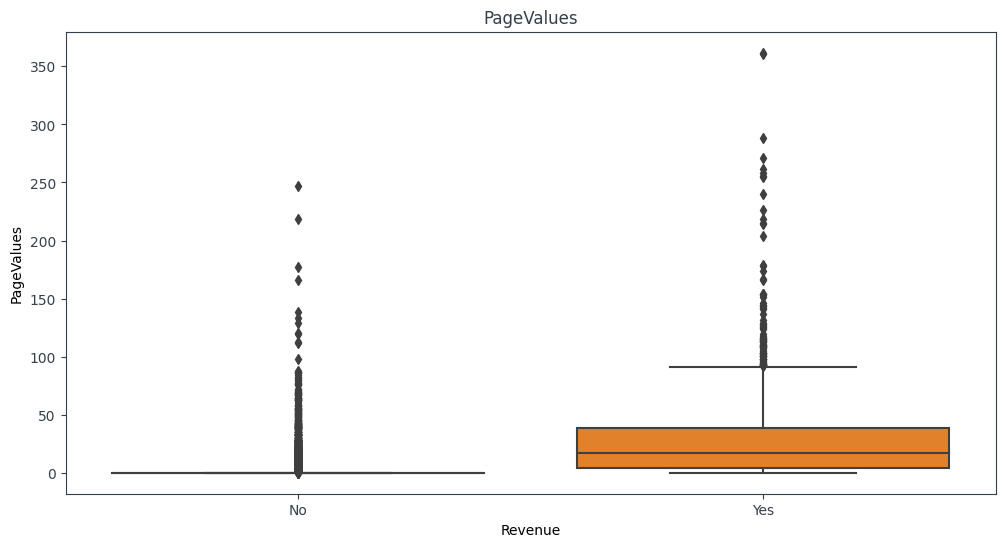

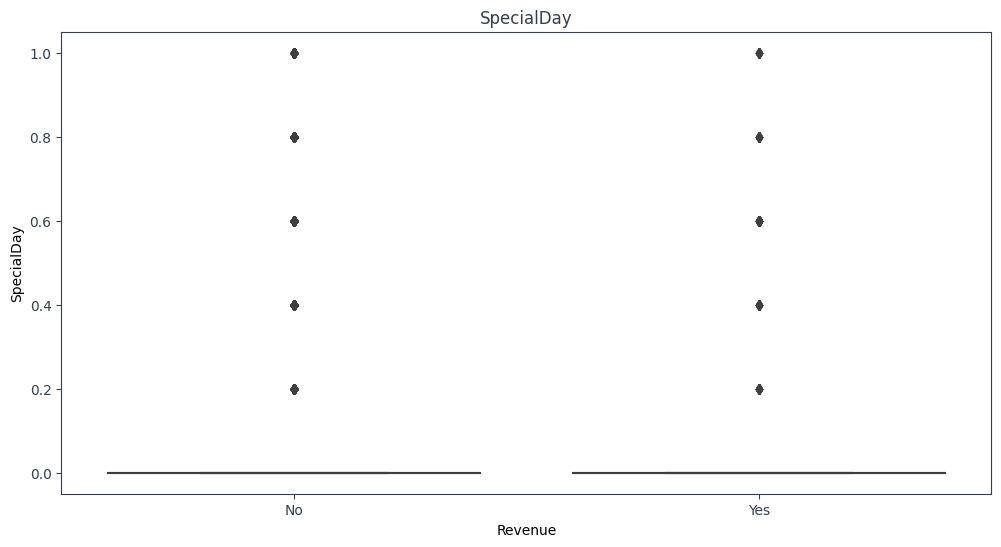

In [ ]:
#plotting all numerical variables with the target variable

for i in num.columns:
    sns.boxplot(x='Revenue',y=i,data=df)
    plt.title(i)
    plt.show()
#Inferences -
# Median number of pages visited and time spent on them for administrative purposes on the website is higher for sessions which yielded revenue
# It appears that median number of visit to Informational pages and time spent on them is approximately 0.
# Median number of product related pages visited and time spent on them is higher for sessions which yielded revenue.
# However, there appears to be a lot of outliers where no-revenue sessions had users visiting a lot of pages
# and spending time on them but not purchasing the product.
# Bounce Rates and exit rates of pages were relatively lower for sessions which yielded revenue.
# This shows that it is important for websites to have a lower bounce rates and exit rates on their pages.
# Similarly Average Page value of a page that user visited before making a transactions is visibly higher in revenue positive sessions
# Visually, it appears that closeness to a special day stays at median value of 0 for both revenue and non-revenue cases.
# This is because majority of the times, there is no closeness to a festival.

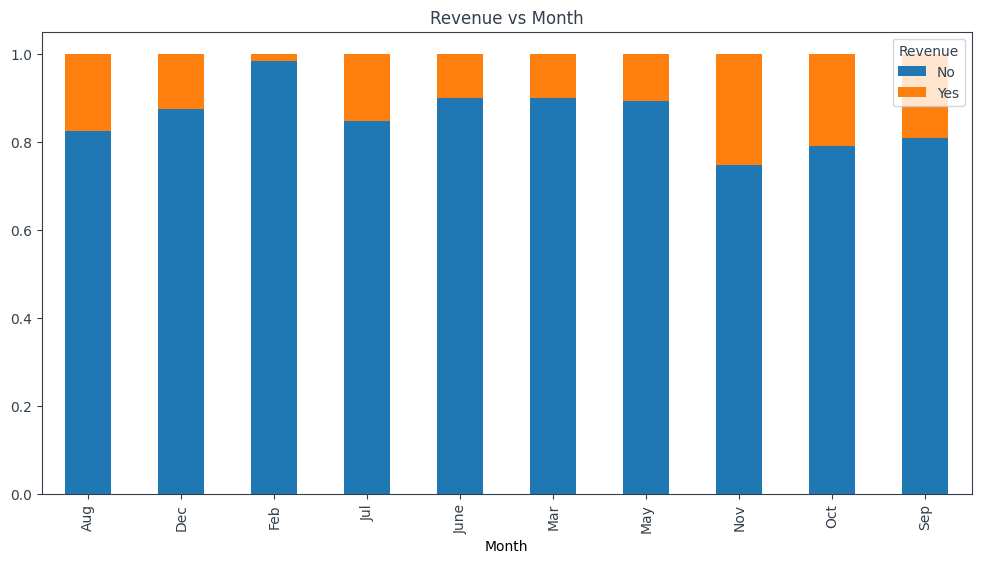

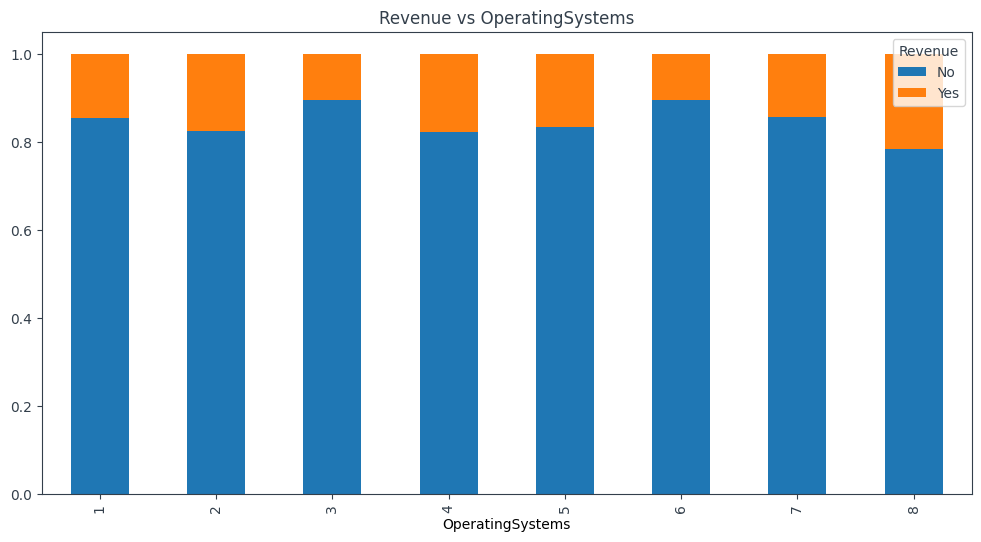

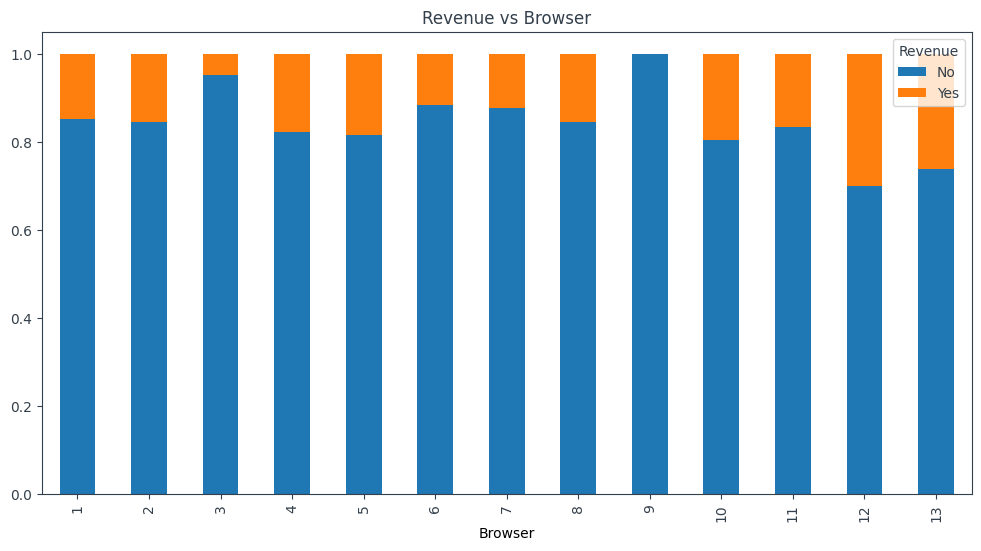

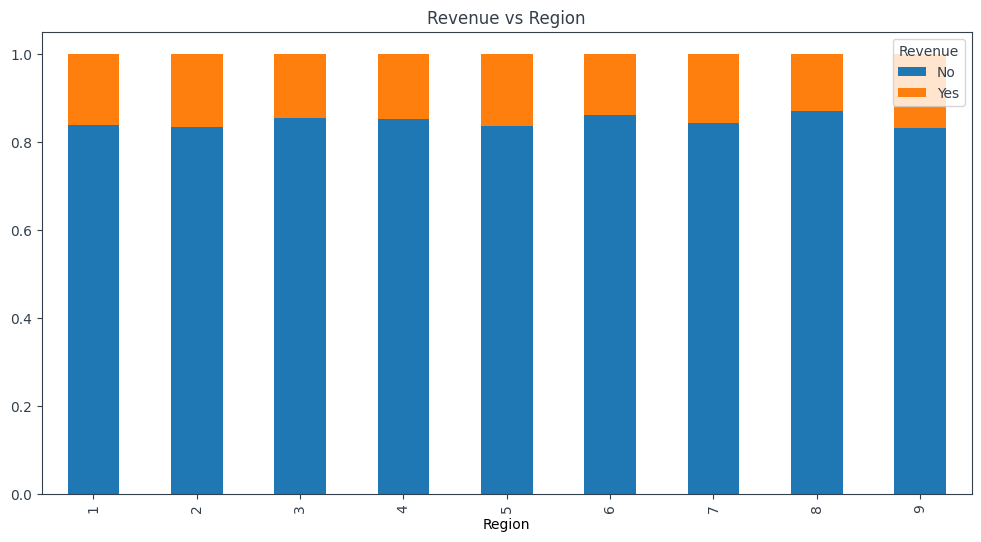

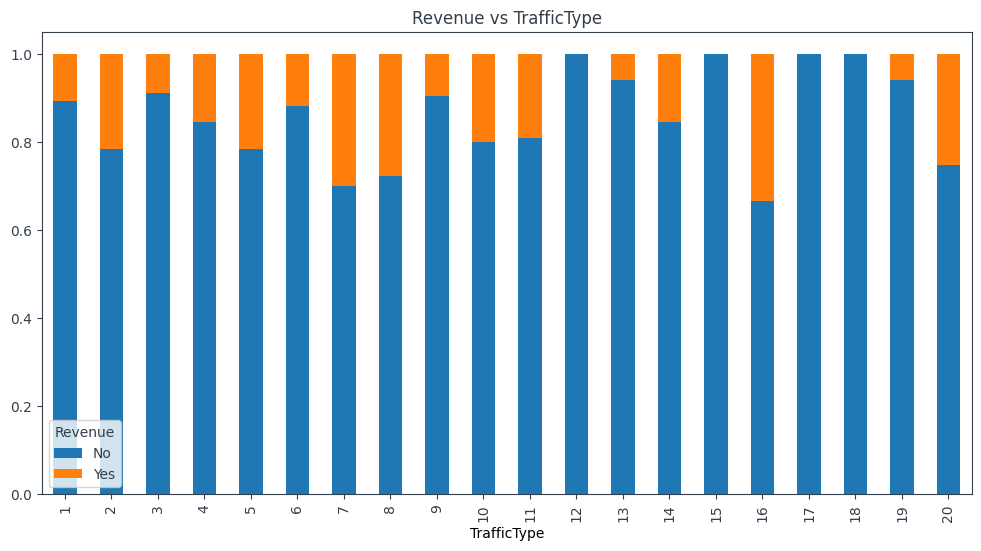

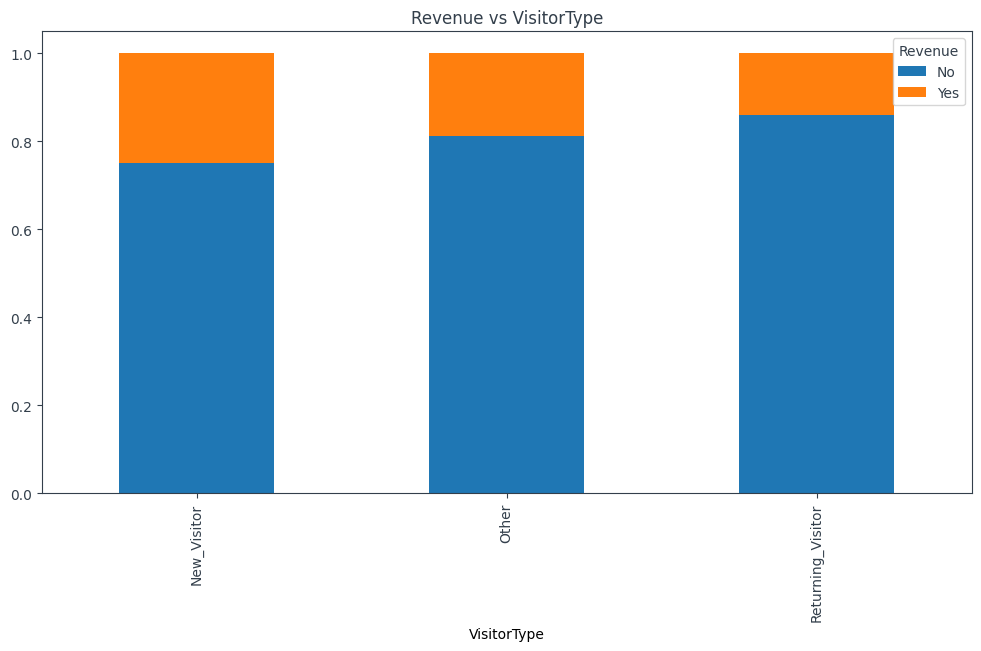

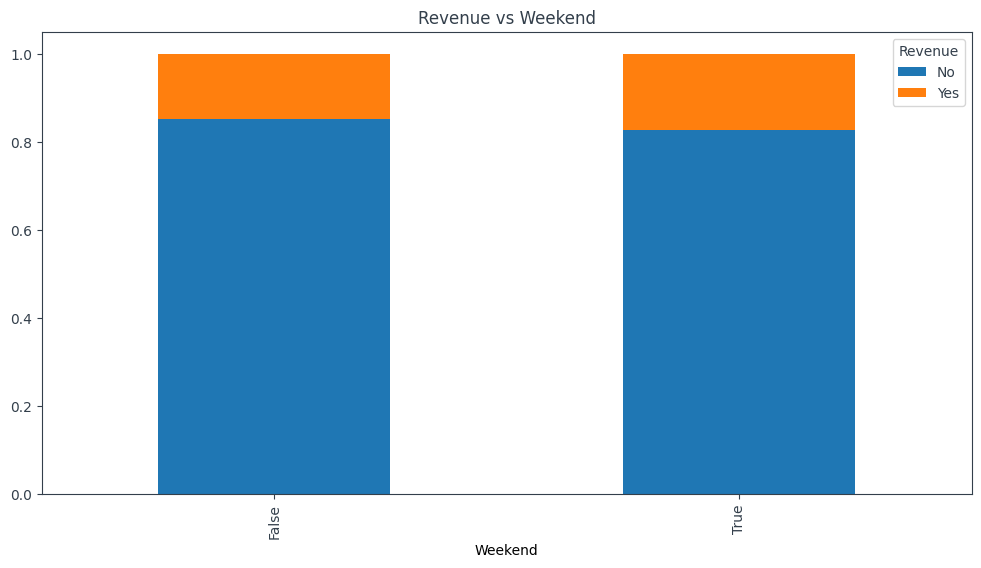

In [ ]:
#plotting categorical variables with target
for i in cat.columns.drop('Revenue'):
    z = pd.crosstab(df[i],df['Revenue'])
    z.div(z.sum(1),axis=0).plot(kind='bar',stacked=True)
    plt.title('Revenue vs {}'.format(i))
    plt.show()

# It appears proportion of session which yielded revenue is the highest in november
# February has the lowest proportion of sessions which yielded revenue
# Proportion of sessions which yielded revenue is the highest among users having operating system 8
# while operating system 3 yields the lowest proportion of these revenue positive sessions
# Browser 12 has the highest proportion of revenue positive sessions followed by browser 13 while browser 3 has the least contribution
# Region does not appear to play a significant role in determining whether the customer will purchase or not.
# Proportion of revenue positive sessions is the highest among new visitors followed by other visitors.
# Returning visitor sessions have a relatively lower proportion of revenue positive sessions.
# If it's a weekend, there are slightly more chances of having a sale! Visually, the difference does not appear to be a very big one!

In [ ]:
new_df = pd.concat([num,cat],axis=1)
new_df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                1   
1         0.00       0.10         0.0         0.0   Feb                2   
2         0.20       0.20         0.0         0.0   Feb                4   
3         0.05       0.14         0.0         0.0   Feb                3   
4         0.02       0.05         0.0         0.0   Feb                3   

  Browser Region TrafficType        VisitorType  Weekend Revenue  
0       1      1           1  Returning_Visitor    False      No  
1       2      1           2  Returning_Visitor    False      No  
2       1      9           3  Returning_Visitor    False      No  
3       2      2           4  Returning_Visitor    False      No  
4       3      1           4  Returning_Visitor     True      No

In [ ]:
import plotly.express as px
px.parallel_categories(new_df[['OperatingSystems','Browser']])

In [ ]:
px.parallel_categories(new_df[['Revenue','OperatingSystems','Browser']])

- Majority of the revenue comes from the operating system 2 and browser 2. This
suggests that Operating system 2 is the leading operating system (which could possibly be Android) while majoirty of the users on this android would probably use Google Chrome as their browser. (Which suggests that browser 2 Could be Google Chrome)

Further, it can be noted that Operating system 1 appears to be the second largest contributor to revenue (probably IOS) and is mostly used with browser 1 (probably Safari)

In [ ]:
px.parallel_categories(new_df[['VisitorType','Revenue']])

- Although we saw above that new visitors had the highest proportion of sessions turning into revenue, however when it comes to analysing the overall absolute contributor to revenue, it would be the returning visitor type since they are dominant visitors in the session and it is obvious that their proportion would be high in both yes and no transactions.

- Similar parallel category plots can be drawn for other features as well. However, I will limit my data visualization here. Let's get our insights approved by statistical analysis.

# Statistical Analysis

In [ ]:
import scipy.stats as stats
for i in num.columns:
    df0 = df[df['Revenue']=='Yes'][i]
    df1 = df[df['Revenue']=='No'][i]
    print(i)
    print('Pvalue:',stats.ttest_ind(df0,df1)[1])
    print()

Administrative
Pvalue: 3.5197598377784024e-54

Administrative_Duration
Pvalue: 2.146513634744256e-25

Informational
Pvalue: 3.174034311262581e-26

Informational_Duration
Pvalue: 5.282870860721331e-15

ProductRelated
Pvalue: 3.2411873289224e-70

ProductRelated_Duration
Pvalue: 6.115338253467455e-65

BounceRates
Pvalue: 1.594197538516729e-63

ExitRates
Pvalue: 1.662653625073615e-119

PageValues
Pvalue: 0.0

SpecialDay
Pvalue: 5.498934260229595e-20



In [ ]:
import scipy.stats as stats
chi_squared_df = pd.DataFrame(columns=['feature', 'pval', 'dependent'])
for i in num.columns:
    df0 = df[df['Revenue']=='Yes'][i]
    df1 = df[df['Revenue']=='No'][i]
    pval = stats.ttest_ind(df0,df1)[1]
    if pval<0.05:
      dependent = 'Yes'
      #print(f"P-value: {pval:.4f} - \n\nIt means we can **reject the null hypothesis (at 95% CI)** and conclude that **Revenue is dependent on {i}.**")
    else:
      dependent = 'No'
      #print(f"P-value: {pval:.4f} - \n\nFailed to reject null hypothesis. Both **Revenue is independent on {col}.**")
    chi_squared_df.loc[i] = [i,round(pval,3), dependent]
chi_squared_df

feature  pval dependent
Administrative                    Administrative   0.0       Yes
Administrative_Duration  Administrative_Duration   0.0       Yes
Informational                      Informational   0.0       Yes
Informational_Duration    Informational_Duration   0.0       Yes
ProductRelated                    ProductRelated   0.0       Yes
ProductRelated_Duration  ProductRelated_Duration   0.0       Yes
BounceRates                          BounceRates   0.0       Yes
ExitRates                              ExitRates   0.0       Yes
PageValues                            PageValues   0.0       Yes
SpecialDay                            SpecialDay   0.0       Yes

In [ ]:
chi_squared_df = pd.DataFrame(columns=['feature', 'pval', 'dependent'])

for i in cat.columns:
    x = pd.crosstab(df[i],df['Revenue'])
    res = stats.chi2_contingency(x.values)
    pval = res[1]

    if pval < 0.05:
        dependent = 'Yes'
    else:
        dependent = 'No'

    chi_squared_df.loc[i] = [i, round(pval,3), dependent]

chi_squared_df

feature   pval dependent
Month                        Month  0.000       Yes
OperatingSystems  OperatingSystems  0.000       Yes
Browser                    Browser  0.006       Yes
Region                      Region  0.321        No
TrafficType            TrafficType  0.000       Yes
VisitorType            VisitorType  0.000       Yes
Weekend                    Weekend  0.001       Yes
Revenue                    Revenue  0.000       Yes

In [ ]:
for i in cat.columns:
    z = pd.crosstab(df[i],df['Revenue'])
    chistat,pval,deg,exp_freq = stats.chi2_contingency(z)
    print(i)
    print('Pvalue:',pval)
    print()

Month
Pvalue: 2.2387855164805443e-77

OperatingSystems
Pvalue: 1.4160941129614401e-13

Browser
Pvalue: 0.00608754317955109

Region
Pvalue: 0.3214249979076556

TrafficType
Pvalue: 1.652735258160153e-67

VisitorType
Pvalue: 4.269904152293867e-30

Weekend
Pvalue: 0.0012663251061221968

Revenue
Pvalue: 0.0



Inference - Region appears to be a highly insignificant factor in determining revenue. The same has been confirmed by using Boxplot visualizations above as well as Chi-square test. The same shall be removed for the purpose of model building

### Outliers and Distributions:
Below we will check the outliers of the numerical columns based on the boxplots.

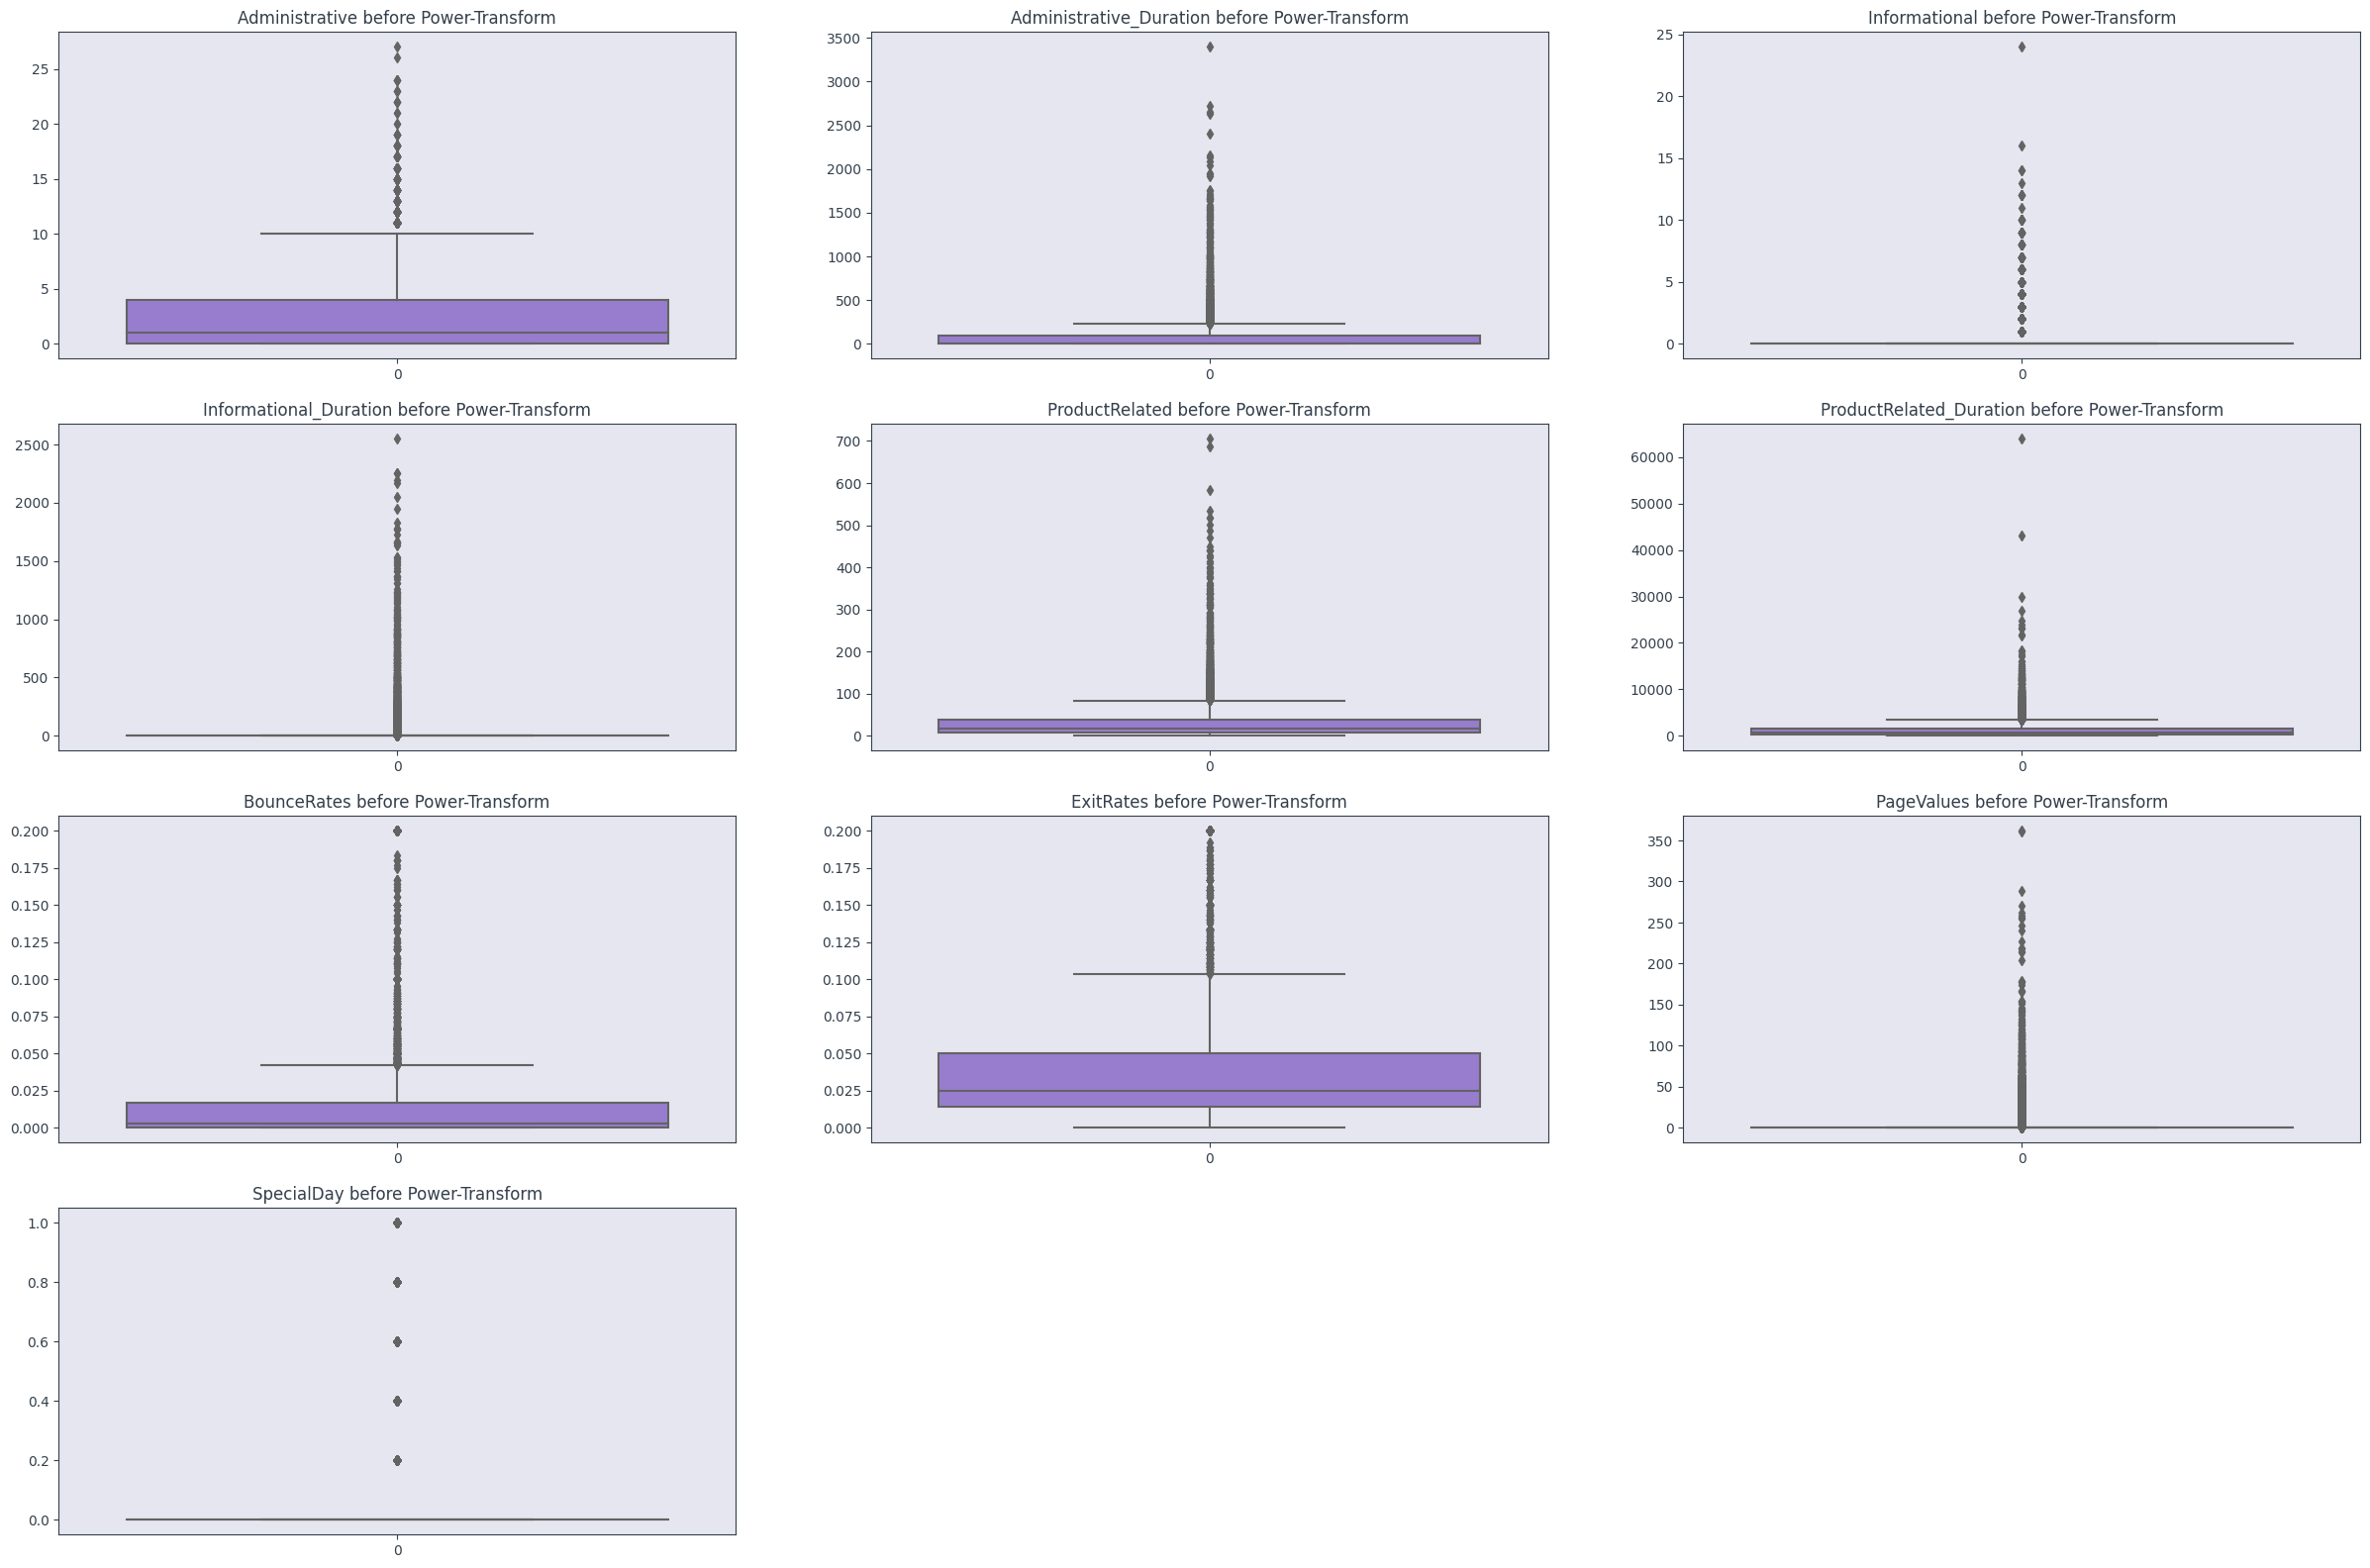

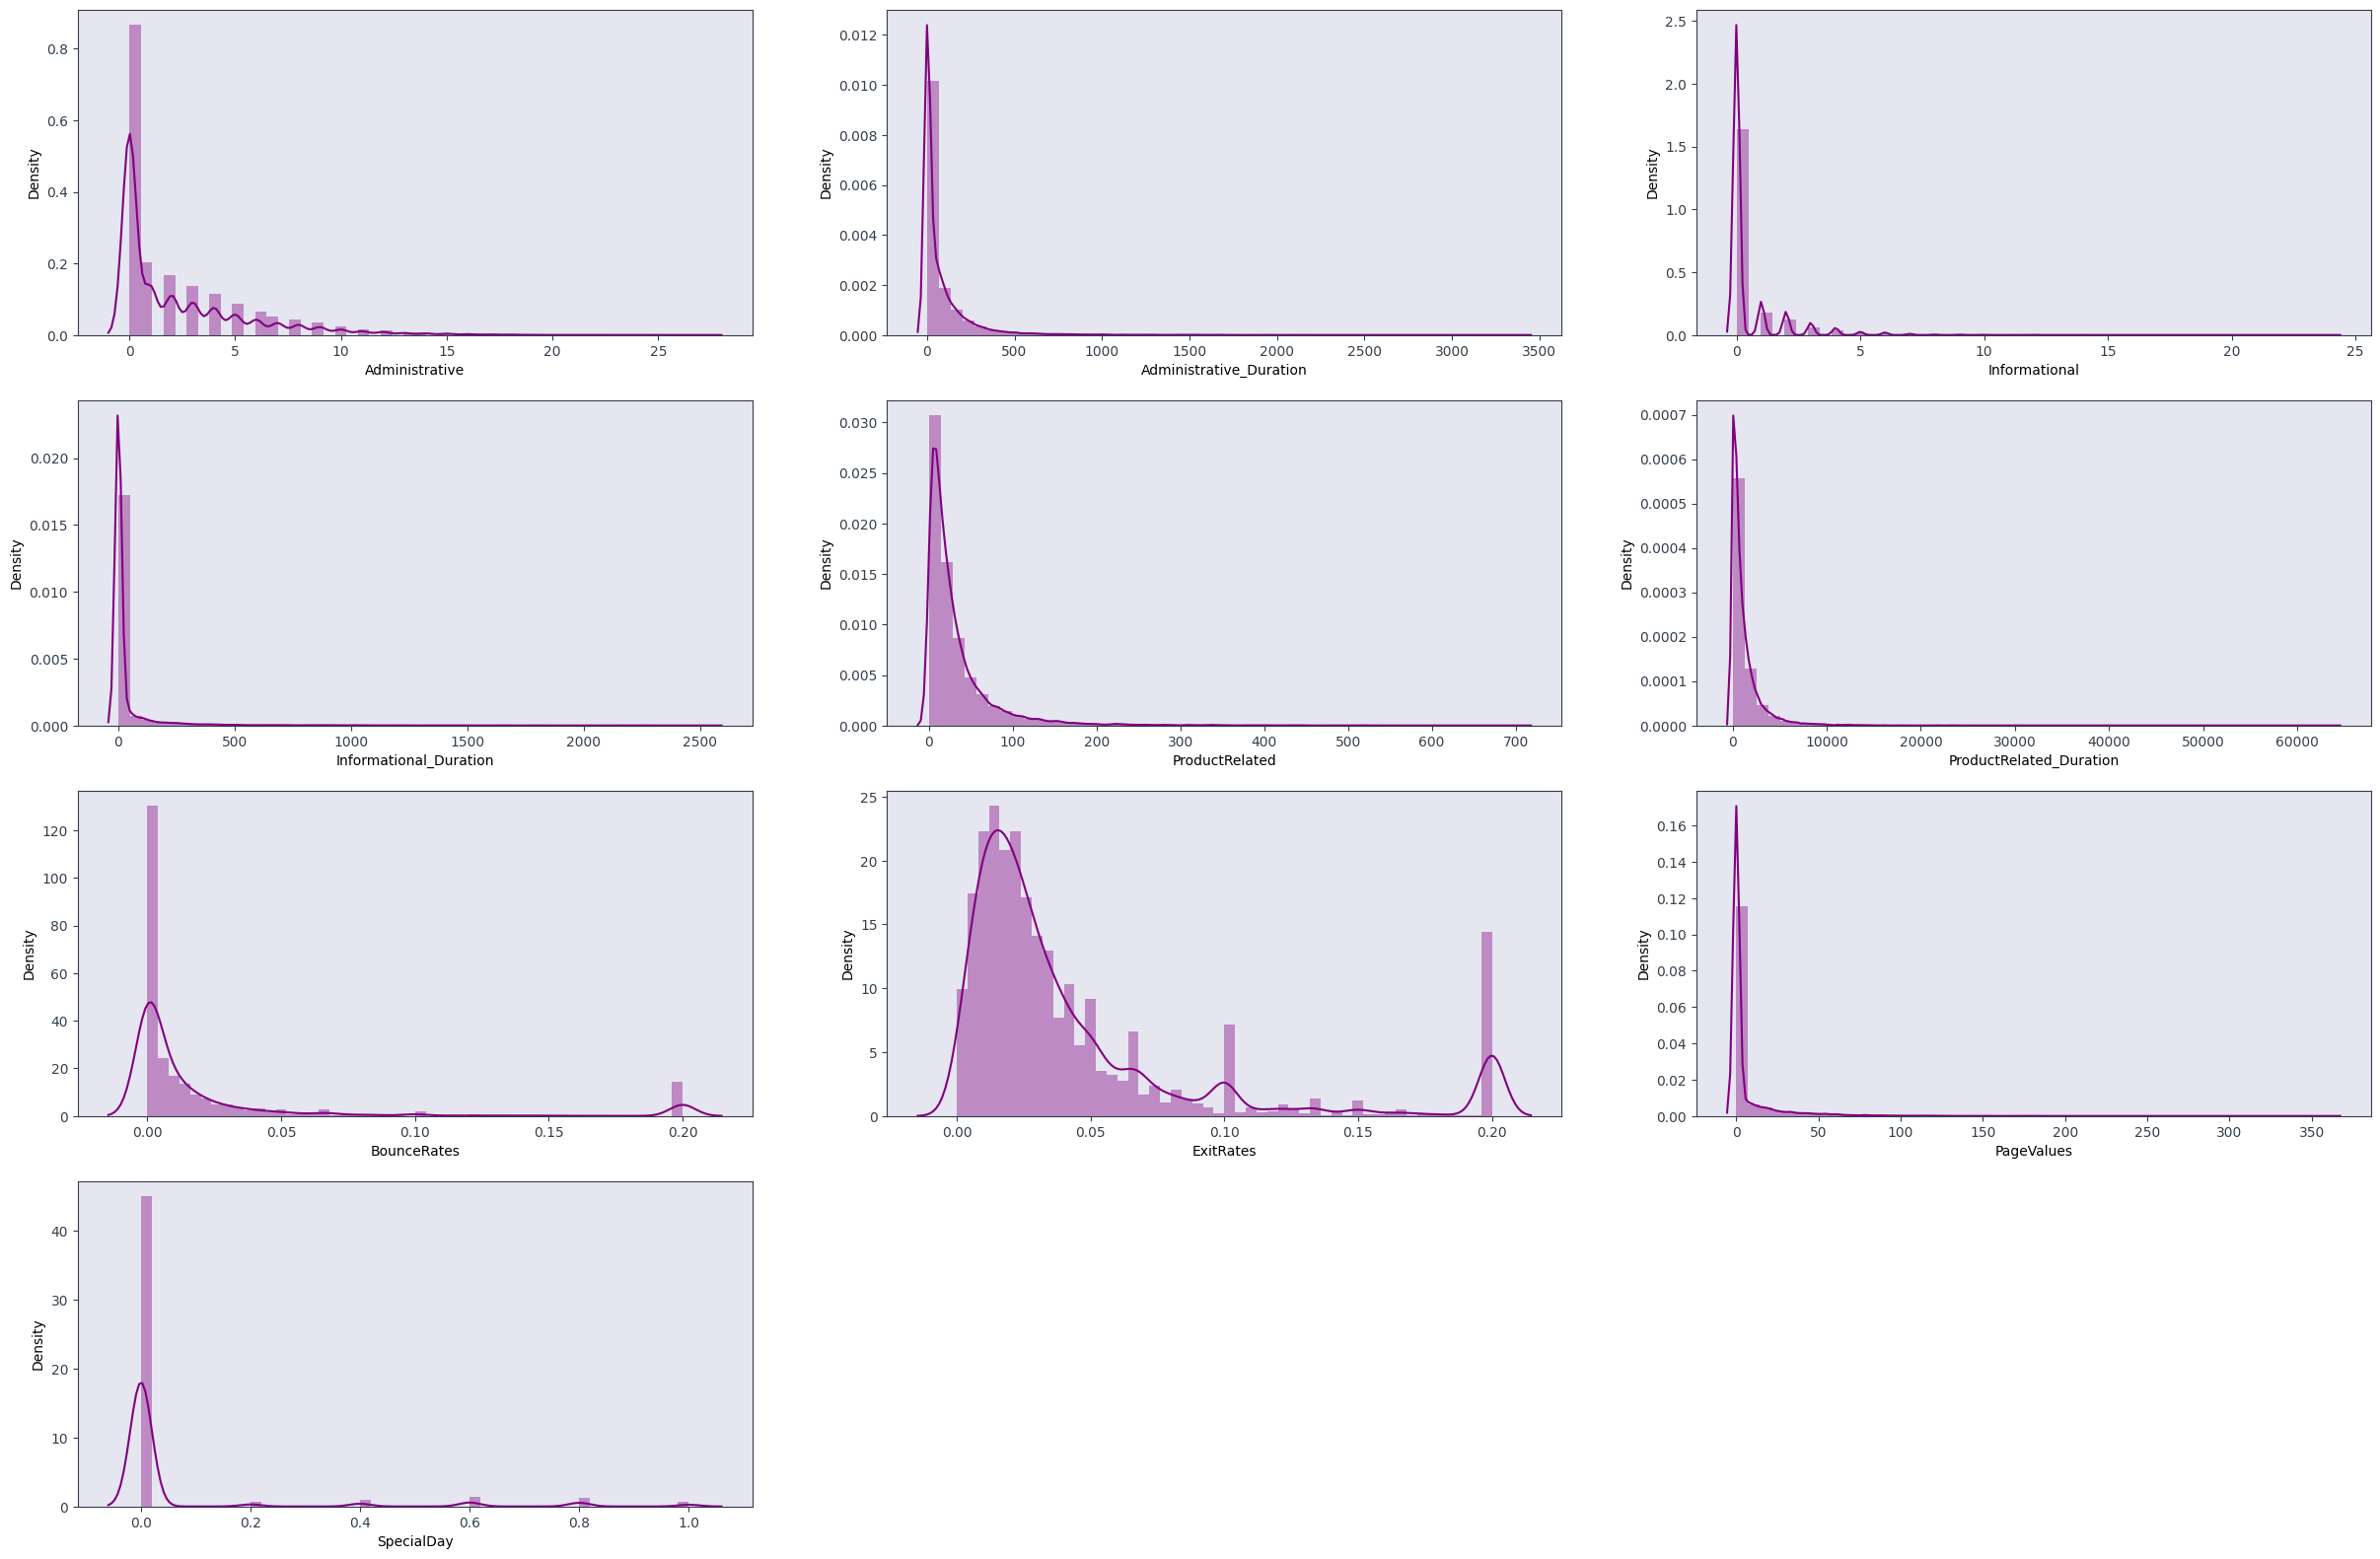

In [ ]:
features = num.columns
plt.figure(figsize=(30,30))
number = 0
for feature in features:
    number = number + 1
    ax = plt.subplot(6, 3, number,adjustable='datalim')
    ax = sns.boxplot(num[feature], color='mediumpurple')
    ax.set_facecolor((0.90, 0.90, 0.94))
    ax.set_title(feature + ' ' + 'before Power-Transform')

plt.figure(figsize=(30,30))
number = 0
for feature in features:
    number = number + 1
    ax = plt.subplot(6, 3, number,adjustable='datalim')
    ax = sns.distplot(num[feature],  kde_kws={'bw':0.1}, color='purple')
    ax.set_facecolor((0.90, 0.90, 0.94))

Now let's visualize the distribution of our numerical data, which will give us an insight on the type of
scaling we should proceed with.

As seen on the histograms above, most of the numeric fetaures suffer from right skewness. One way to corect it is apply a type of transformation that scales the data to a Gaussian manner which is power transformation,speciffically 'Yeo-Johnson' transformation. Furthermore, instead of removing the outliers, the prower tranformation will just decrease their impact in a way that they are not considered outliers anymore. We consider this preferable to removing them as they could represent valuable information for our models.

## Power-Transformation('Yeo-Johnson'):

Now let's visualize the change in the numerical features disribution and what impact the power transformation had on
the multiple outliers

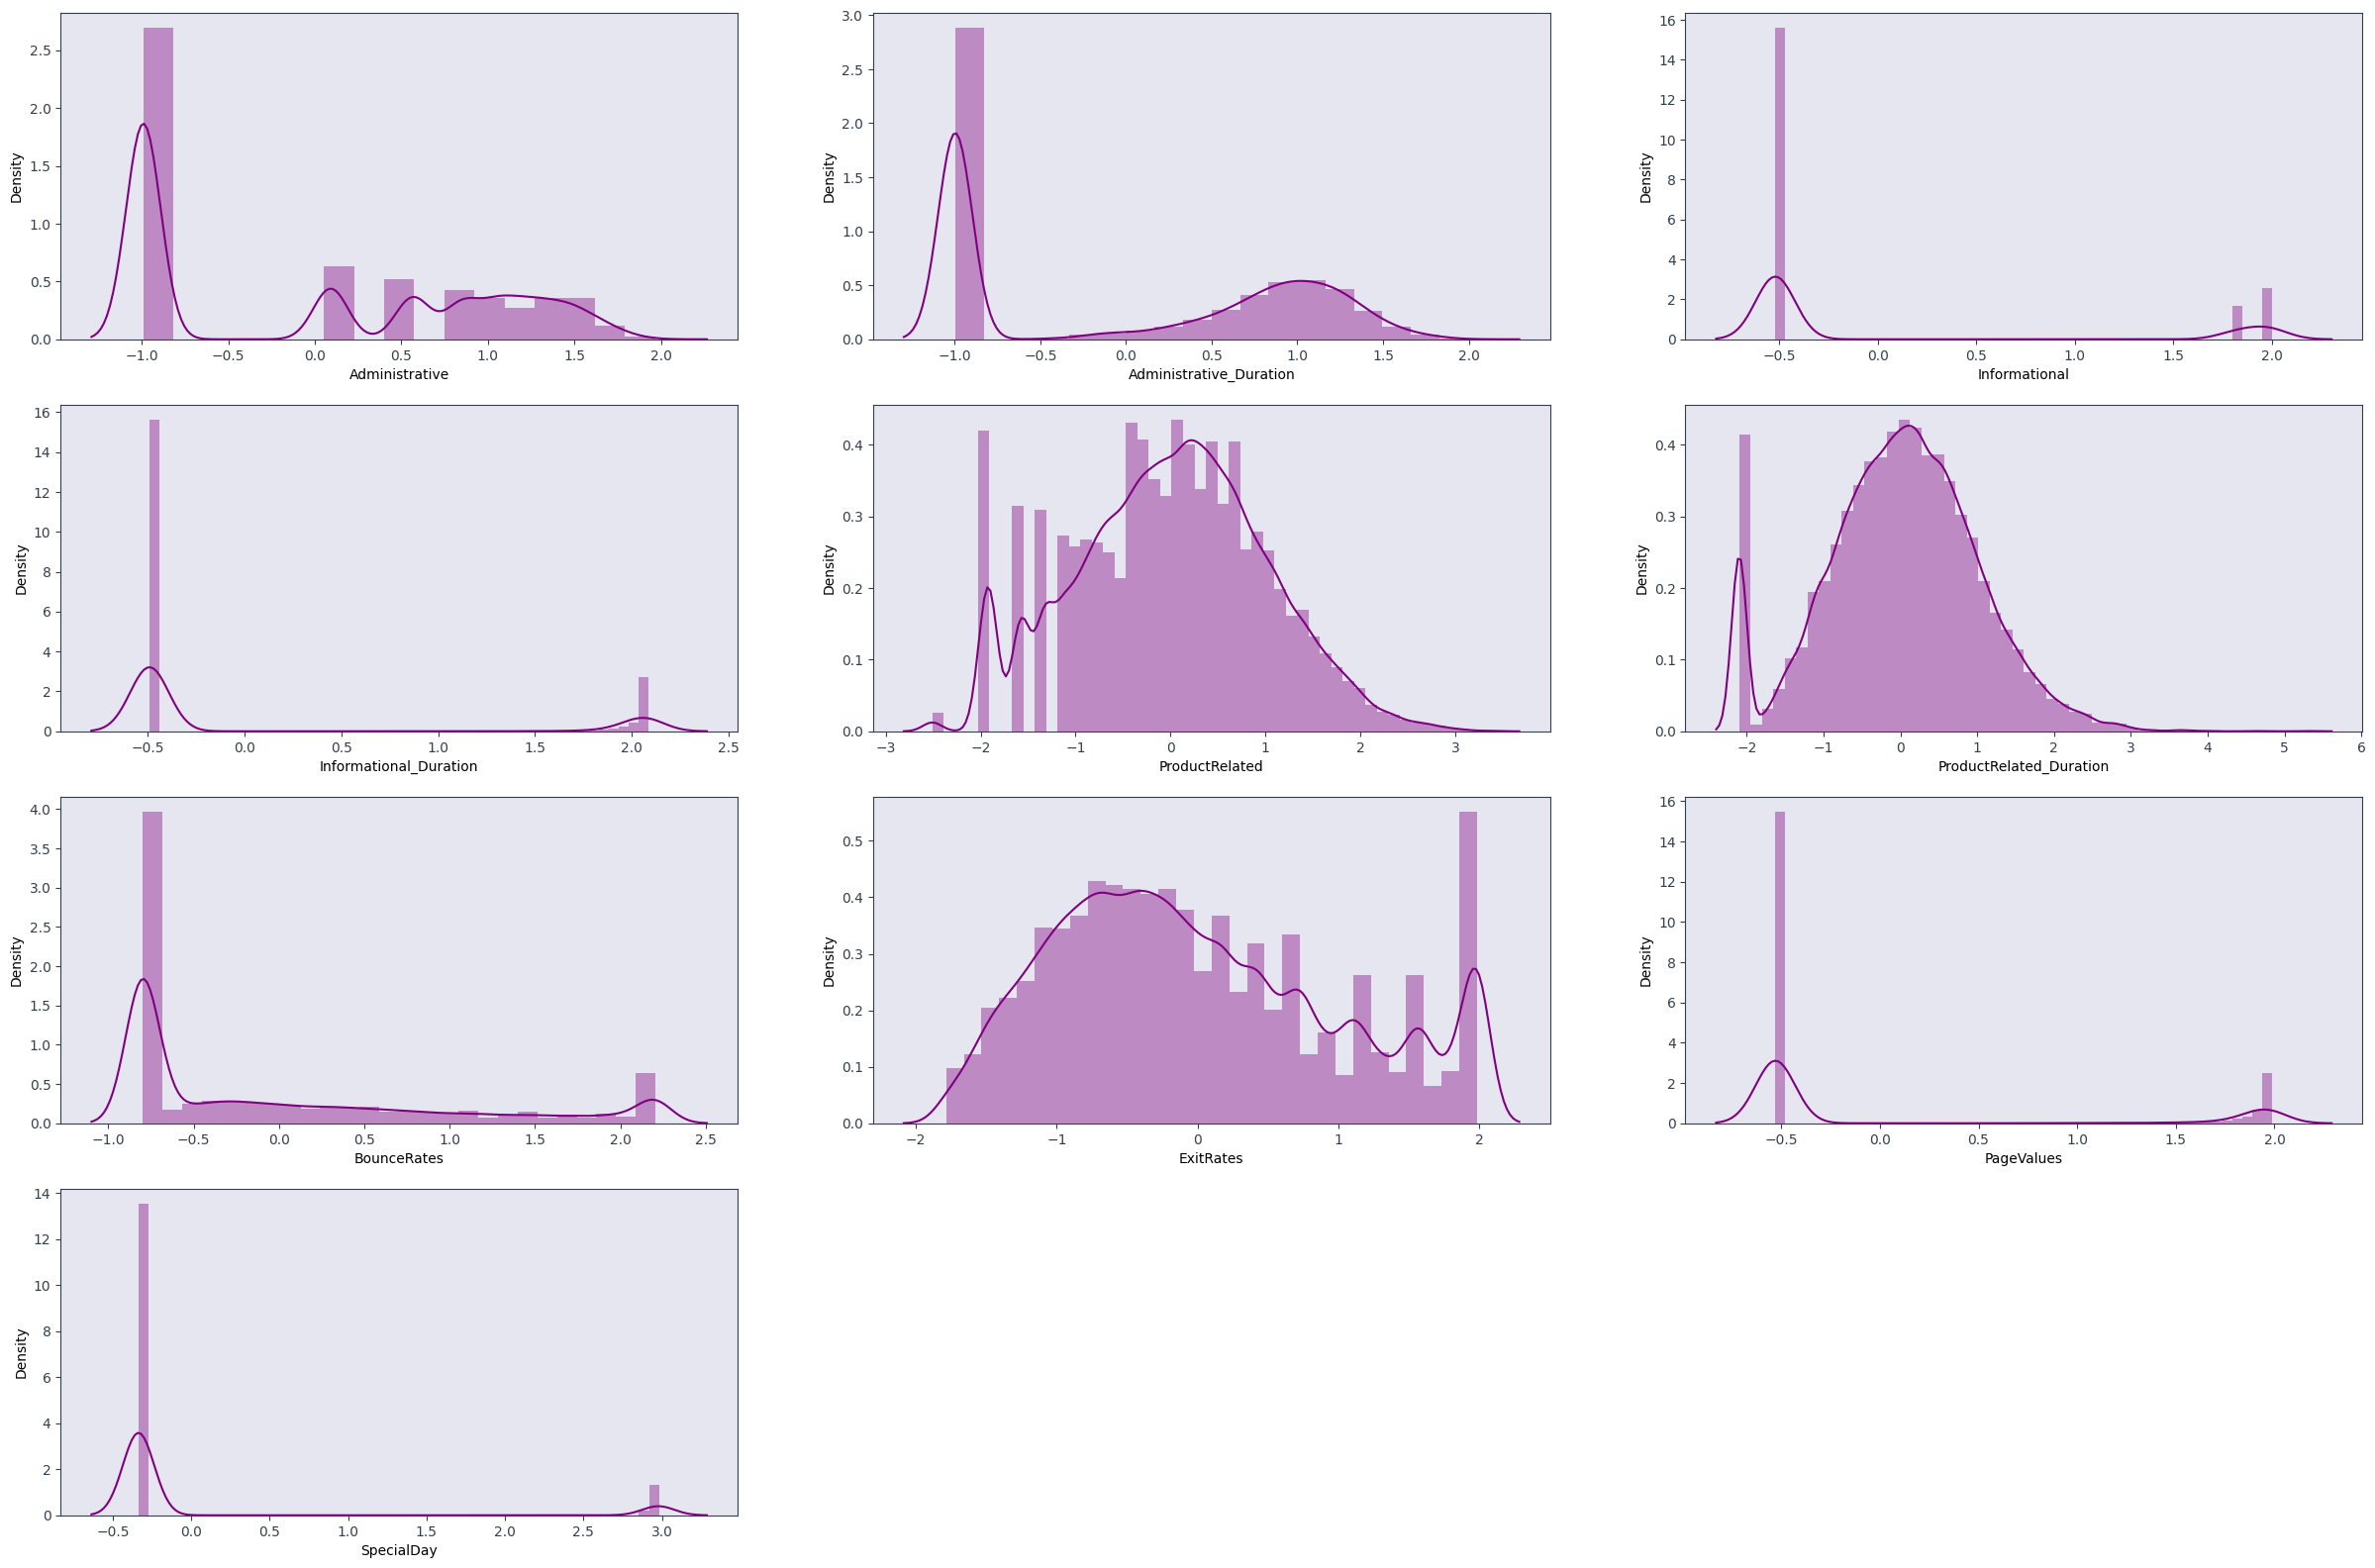

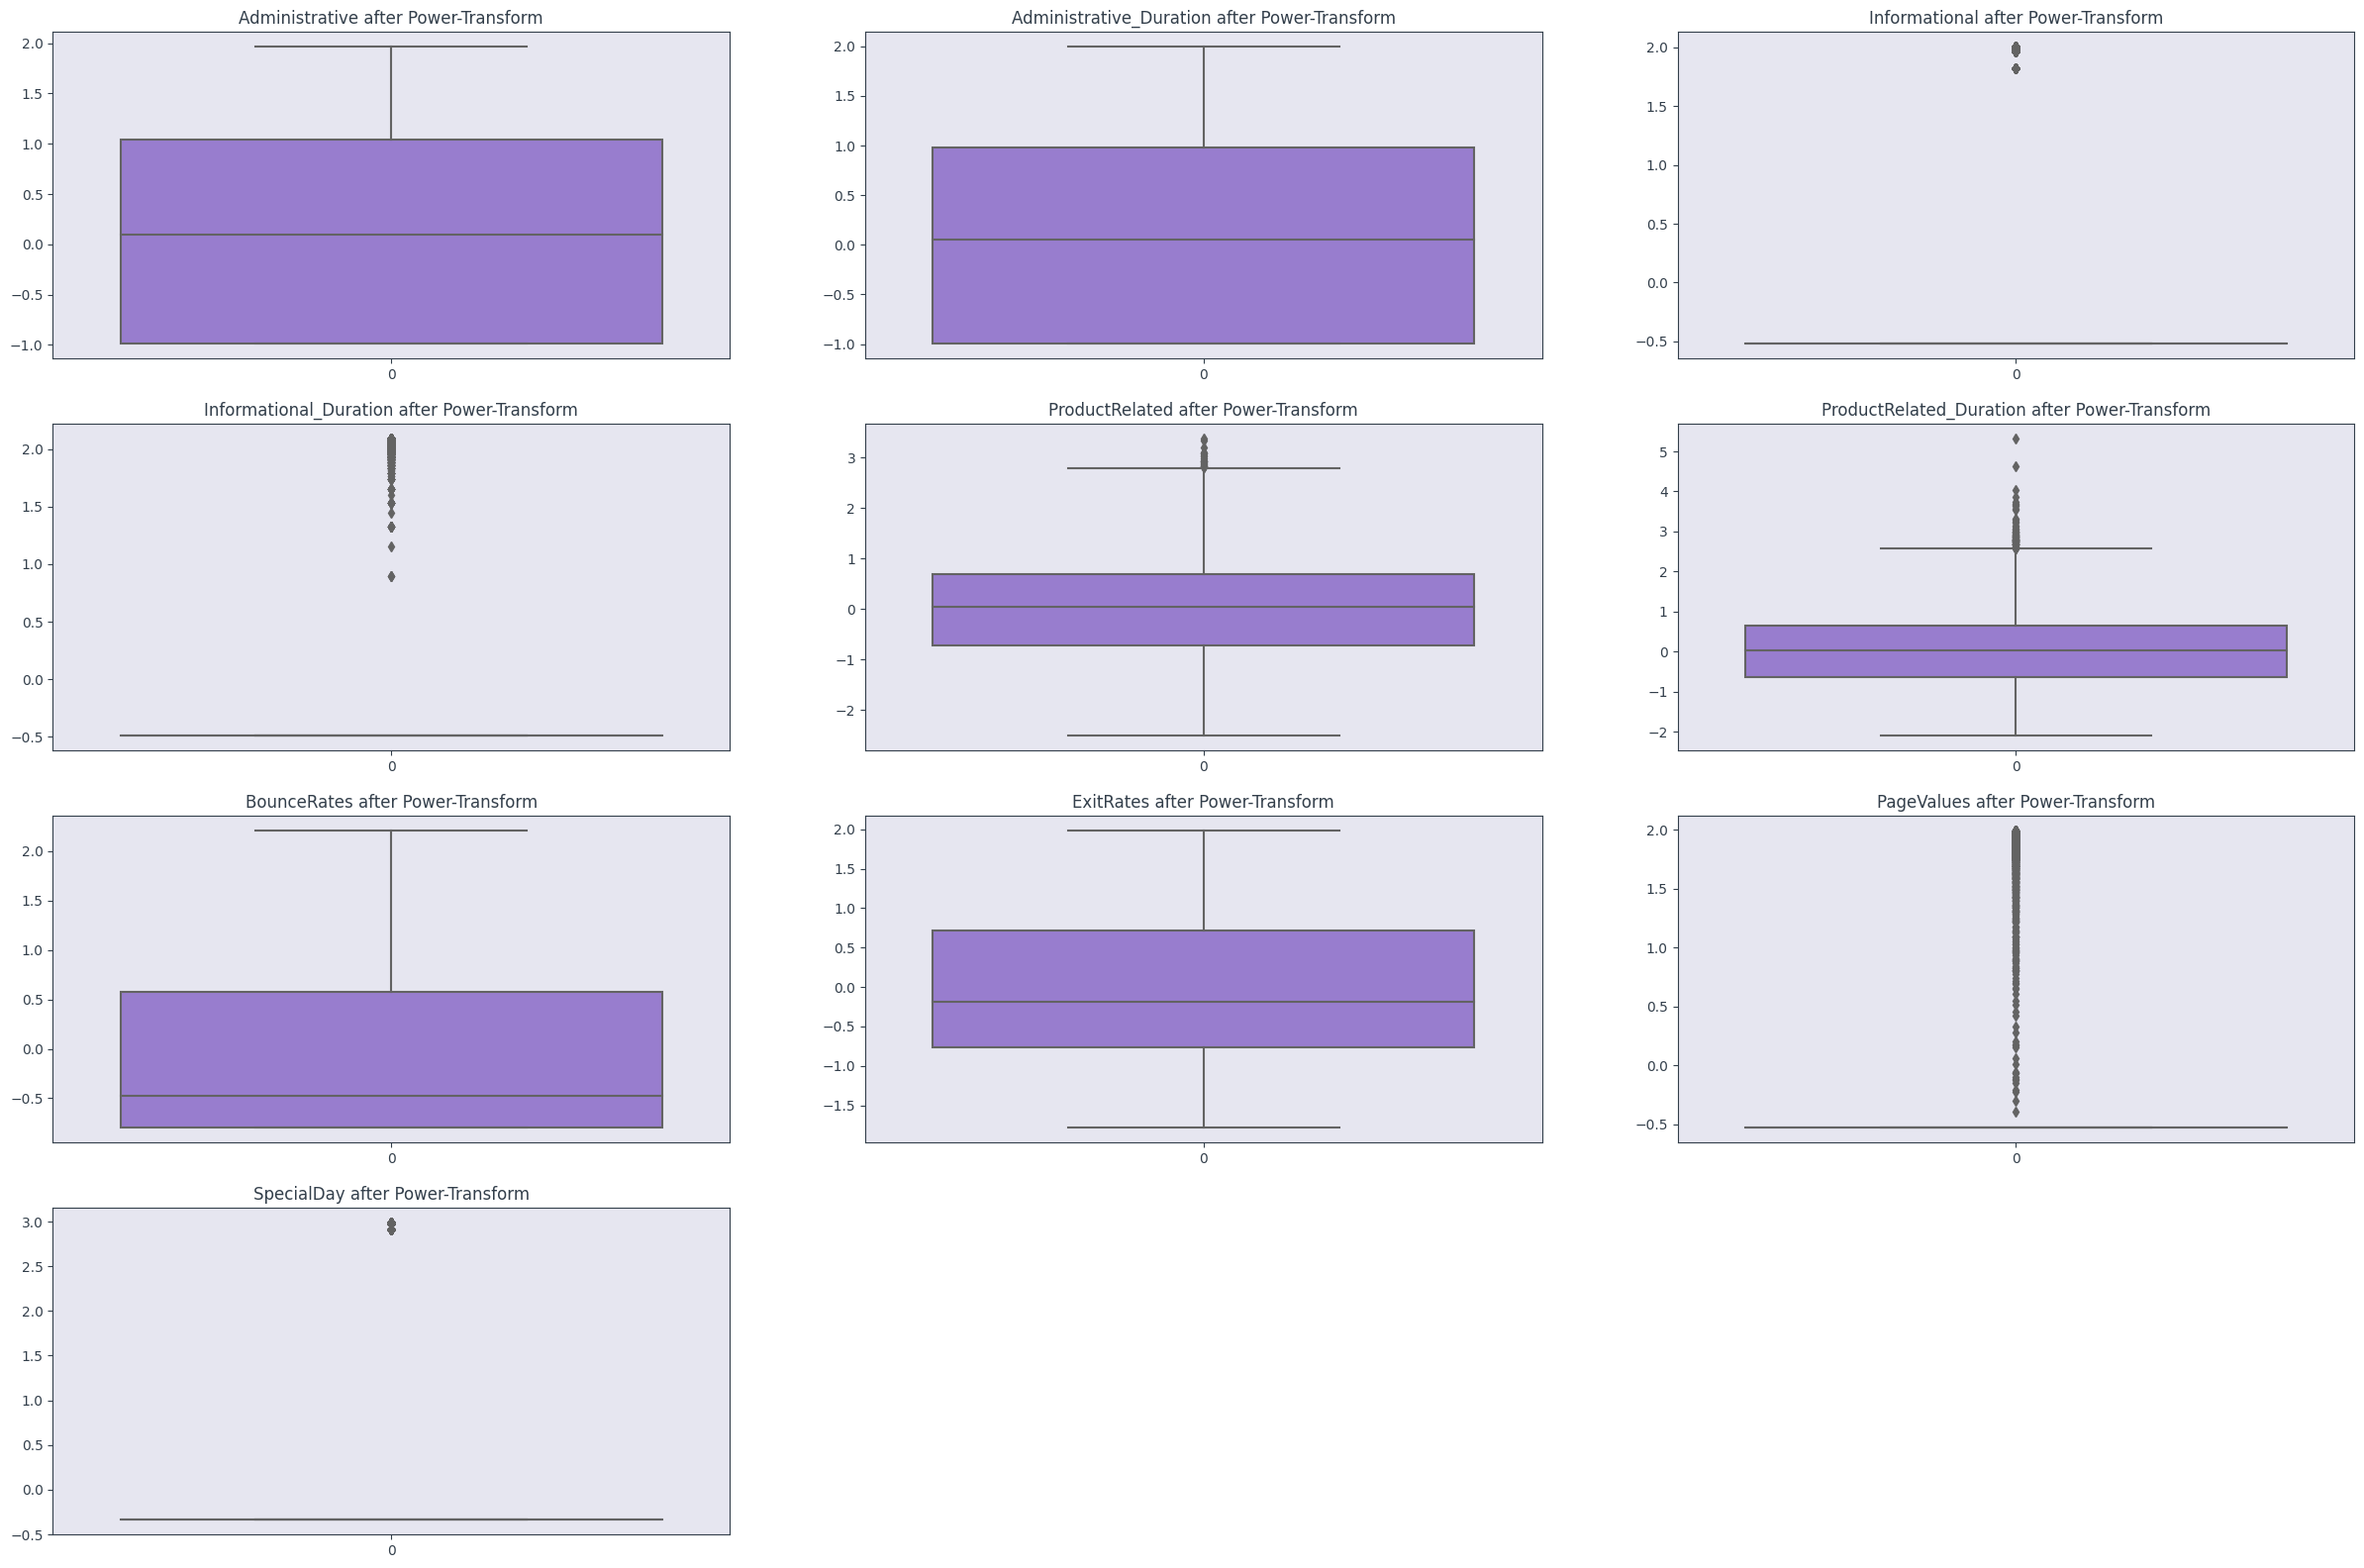

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt_num = pd.DataFrame(pt.fit_transform(num),columns=num.columns)
plt.figure(figsize=(30,30))
number = 0
for feature in features:
    number = number + 1
    ax = plt.subplot(6, 3, number,adjustable='datalim')
    ax = sns.distplot(pt_num[feature],  kde_kws={'bw':0.1}, color='purple')
    ax.set_facecolor((0.90, 0.90, 0.94))

features = pt_num.columns
plt.figure(figsize=(30,30))
number = 0
for feature in features:
    number = number + 1
    ax = plt.subplot(6, 3, number,adjustable='datalim')
    ax = sns.boxplot(pt_num[feature], color='mediumpurple')
    ax.set_facecolor((0.90, 0.90, 0.94))
    ax.set_title(feature + ' ' + 'after Power-Transform')


As seen above, most of the columns were scaled to a Gaussian-like shape and the impact of multiple outliers
was decreased to the point that they do no exceed the above quantiles anymore.


# Outlier Analysis

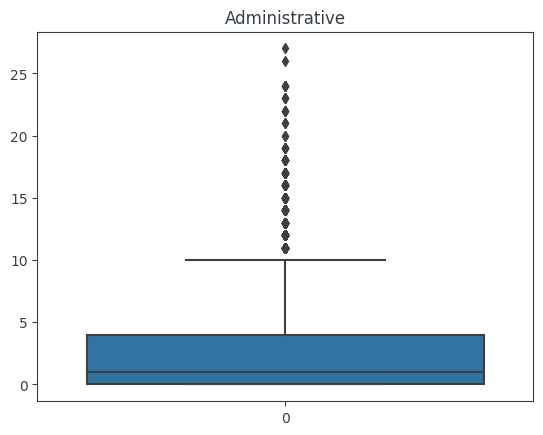

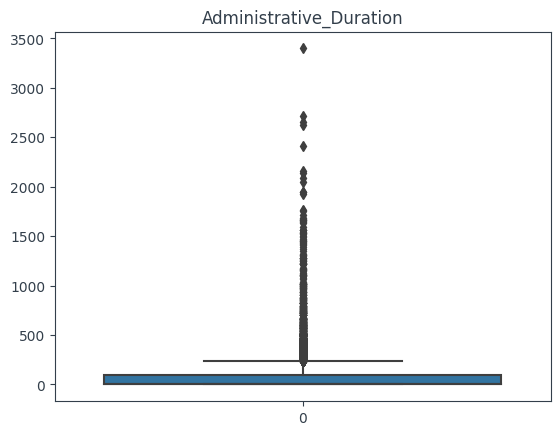

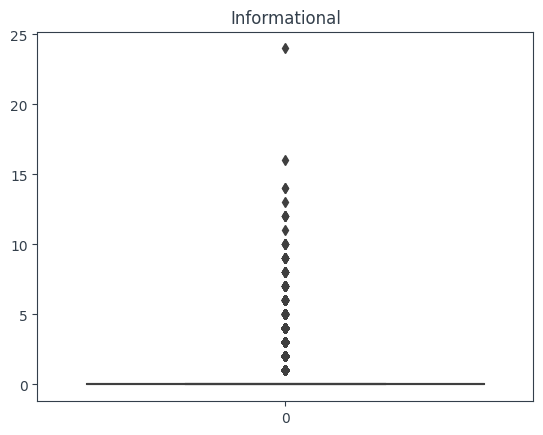

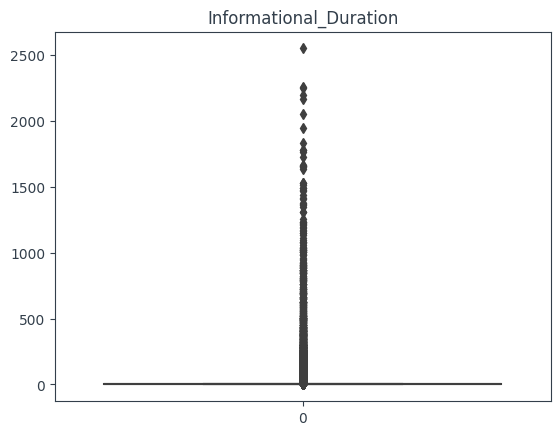

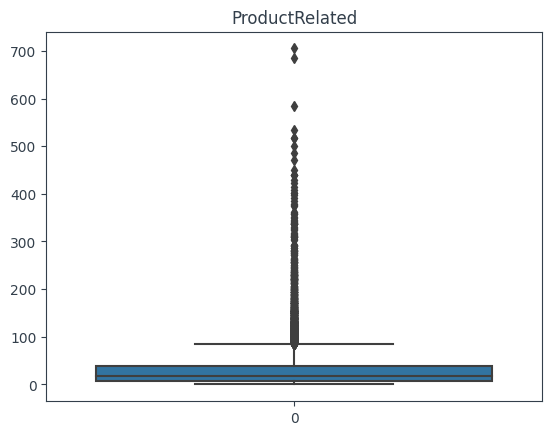

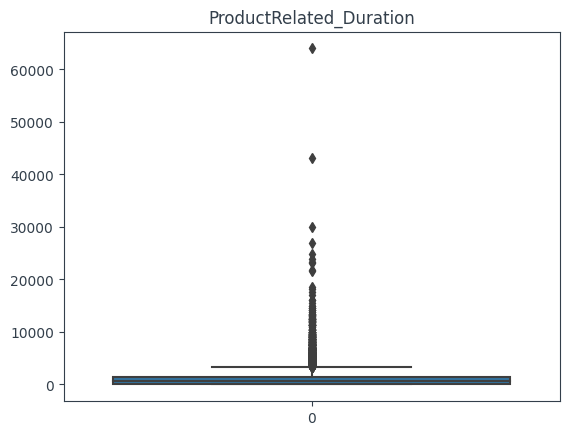

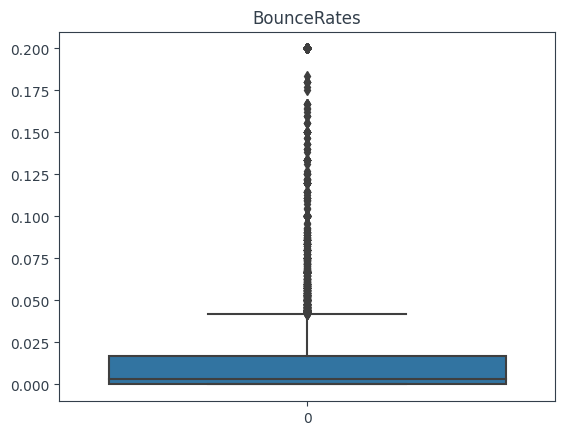

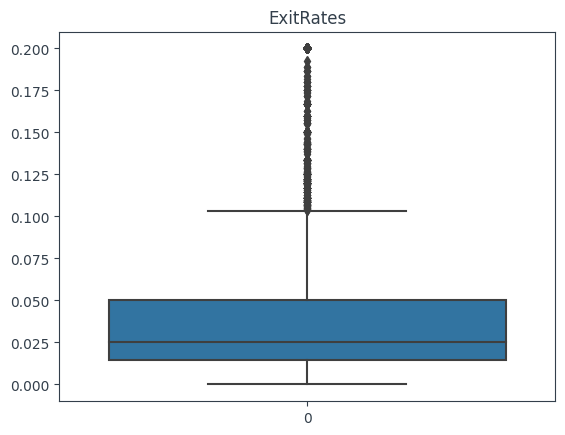

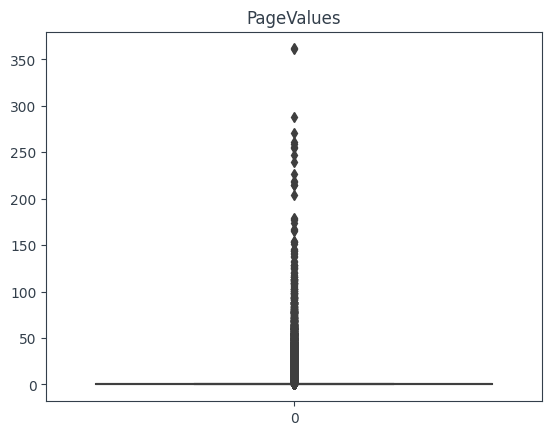

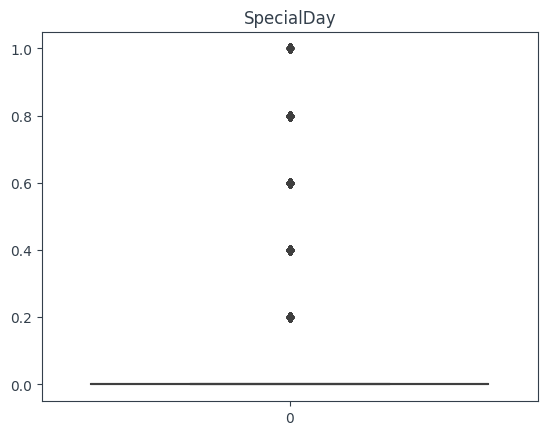

In [ ]:
for i in num.columns:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()
#Inference -
# Although we have a lot of outliers in the data, these are pretty realistic outliers.
# Therefore, I will not be removing the same. I will be treating the same by applying Power Transformation

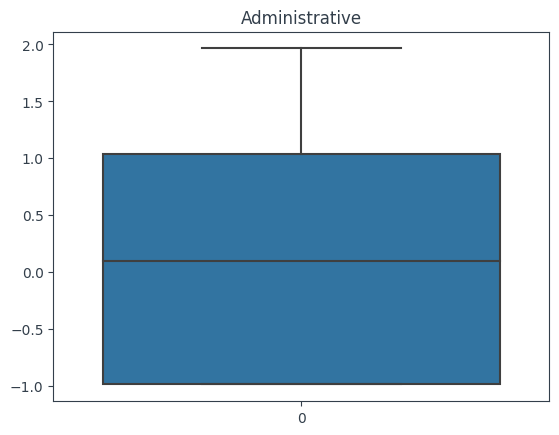

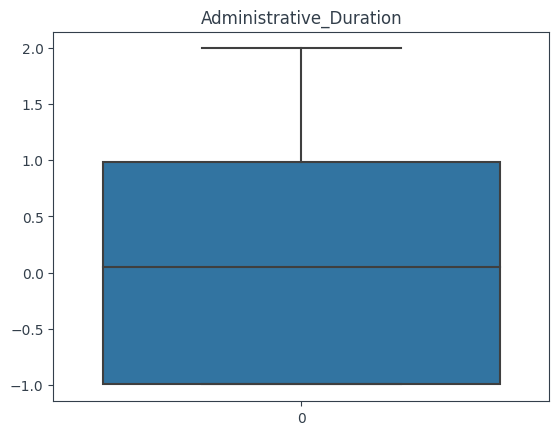

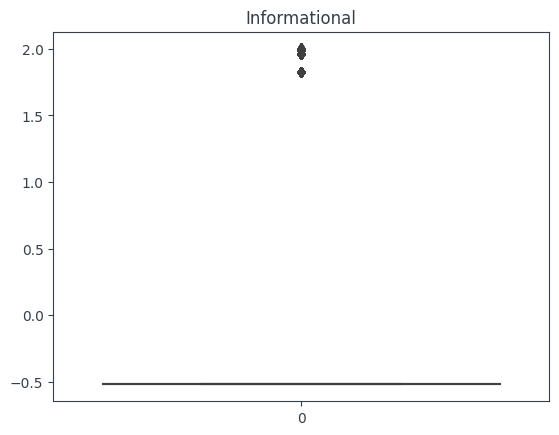

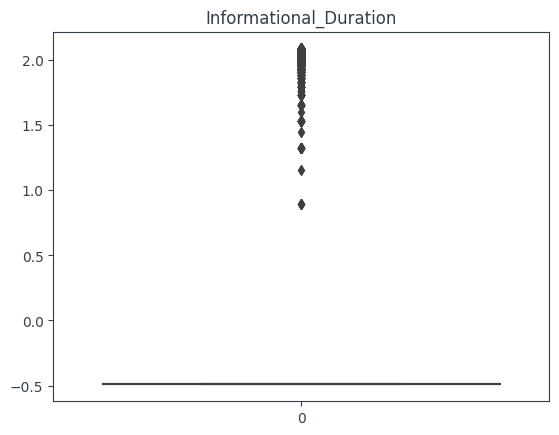

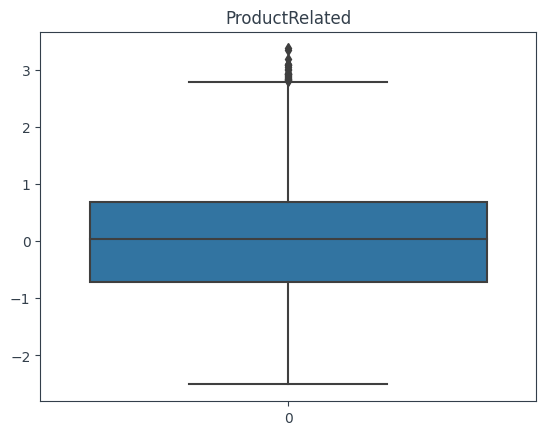

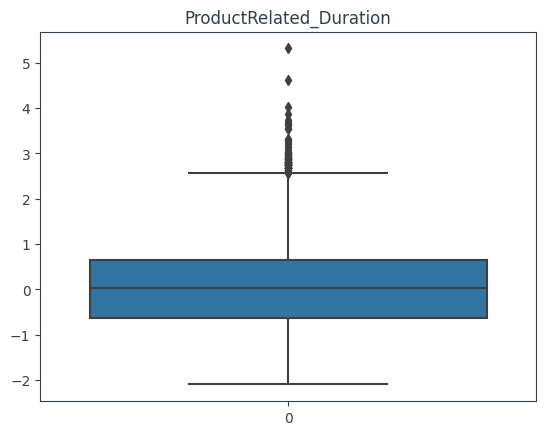

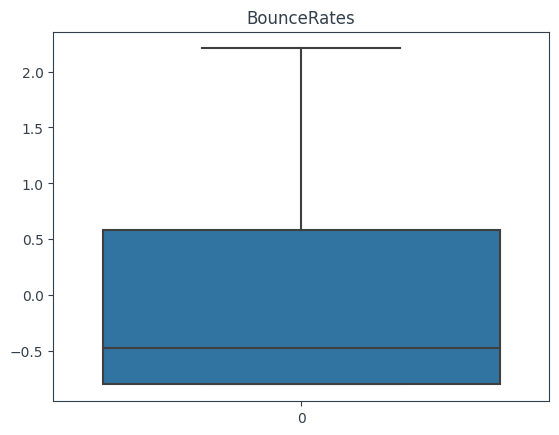

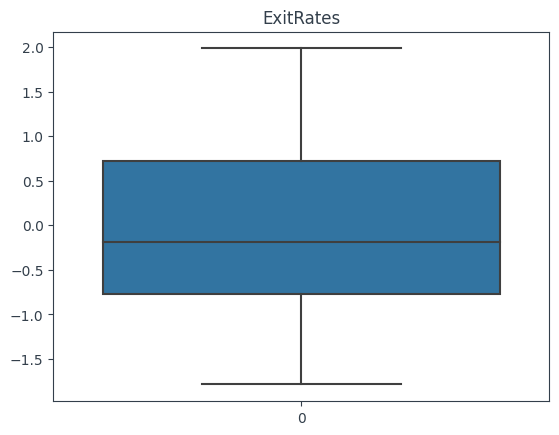

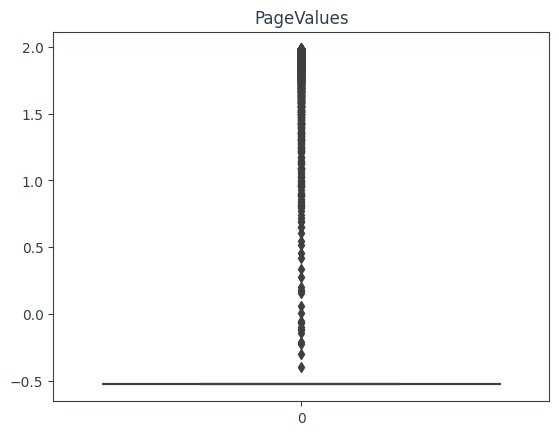

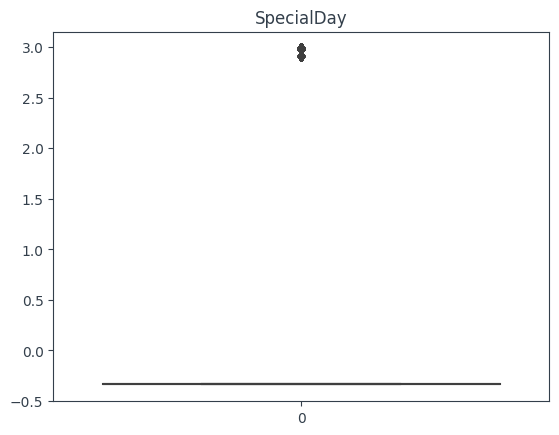

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt_num = pd.DataFrame(pt.fit_transform(num),columns=num.columns)

for i in pt_num.columns:
    sns.boxplot(pt_num[i])
    plt.title(i)
    plt.show()
#Then impact of outliers has been reduced considerably!

# Scaling & Encoding

In [ ]:
# Removing statistically insignificant variables

cat.drop('Region',axis=1,inplace=True)

In [ ]:
# Creating a new data Frame without power transformed numerical variables. Will add power transformed values for
# comparison later

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_num = pd.DataFrame(sc.fit_transform(num),columns=num.columns)


new_df = pd.concat([sc_num,cat],axis=1)


# numerically encoding Weekend and Revenue

new_df['Weekend'].replace({False:0,True:1},inplace =True)
new_df['Revenue'].replace({'No':0,'Yes':1},inplace =True)
new_df.head()

Administrative  Administrative_Duration  Informational  \
0       -0.696993                -0.457191      -0.396478   
1       -0.696993                -0.457191      -0.396478   
2       -0.696993                -0.457191      -0.396478   
3       -0.696993                -0.457191      -0.396478   
4       -0.696993                -0.457191      -0.396478   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.244931       -0.691003                -0.624348   
1               -0.244931       -0.668518                -0.590903   
2               -0.244931       -0.691003                -0.624348   
3               -0.244931       -0.668518                -0.622954   
4               -0.244931       -0.488636                -0.296430   

   BounceRates  ExitRates  PageValues  SpecialDay Month OperatingSystems  \
0     3.667189   3.229316   -0.317178   -0.308821   Feb                1   
1    -0.457683   1.171473   -0.317178   -0.308821   Feb                2   
2     3.667189   3.229316   -0.317178   -0.308821   Feb                4   
3     0.573535   1.994610   -0.317178   -0.308821   Feb                3   
4    -0.045196   0.142551   -0.317178   -0.308821   Feb                3   

  Browser TrafficType        VisitorType  Weekend  Revenue  
0       1           1  Returning_Visitor        0        0  
1       2           2  Returning_Visitor        0        0  
2       1           3  Returning_Visitor        0        0  
3       2           4  Returning_Visitor        0        0  
4       3           4  Returning_Visitor        1        0

In [ ]:
# One hot encoding / dummy variables

sc_df = pd.get_dummies(new_df,drop_first=True)
sc_df.head()

Administrative  Administrative_Duration  Informational  \
0       -0.696993                -0.457191      -0.396478   
1       -0.696993                -0.457191      -0.396478   
2       -0.696993                -0.457191      -0.396478   
3       -0.696993                -0.457191      -0.396478   
4       -0.696993                -0.457191      -0.396478   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.244931       -0.691003                -0.624348   
1               -0.244931       -0.668518                -0.590903   
2               -0.244931       -0.691003                -0.624348   
3               -0.244931       -0.668518                -0.622954   
4               -0.244931       -0.488636                -0.296430   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  TrafficType_13  \
0     3.667189   3.229316   -0.317178   -0.308821  ...               0   
1    -0.457683   1.171473   -0.317178   -0.308821  ...               0   
2     3.667189   3.229316   -0.317178   -0.308821  ...               0   
3     0.573535   1.994610   -0.317178   -0.308821  ...               0   
4    -0.045196   0.142551   -0.317178   -0.308821  ...               0   

   TrafficType_14  TrafficType_15  TrafficType_16  TrafficType_17  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   TrafficType_18  TrafficType_19  TrafficType_20  VisitorType_Other  \
0               0               0               0                  0   
1               0               0               0                  0   
2               0               0               0                  0   
3               0               0               0                  0   
4               0               0               0                  0   

   VisitorType_Returning_Visitor  
0                              1  
1                              1  
2                              1  
3                              1  
4                              1  

[5 rows x 61 columns]

# Applying Base Model - with / without transformation
Whether data with or without transformation is to be used in further analysis will be decided here

In [ ]:
y = sc_df['Revenue']
x = sc_df.drop('Revenue',1)
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state = 2)
xtrain, xval, ytrain, yval = train_test_split(xtrain,ytrain,test_size=0.1, random_state=2)
print('xtrain',xtrain.shape)
print('ytrain',ytrain.shape)
print('xtest',xtest.shape)
print('ytest',ytest.shape)
print('xval',xval.shape)
print('yval',yval.shape)

xtrain (7767, 60)
ytrain (7767,)
xtest (3699, 60)
ytest (3699,)
xval (864, 60)
yval (864,)


# Base Model - Without Transformation

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier
# adb = AdaBoostClassifier(random_state = 42)
# adb.fit(X_train,y_train)

# from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score
# ypred_train = adb.predict(X_train)
# ypred_test = adb.predict(X_val)

# print('Train Accuracy:',accuracy_score(y_train,ypred_train))
# print('Test Accuracy:',accuracy_score(y_val,ypred_test))

# print()
# print('Train Precision:',precision_score(y_train,ypred_train))
# print('Test Precision:',precision_score(y_val,ypred_test))

# print()

# print('Train Recall:',recall_score(y_train,ypred_train))
# print('Test Recall:',recall_score(y_val,ypred_test))

# print()

# print('Train f1 score:',f1_score(y_train,ypred_train))
# print('Test f1 score:',f1_score(y_val,ypred_test))

# print()

# ytrain_prob = adb.predict_proba(X_train)[:,1]
# ytest_prob = adb.predict_proba(X_val)[:,1]

# print('Train ROC AUC Score',roc_auc_score(y_train,ytrain_prob))
# print('Test ROC AUC Score',roc_auc_score(y_val,ytest_prob))

In [ ]:
#fitting a base model for comparison with final model

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(xtrain,ytrain)


from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score

ypred_train = log_reg.predict(xtrain)
ypred_test = log_reg.predict(xtest)


print('Train Accuracy:',accuracy_score(ytrain,ypred_train))
print('Test Accuracy:',accuracy_score(ytest,ypred_test))

# Accuracy on the test set is 0.89. As a base model, this accuracy is pretty decent.
# Also, accuracy is not a very reliable metric in terms of imbalanced data.
# Accuracy = (TP+TN)/(TP+TN +FP+FN)

print()
print('Train Precision:',precision_score(ytrain,ypred_train))
print('Test Precision:',precision_score(ytest,ypred_test))

print()

print('Train Recall:',recall_score(ytrain,ypred_train))
print('Test Recall:',recall_score(ytest,ypred_test))

print()

print('Train f1 score:',f1_score(ytrain,ypred_train))
print('Test f1 score:',f1_score(ytest,ypred_test))

Train Accuracy: 0.885412643234196
Test Accuracy: 0.8907812922411462

Train Precision: 0.768621236133122
Test Precision: 0.7208480565371025

Train Recall: 0.3946297803091945
Test Recall: 0.3856332703213611

Train f1 score: 0.521505376344086
Test f1 score: 0.5024630541871922


Precion score means out of total positive predictions (Revenue Positive Sessions), how many are correctly predicted.
Recall score mean out of actually revenue positive sessions, how many are correctly predicted
f1 score represents harmonic mean of precision and recall and takes into account both the values

Precision is TP/(TP+FP)

Recall is TP/(TP+FN)
Business objective discussion-

If business wants to minimize false negatives, here (i.e the objective is to not miss identifying sessions which will yield revenue), then recall becomes important.

If the business prioritizes minimizing false positives (here it means we do not want to predict no revenue sessions as revenue sessions, then precision becomes important. However, for the current purpose I assume both recall and precision score are important metric and we will take that into account. We will also use other metrics such as AUC-ROC score for model evaluation.

Although recall could be more important in certain situations, I will use a more robust metric ie. AUC ROC score while using 5 fold cross validation

In [ ]:
# ROC AUC Scores

ytrain_prob = log_reg.predict_proba(xtrain)[:,1]
ytest_prob = log_reg.predict_proba(xtest)[:,1]

print('Train ROC AUC Score',roc_auc_score(ytrain,ytrain_prob))
print('Test ROC AUC Score',roc_auc_score(ytest,ytest_prob))

Train ROC AUC Score 0.8985479145390496
Test ROC AUC Score 0.8911773300018486


In [ ]:
# from xgboost import XGBClassifier
# ad_b=XGBClassifier()
# ad_b = XGBClassifier()
# ad_b.fit(X_train,y_train)

# from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score
# ypred_train = ad_b.predict(X_train)
# ypred_test = ad_b.predict(X_val)

# print('Train Accuracy:',accuracy_score(y_train,ypred_train))
# print('Test Accuracy:',accuracy_score(y_val,ypred_test))

# print()
# print('Train Precision:',precision_score(y_train,ypred_train))
# print('Test Precision:',precision_score(y_val,ypred_test))

# print()

# print('Train Recall:',recall_score(y_train,ypred_train))
# print('Test Recall:',recall_score(y_val,ypred_test))

# print()

# print('Train f1 score:',f1_score(y_train,ypred_train))
# print('Test f1 score:',f1_score(y_val,ypred_test))

# print()

# ytrain_prob = log_reg.predict_proba(X_train)[:,1]
# ytest_prob = log_reg.predict_proba(X_val)[:,1]

# print('Train ROC AUC Score',roc_auc_score(y_train,ytrain_prob))
# print('Test ROC AUC Score',roc_auc_score(y_val,ytest_prob))

In [ ]:
Final = pd.DataFrame(index= ['Train Accuracy','Test Accuracy','Train Precision','Test Precision','Train Recall',\
                     'Test Recall','Train f1 score','Test f1 score','Train ROC AUC Score','Test ROC AUC Score'])

Final['Base Model'] = [accuracy_score(ytrain,ypred_train),accuracy_score(ytest,ypred_test),precision_score(ytrain,ypred_train),\
                      precision_score(ytest,ypred_test),recall_score(ytrain,ypred_train),recall_score(ytest,ypred_test),\
                      f1_score(ytrain,ypred_train),f1_score(ytest,ypred_test),roc_auc_score(ytrain,ytrain_prob),\
                       roc_auc_score(ytest,ytest_prob)]

# With Transformation

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt_num = pd.DataFrame(pt.fit_transform(num),columns=num.columns)


pt_df = pd.concat([pt_num,cat],axis=1)


# numerically encoding Weekend and Revenue

pt_df['Weekend'].replace({False:0,True:1},inplace =True)
pt_df['Revenue'].replace({'No':0,'Yes':1},inplace =True)
pt_df.head()

Administrative  Administrative_Duration  Informational  \
0       -0.990128                -0.996659      -0.520489   
1       -0.990128                -0.996659      -0.520489   
2       -0.990128                -0.996659      -0.520489   
3       -0.990128                -0.996659      -0.520489   
4       -0.990128                -0.996659      -0.520489   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.491697       -1.922123                -2.096783   
1               -0.491697       -1.574524                -1.074189   
2               -0.491697       -1.922123                -2.096783   
3               -0.491697       -1.574524                -1.875436   
4               -0.491697       -0.442610                 0.057515   

   BounceRates  ExitRates  PageValues  SpecialDay Month OperatingSystems  \
0     2.206432   1.982547   -0.529409    -0.33602   Feb                1   
1    -0.799209   1.569866   -0.529409    -0.33602   Feb                2   
2     2.206432   1.982547   -0.529409    -0.33602   Feb                4   
3     1.709303   1.832073   -0.529409    -0.33602   Feb                3   
4     0.756734   0.722460   -0.529409    -0.33602   Feb                3   

  Browser TrafficType        VisitorType  Weekend  Revenue  
0       1           1  Returning_Visitor        0        0  
1       2           2  Returning_Visitor        0        0  
2       1           3  Returning_Visitor        0        0  
3       2           4  Returning_Visitor        0        0  
4       3           4  Returning_Visitor        1        0

In [ ]:
# One hot encoding / dummy variables
pt_df = pd.get_dummies(pt_df,drop_first=True)
pt_df.head()

Administrative  Administrative_Duration  Informational  \
0       -0.990128                -0.996659      -0.520489   
1       -0.990128                -0.996659      -0.520489   
2       -0.990128                -0.996659      -0.520489   
3       -0.990128                -0.996659      -0.520489   
4       -0.990128                -0.996659      -0.520489   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.491697       -1.922123                -2.096783   
1               -0.491697       -1.574524                -1.074189   
2               -0.491697       -1.922123                -2.096783   
3               -0.491697       -1.574524                -1.875436   
4               -0.491697       -0.442610                 0.057515   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  TrafficType_13  \
0     2.206432   1.982547   -0.529409    -0.33602  ...               0   
1    -0.799209   1.569866   -0.529409    -0.33602  ...               0   
2     2.206432   1.982547   -0.529409    -0.33602  ...               0   
3     1.709303   1.832073   -0.529409    -0.33602  ...               0   
4     0.756734   0.722460   -0.529409    -0.33602  ...               0   

   TrafficType_14  TrafficType_15  TrafficType_16  TrafficType_17  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   TrafficType_18  TrafficType_19  TrafficType_20  VisitorType_Other  \
0               0               0               0                  0   
1               0               0               0                  0   
2               0               0               0                  0   
3               0               0               0                  0   
4               0               0               0                  0   

   VisitorType_Returning_Visitor  
0                              1  
1                              1  
2                              1  
3                              1  
4                              1  

[5 rows x 61 columns]

In [ ]:
#Dataset will be split into 70% train set, 20% validation set, and 10% test set.

In [ ]:
y = pt_df['Revenue']
x = pt_df.drop('Revenue',1)
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state = 2)
xtrain, xval, ytrain, yval = train_test_split(xtrain,ytrain,test_size=0.1, random_state=2)
print('xtrain',xtrain.shape)
print('ytrain',ytrain.shape)
print('xtest',xtest.shape)
print('ytest',ytest.shape)
print('xval',xval.shape)
print('yval',yval.shape)

xtrain (7767, 60)
ytrain (7767,)
xtest (3699, 60)
ytest (3699,)
xval (864, 60)
yval (864,)


In [ ]:
ans = pd.concat([xval,yval],axis=1)
ans

Administrative  Administrative_Duration  Informational  \
3247        -0.990128                -0.996659      -0.520489   
4247         1.040186                 1.083637      -0.520489   
8705        -0.990128                -0.996659      -0.520489   
1750        -0.990128                -0.996659      -0.520489   
8921         1.181123                 1.052188      -0.520489   
...               ...                      ...            ...   
8417         1.512247                 1.151277       2.000385   
6228         0.566915                 1.248933       1.997635   
10101        1.512247                 1.499800      -0.520489   
1625        -0.990128                -0.996659      -0.520489   
9705         1.290376                 1.568285       1.990277   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
3247                -0.491697        0.250488                -0.460349   
4247                -0.491697        0.536346                 1.069253   
8705                -0.491697       -0.295054                 0.061828   
1750                -0.491697       -0.619245                -1.039169   
8921                -0.491697        0.131134                -0.116569   
...                       ...             ...                      ...   
8417                 2.079779        1.384990                 1.162596   
6228                 2.074977        0.087599                 0.363972   
10101               -0.491697        0.131134                 0.485305   
1625                -0.491697       -0.974115                 0.567252   
9705                 2.084839        2.051542                 2.117421   

       BounceRates  ExitRates  PageValues  SpecialDay  ...  TrafficType_14  \
3247     -0.799209  -1.358362   -0.529409    -0.33602  ...               0   
4247     -0.507523  -0.376613    1.965736    -0.33602  ...               0   
8705      1.782825   1.217913    1.985321    -0.33602  ...               0   
1750      0.995817   0.994666   -0.529409    -0.33602  ...               0   
8921      1.043220  -0.010948    1.944240    -0.33602  ...               0   
...            ...        ...         ...         ...  ...             ...   
8417     -0.799209  -1.101248   -0.529409    -0.33602  ...               0   
6228      1.164022   0.326936   -0.529409    -0.33602  ...               0   
10101     0.277463  -0.266264   -0.529409    -0.33602  ...               0   
1625      1.856630   1.727182   -0.529409    -0.33602  ...               0   
9705     -0.648734  -0.451716   -0.529409    -0.33602  ...               0   

       TrafficType_15  TrafficType_16  TrafficType_17  TrafficType_18  \
3247                0               0               0               0   
4247                0               0               0               0   
8705                0               0               0               0   
1750                0               0               0               0   
8921                0               0               0               0   
...               ...             ...             ...             ...   
8417                0               0               0               0   
6228                0               0               0               0   
10101               0               0               0               0   
1625                0               0               0               0   
9705                0               0               0               0   

       TrafficType_19  TrafficType_20  VisitorType_Other  \
3247                0               0                  0   
4247                0               0                  0   
8705                0               0                  0   
1750                0               0                  0   
8921                0               0                  0   
...               ...             ...                ...   
8417                0               0                  0   
6228                0               0      

In [ ]:
ans.to_csv('test.csv')

In [ ]:
ans.to_csv("/content/drive/MyDrive/Spacy_CV_PARSER_NER/test.csv")

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors()



# store the algorithms
# for the weighted SVM we mannualy tuned the class wights through trial and error
# to optimize the  fbeta score
Random_Forest = RandomForestClassifier(random_state = 42)#overweighing the positive minority class
XGboost = XGBClassifier(random_state = 123)
Logistic_Regression= LogisticRegression(solver = 'liblinear', random_state = 123)

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier
# adb = AdaBoostClassifier(random_state = 42)
# adb.fit(X_train,y_train)

# from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score
# ypred_train = adb.predict(X_train)
# ypred_test = adb.predict(X_val)

# print('Train Accuracy:',accuracy_score(y_train,ypred_train))
# print('Test Accuracy:',accuracy_score(y_val,ypred_test))

# print()
# print('Train Precision:',precision_score(y_train,ypred_train))
# print('Test Precision:',precision_score(y_val,ypred_test))

# print()

# print('Train Recall:',recall_score(y_train,ypred_train))
# print('Test Recall:',recall_score(y_val,ypred_test))

# print()

# print('Train f1 score:',f1_score(y_train,ypred_train))
# print('Test f1 score:',f1_score(y_val,ypred_test))

# print()

# ytrain_prob = adb.predict_proba(X_train)[:,1]
# ytest_prob = adb.predict_proba(X_val)[:,1]

# print('Train ROC AUC Score',roc_auc_score(y_train,ytrain_prob))
# print('Test ROC AUC Score',roc_auc_score(y_val,ytest_prob))

In [ ]:
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(xtrain,ytrain)
ypred_train = log_reg.predict(xtrain)
ypred_test = log_reg.predict(xtest)

print('Train Accuracy:',accuracy_score(ytrain,ypred_train))
print('Test Accuracy:',accuracy_score(ytest,ypred_test))

print()
print('Train Precision:',precision_score(ytrain,ypred_train))
print('Test Precision:',precision_score(ytest,ypred_test))

print()

print('Train Recall:',recall_score(ytrain,ypred_train))
print('Test Recall:',recall_score(ytest,ypred_test))

print()

print('Train f1 score:',f1_score(ytrain,ypred_train))
print('Test f1 score:',f1_score(ytest,ypred_test))

print()

ytrain_prob = log_reg.predict_proba(xtrain)[:,1]
ytest_prob = log_reg.predict_proba(xtest)[:,1]

print('Train ROC AUC Score',roc_auc_score(ytrain,ytrain_prob))
print('Test ROC AUC Score',roc_auc_score(ytest,ytest_prob))

Train Accuracy: 0.8979013776232779
Test Accuracy: 0.8969991889699919

Train Precision: 0.7029795158286778
Test Precision: 0.6497975708502024

Train Recall: 0.6143205858421481
Test Recall: 0.6068052930056711

Train f1 score: 0.6556665219279201
Test f1 score: 0.6275659824046921

Train ROC AUC Score 0.9179210429308436
Test ROC AUC Score 0.9030955376789731


In [ ]:
# from xgboost import XGBClassifier
# ad_b=XGBClassifier()
# ad_b = XGBClassifier()
# ad_b.fit(X_train,y_train)

# from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score
# ypred_train = ad_b.predict(X_train)
# ypred_test = ad_b.predict(X_val)

# print('Train Accuracy:',accuracy_score(y_train,ypred_train))
# print('Test Accuracy:',accuracy_score(y_val,ypred_test))

# print()
# print('Train Precision:',precision_score(y_train,ypred_train))
# print('Test Precision:',precision_score(y_val,ypred_test))

# print()

# print('Train Recall:',recall_score(y_train,ypred_train))
# print('Test Recall:',recall_score(y_val,ypred_test))

# print()

# print('Train f1 score:',f1_score(y_train,ypred_train))
# print('Test f1 score:',f1_score(y_val,ypred_test))

# print()

# ytrain_prob = log_reg.predict_proba(X_train)[:,1]
# ytest_prob = log_reg.predict_proba(X_val)[:,1]

# print('Train ROC AUC Score',roc_auc_score(y_train,ytrain_prob))
# print('Test ROC AUC Score',roc_auc_score(y_val,ytest_prob))

In [ ]:
Final['Base Model - Power Transformed'] = [accuracy_score(ytrain,ypred_train),accuracy_score(ytest,ypred_test),precision_score(ytrain,ypred_train),\
                      precision_score(ytest,ypred_test),recall_score(ytrain,ypred_train),recall_score(ytest,ypred_test),\
                      f1_score(ytrain,ypred_train),f1_score(ytest,ypred_test),roc_auc_score(ytrain,ytrain_prob),\
                       roc_auc_score(ytest,ytest_prob)]

In [ ]:
Final

Base Model  Base Model - Power Transformed
Train Accuracy         0.885413                        0.897901
Test Accuracy          0.890781                        0.896999
Train Precision        0.768621                        0.702980
Test Precision         0.720848                        0.649798
Train Recall           0.394630                        0.614321
Test Recall            0.385633                        0.606805
Train f1 score         0.521505                        0.655667
Test f1 score          0.502463                        0.627566
Train ROC AUC Score    0.898548                        0.917921
Test ROC AUC Score     0.891177                        0.903096

In [ ]:
pip install sklearn==0.22.0

ERROR: Could not find a version that satisfies the requirement sklearn==0.22.0 (from versions: 0.0, 0.0.post1, 0.0.post2, 0.0.post4, 0.0.post5, 0.0.post7, 0.0.post9, 0.0.post10)
ERROR: No matching distribution found for sklearn==0.22.0


All the evaluation metrics except precision are improving by using power transformation. Further even ROC-AUC scores improve in the case of power transformation, I will use this power transformed data for any futher analysis.

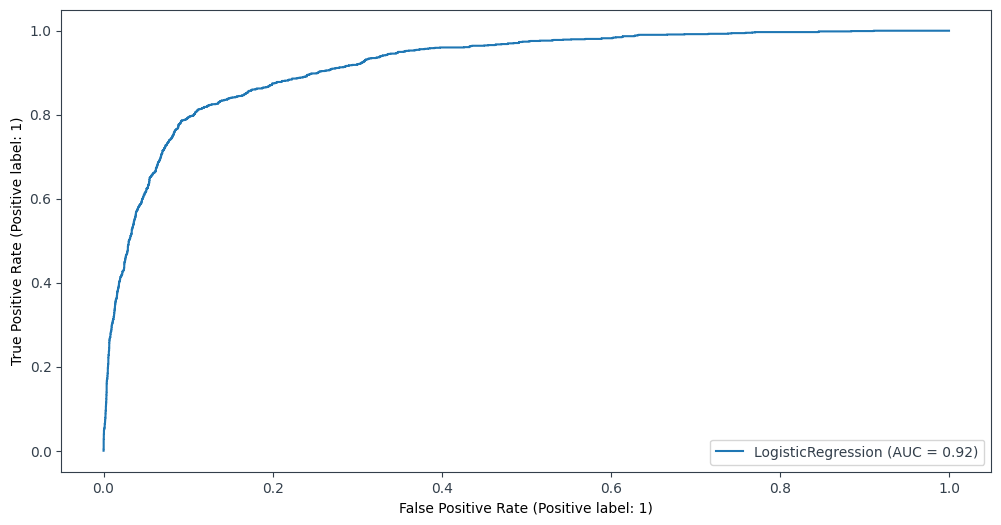

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(log_reg, xtrain, ytrain)
plt.show()

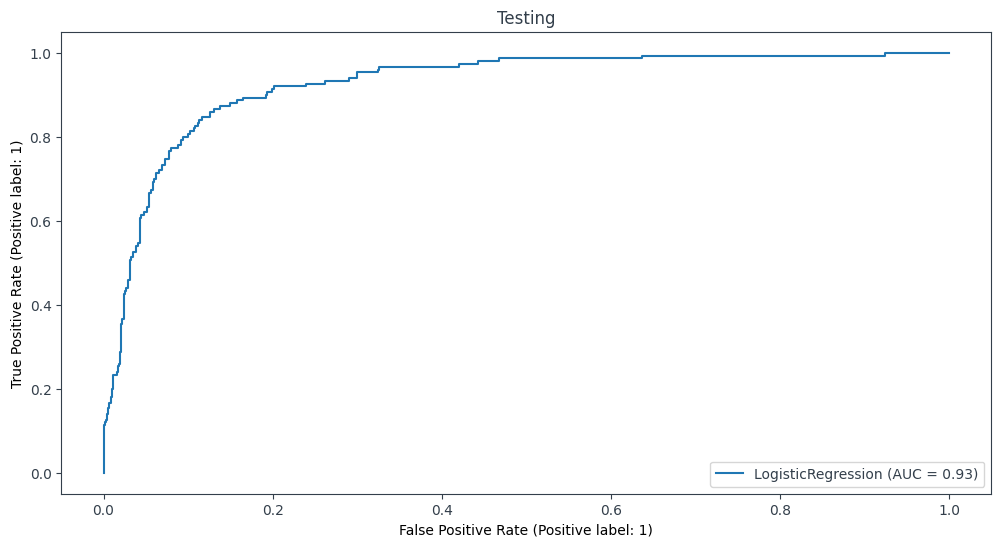

In [ ]:
RocCurveDisplay.from_estimator(log_reg, xval, yval)
plt.title('Testing')
plt.show()

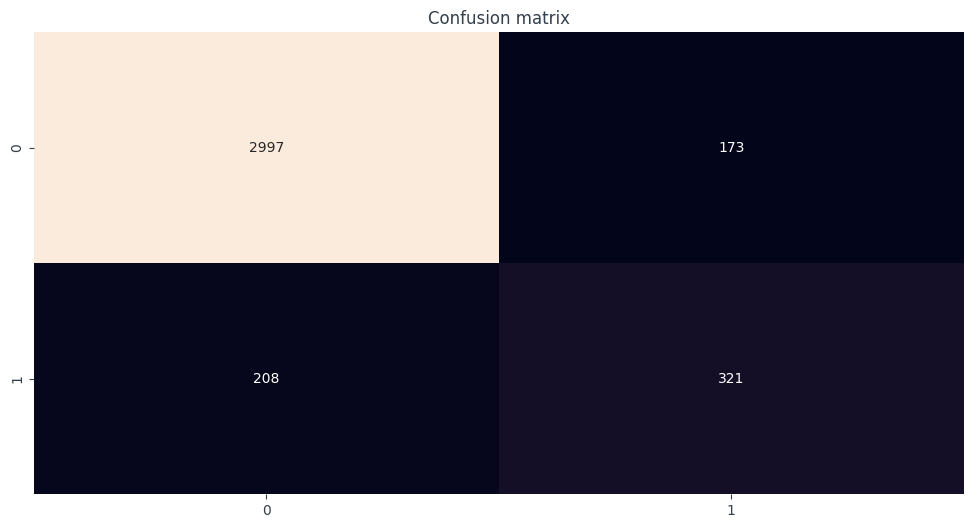

In [ ]:
# finally plotting confusion matrix for the test results

sns.heatmap(pd.DataFrame(confusion_matrix(ytest,ypred_test)),annot=True,fmt='d',cbar=False)
plt.title('Confusion matrix')
plt.show()

#here 173 sessions which actually did not turn into a sale were falsely predicted as revenue positive.
#here 208 revenue yielding sessions were not able to get detected and were predicted as no revenue sessions

# This needs improvement!

# Applying various parametric,non-parametric & ensemble models with hyperparameter tuning

Point of action / steps to be taken -

1. Apply other parametric and non parametric models
2. Hyper-Parameter tuning for these models
3. Applying ensemble techniques such as Adaboost classifier, XGBoost, Gradient boosting
4. Applying customized grid search for n_estimators wherever necessary
5. Apply feature selection strategies
6. Will also use SMOTE analysis to see if the performance on test improves

I will use 5-Fold cross validation strategy to check the bias and variance error in the model and my scoring parameter will be 'ROC-AUC' since it's a more robust metric. The model which performs best will be finally evaluated on the test data.

In [ ]:
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

In [ ]:
# summarizing models after tuning/ (wherever applicable)

log_reg = LogisticRegression(solver='liblinear')
bagged_log_reg = BaggingClassifier(log_reg,random_state=0)
boosted_log_reg = AdaBoostClassifier(log_reg,random_state=20)
knn_tuned = KNeighborsClassifier(n_neighbors=92,weights='distance')
bagged_knn = BaggingClassifier(knn_tuned,random_state=0)
dt_reg = DecisionTreeClassifier(max_depth=4,criterion='entropy',random_state=0)
rf_tuned = RandomForestClassifier(n_estimators=17,criterion='entropy',max_depth=9,random_state=0)
gbc = GradientBoostingClassifier(random_state=0,n_estimators=100)
abc = AdaBoostClassifier(random_state=0)
xgb = XGBClassifier(max_depth=3,learning_rate=0.1,random_state=2)
#voting = VotingClassifier([('Adaboosting',abc),('XGboost',xgb)],voting='soft')

In [ ]:
models = [('Logistic Regression',log_reg)]
models.append(('Baaged LR',bagged_log_reg))
models.append(('Boosted LR',boosted_log_reg))
models.append(('Tuned KNN',knn_tuned))
models.append(('Bagged KNN',bagged_knn))
models.append(('Regularized DT',dt_reg))
models.append(('Tuned Random Forest',rf_tuned))
models.append(('Gradient Boosting Classifier',gbc))
models.append(('Adaboosting Classifier',abc))
models.append(('XGboost',xgb))
#models.append(('Voting Classifier',voting))
names = []
ve = []
be = []

results = []

for name,model in models:
    names.append(name)
    auc = cross_val_score(model,xtrain,ytrain,cv =5,scoring ='roc_auc')
    v = np.std(auc,ddof=1)
    ve.append(v)
    b = np.mean(1-auc)
    be.append(b)
    results.append(1-auc)

In [ ]:
#Tuning the XGBoost model for max depth & learning rate
tuned_xgb = XGBClassifier(random_state=2)
params = {'max_depth':np.arange(1,11),'learning_rate':[0.1,0.2,0.5,0.75]}
gsv = GridSearchCV(tuned_xgb,params,cv=5,scoring='roc_auc')
gsv.fit(xtrain,ytrain)
gsv.best_params_

#Best Estimators : {'learning_rate': 0.1, 'max_depth': 3}

KeyboardInterrupt: ignored

In [ ]:
#score card

score = pd.DataFrame()
score['Model'] = names
score['Bias Error'] = be
score['Variance error'] = ve
score

Model  Bias Error  Variance error
0           Logistic Regression    0.087904        0.007476
1                     Baaged LR    0.088251        0.007339
2                    Boosted LR    0.084023        0.006018
3                     Tuned KNN    0.077672        0.007065
4                    Bagged KNN    0.077561        0.006496
5                Regularized DT    0.080331        0.004065
6           Tuned Random Forest    0.081186        0.007443
7  Gradient Boosting Classifier    0.068921        0.004321
8        Adaboosting Classifier    0.085142        0.004464
9                       XGboost    0.068294        0.003390

#Algorithm Selection Boxplo

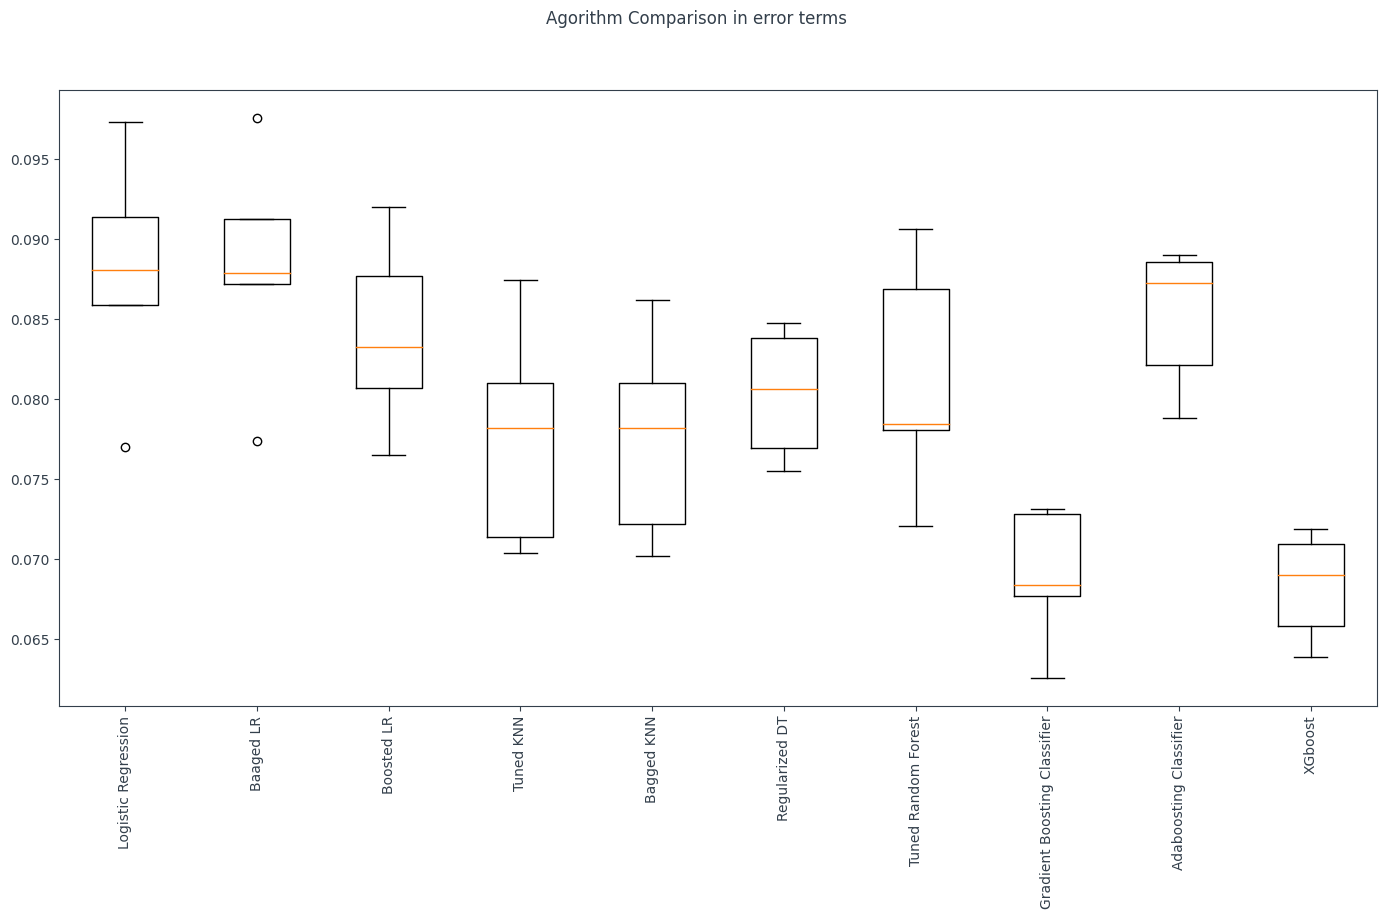

In [ ]:
fig = plt.figure(figsize=(17,8))
fig.suptitle('Agorithm Comparison in error terms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names,rotation=90)
plt.show()

# Feature Selection

In [ ]:
from sklearn.feature_selection import RFECV

rfe = RFECV(xgb,cv=3,scoring = 'roc_auc')
rfe.fit(xtrain,ytrain)

RFECV(cv=3,
      estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=2, ...),
      scoring='roc_auc')

In [ ]:
rfe_df = pd.DataFrame(list(xtrain),columns=['Feature'])
rfe_df['Rank'] = rfe.ranking_
best_features = rfe_df[rfe_df['Rank'] == 1]['Feature'].values
print('Best Features selected :')
print(best_features)

Best Features selected :
['Administrative' 'Administrative_Duration' 'ProductRelated'
 'ProductRelated_Duration' 'BounceRates' 'ExitRates' 'PageValues'
 'Month_Dec' 'Month_Mar' 'Month_May' 'Month_Nov' 'TrafficType_2'
 'TrafficType_4' 'TrafficType_8' 'VisitorType_Returning_Visitor']


In [ ]:
xtrain_rfe = xtrain[best_features]

ve = []
be = []
auc = cross_val_score(xgb,xtrain_rfe,ytrain,cv=3,scoring ='roc_auc')
v = np.std(auc,ddof=1)
ve.append(v)
b = np.mean(1-auc)
be.append(b)

In [ ]:
score_rfe = pd.DataFrame()
score_rfe['Model'] = ['XGBoost with RFECV']
score_rfe['Bias Error'] = be
score_rfe['Variance error'] = ve
score_rfe

Model  Bias Error  Variance error
0  XGBoost with RFECV    0.067489        0.002486

In [ ]:
score.iloc[[9]].append(score_rfe)

<ipython-input-183-12a8a64dd518>:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Model  Bias Error  Variance error
9             XGboost    0.068294        0.003390
0  XGBoost with RFECV    0.067489        0.002486

Conclusion - XGBoost without feature selection is working the best!

# Final Model Test Results without using SMOTE

In [ ]:
xgb_m = XGBClassifier(max_depth=3,learning_rate=0.1,random_state=2)
xgb = xgb_m.fit(xtrain,ytrain)
ypred_train = xgb.predict(xtrain)
ypred_test = xgb.predict(xtest)

print('Train Accuracy:',accuracy_score(ytrain,ypred_train))
print('Test Accuracy:',accuracy_score(ytest,ypred_test))
print()

print('Train Precision:',precision_score(ytrain,ypred_train))
print('Test Precision:',precision_score(ytest,ypred_test))

print()

print('Train Recall:',recall_score(ytrain,ypred_train))
print('Test Recall:',recall_score(ytest,ypred_test))

print()

print('Train f1 score:',f1_score(ytrain,ypred_train))
print('Test f1 score:',f1_score(ytest,ypred_test))

print()

ytrain_prob = xgb.predict_proba(xtrain)[:,1]
ytest_prob = xgb.predict_proba(xtest)[:,1]

print('Train ROC AUC Score',roc_auc_score(ytrain,ytrain_prob))
print('Test ROC AUC Score',roc_auc_score(ytest,ytest_prob))


# This is a good model since all the metrics improved significantly relative to the base model

# accuracy, precision,recall,f1 score and ROC AUC, all have improved significantly

Train Accuracy: 0.9176001029998713
Test Accuracy: 0.9078129224114626

Train Precision: 0.78900883218842
Test Precision: 0.7043478260869566

Train Recall: 0.6541903986981286
Test Recall: 0.6124763705103969

Train f1 score: 0.715302491103203
Test f1 score: 0.6552072800808898

Train ROC AUC Score 0.9497638018309932
Test ROC AUC Score 0.9254450096306943


In [ ]:

Final['Final Model without SMOTE'] = [accuracy_score(ytrain,ypred_train),accuracy_score(ytest,ypred_test),precision_score(ytrain,ypred_train),\
                      precision_score(ytest,ypred_test),recall_score(ytrain,ypred_train),recall_score(ytest,ypred_test),\
                      f1_score(ytrain,ypred_train),f1_score(ytest,ypred_test),roc_auc_score(ytrain,ytrain_prob),\
                       roc_auc_score(ytest,ytest_prob)]

In [ ]:
Final

Base Model  Base Model - Power Transformed  \
Train Accuracy         0.885413                        0.897901   
Test Accuracy          0.890781                        0.896999   
Train Precision        0.768621                        0.702980   
Test Precision         0.720848                        0.649798   
Train Recall           0.394630                        0.614321   
Test Recall            0.385633                        0.606805   
Train f1 score         0.521505                        0.655667   
Test f1 score          0.502463                        0.627566   
Train ROC AUC Score    0.898548                        0.917921   
Test ROC AUC Score     0.891177                        0.903096   

                     Final Model without SMOTE  
Train Accuracy                        0.917600  
Test Accuracy                         0.907813  
Train Precision                       0.789009  
Test Precision                        0.704348  
Train Recall                          0.654190  
Test Recall                           0.612476  
Train f1 score                        0.715302  
Test f1 score                         0.655207  
Train ROC AUC Score                   0.949764  
Test ROC AUC Score                    0.925445

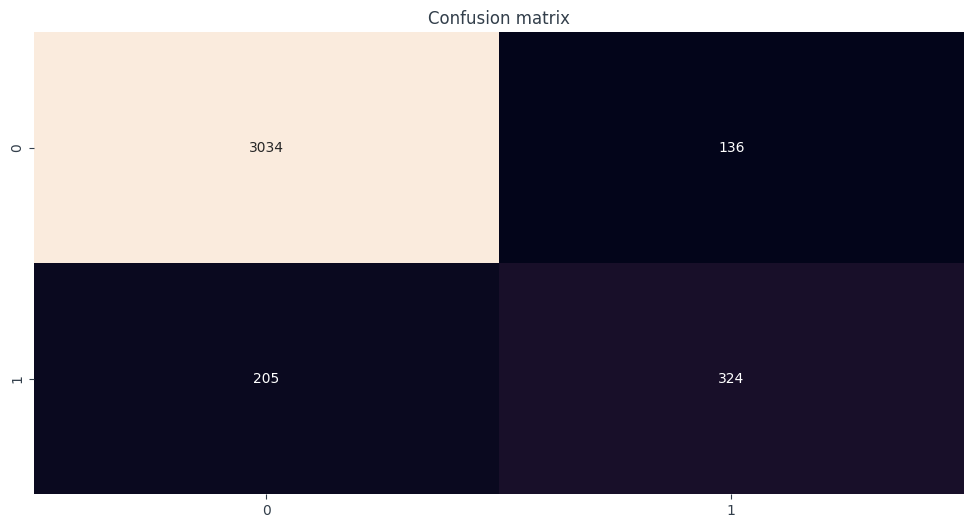

In [ ]:
# finally plotting confusion matrix for the test results

sns.heatmap(pd.DataFrame(confusion_matrix(ytest,ypred_test)),annot=True,fmt='d',cbar=False)
plt.title('Confusion matrix')
plt.show()

#167 sessions which were predicted as revenue positive but were actually revenue negative in the base model dropped to only 136
#209 sessions which were actually turning into revenue but were not able to get detected in the base model decreased slightly to 205

# there is not a very significant improvement from the base model in terms of reducing the false negatives

In [ ]:
confusion_matrix(ytest,ypred_test)

array([[3034,  136],
       [ 205,  324]])

In [ ]:
result_wosmote = pd.DataFrame({
    'Actual':ytest,
    'Predict':ypred_test
})

In [ ]:
result_wosmote

Actual  Predict
3566        0        0
50          0        0
5378        0        0
174         0        0
9061        0        0
...       ...      ...
5578        0        0
10672       0        0
10595       0        0
11407       0        0
10278       0        0

[3699 rows x 2 columns]

In [ ]:
sum((result_wosmote['Actual'] == 1) & (result_wosmote['Predict'] == 1))

324

In [ ]:
print(classification_report(ytest,ypred_test))

NameError: ignored

In [ ]:
import pickle
import joblib

In [ ]:
pickle.dump(xgb, open('/content/drive/MyDrive/Spacy_CV_PARSER_NER/model/Web_model/xgb_classifier.pkl', 'wb'))

In [ ]:
model = pickle.load(open("/content/drive/MyDrive/Spacy_CV_PARSER_NER/model/Web_model/xgb_classifier.pkl", "rb"))

In [ ]:
ypred_val = model.predict(xval)

print('Test Accuracy:',accuracy_score(yval,ypred_val))
print()

print('Test Precision:',precision_score(yval,ypred_val))

print()

print('Test Recall:',recall_score(yval,ypred_val))

print()

print('Test f1 score:',f1_score(yval,ypred_val))

ytrain_prob = xgb.predict_proba(xtrain)[:,1]
yval_prob = xgb.predict_proba(xval)[:,1]

print('Train ROC AUC Score',roc_auc_score(ytrain,ytrain_prob))
print('Validation ROC AUC Score',roc_auc_score(yval,yval_prob))

Test Accuracy: 0.9027777777777778

Test Precision: 0.75

Test Recall: 0.66

Test f1 score: 0.702127659574468
Train ROC AUC Score 0.9497638018309932
Validation ROC AUC Score 0.9424789915966387


In [ ]:
confusion_matrix(yval,ypred_val)

array([[681,  33],
       [ 51,  99]])

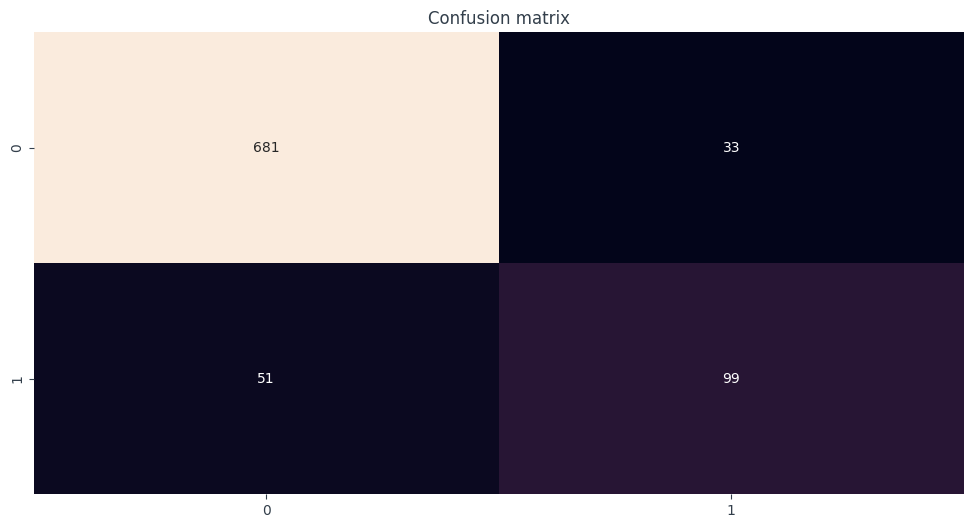

In [ ]:
sns.heatmap(pd.DataFrame(confusion_matrix(yval,ypred_val)),annot=True,fmt='d',cbar=False)
plt.title('Confusion matrix')
plt.show()

In [ ]:
print(classification_report(yval,ypred_val))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       714
           1       0.75      0.66      0.70       150

    accuracy                           0.90       864
   macro avg       0.84      0.81      0.82       864
weighted avg       0.90      0.90      0.90       864



In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.metrics import roc_curve
# plot for ROC Curve
def plot_roc_curve(fpr, tpr, label=None):
    '''
    ROC Curve plot with diagonal line
    '''
    plt.plot(fpr, tpr, linewidth=3, label=label)
    plt.plot([-0.1, 1.1], [-0.1, 1.1], 'k--') # dashed diagonal
    plt.axis([-0.1, 1.1, -0.1, 1.1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)

In [ ]:
fpr_val, tpr_val, threshold_val = roc_curve(yval, yval_prob)
fpr_train, tpr_train, threshold_train = roc_curve(ytrain, ytrain_prob)
fpr_test, tpr_test, threshold_test = roc_curve(ytest, ytest_prob)

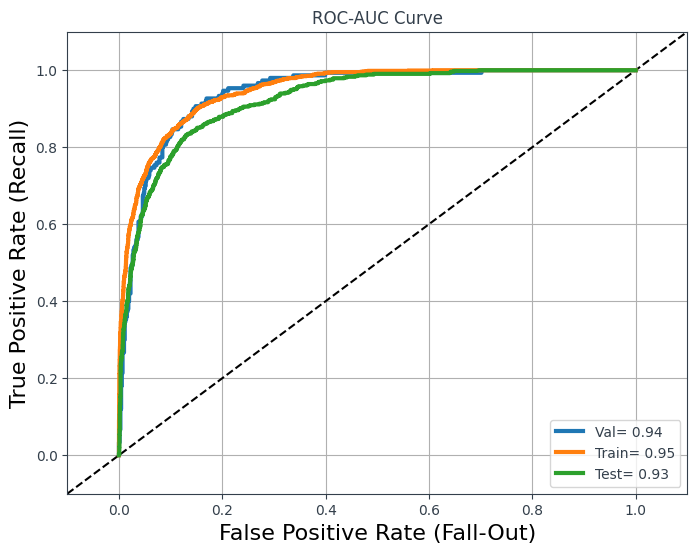

In [ ]:
plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr_val, tpr_val, label="Val" + "= " + str(round(roc_auc_score(yval, yval_prob),2)))
plt.plot(fpr_train, tpr_train, label="Train" + "= " + str(round(roc_auc_score(ytrain, ytrain_prob),2)), linewidth=3)
plt.plot(fpr_test, tpr_test, label="Test" + "= " + str(round(roc_auc_score(ytest, ytest_prob),2)), linewidth=3)
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()

In [ ]:
new_data = [[3.0, 8.0, 6.0, 10.0, 0.0, 0.01, 0.0, 1.0, 0.0, 1.0, 0.0, -0.5, 0.86, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
#new_data = [[1, 1, 1, 1, 1, 1, 1, 1, 1]]

In [ ]:
result = np.around(yval_prob, 2)
result

array([0.01, 0.37, 0.74, 0.01, 0.35, 0.02, 0.02, 0.23, 0.01, 0.69, 0.01,
       0.01, 0.02, 0.01, 0.91, 0.91, 0.02, 0.08, 0.95, 0.03, 0.33, 0.32,
       0.92, 0.01, 0.15, 0.05, 0.45, 0.01, 0.  , 0.04, 0.56, 0.93, 0.01,
       0.03, 0.06, 0.07, 0.01, 0.01, 0.05, 0.78, 0.01, 0.01, 0.06, 0.69,
       0.09, 0.84, 0.01, 0.52, 0.84, 0.65, 0.02, 0.04, 0.2 , 0.  , 0.61,
       0.11, 0.17, 0.02, 0.01, 0.85, 0.01, 0.46, 0.83, 0.03, 0.06, 0.02,
       0.03, 0.1 , 0.03, 0.  , 0.12, 0.  , 0.07, 0.  , 0.79, 0.37, 0.01,
       0.01, 0.63, 0.1 , 0.59, 0.03, 0.11, 0.76, 0.39, 0.01, 0.01, 0.09,
       0.  , 0.01, 0.76, 0.67, 0.  , 0.03, 0.61, 0.01, 0.01, 0.01, 0.01,
       0.95, 0.01, 0.03, 0.02, 0.01, 0.04, 0.13, 0.19, 0.74, 0.02, 0.16,
       0.18, 0.01, 0.01, 0.04, 0.06, 0.01, 0.75, 0.03, 0.04, 0.  , 0.95,
       0.01, 0.7 , 0.01, 0.5 , 0.06, 0.83, 0.01, 0.67, 0.  , 0.  , 0.03,
       0.58, 0.04, 0.01, 0.12, 0.01, 0.36, 0.13, 0.58, 0.06, 0.01, 0.03,
       0.01, 0.  , 0.08, 0.01, 0.01, 0.06, 0.01, 0.

In [ ]:
predictions = [round(value) for value in yval_prob]

In [ ]:
xval.iloc[0]

Administrative                  -0.990128
Administrative_Duration         -0.996659
Informational                   -0.520489
Informational_Duration          -0.491697
ProductRelated                   0.250488
ProductRelated_Duration         -0.460349
BounceRates                     -0.799209
ExitRates                       -1.358362
PageValues                      -0.529409
SpecialDay                      -0.336020
Weekend                          0.000000
Month_Dec                        0.000000
Month_Feb                        0.000000
Month_Jul                        0.000000
Month_June                       0.000000
Month_Mar                        0.000000
Month_May                        1.000000
Month_Nov                        0.000000
Month_Oct                        0.000000
Month_Sep                        0.000000
OperatingSystems_2               0.000000
OperatingSystems_3               1.000000
OperatingSystems_4               0.000000
OperatingSystems_5               0

In [ ]:
yval.iloc[0]

0

In [ ]:
xval.iloc[1]

Administrative                   1.040186
Administrative_Duration          1.083637
Informational                   -0.520489
Informational_Duration          -0.491697
ProductRelated                   0.536346
ProductRelated_Duration          1.069253
BounceRates                     -0.507523
ExitRates                       -0.376613
PageValues                       1.965736
SpecialDay                      -0.336020
Weekend                          0.000000
Month_Dec                        0.000000
Month_Feb                        0.000000
Month_Jul                        0.000000
Month_June                       0.000000
Month_Mar                        0.000000
Month_May                        1.000000
Month_Nov                        0.000000
Month_Oct                        0.000000
Month_Sep                        0.000000
OperatingSystems_2               0.000000
OperatingSystems_3               0.000000
OperatingSystems_4               0.000000
OperatingSystems_5               0

In [ ]:
yval.iloc[1]

1

In [ ]:
xval.iloc[2]

Administrative                  -0.990128
Administrative_Duration         -0.996659
Informational                   -0.520489
Informational_Duration          -0.491697
ProductRelated                  -0.295054
ProductRelated_Duration          0.061828
BounceRates                      1.782825
ExitRates                        1.217913
PageValues                       1.985321
SpecialDay                      -0.336020
Weekend                          0.000000
Month_Dec                        0.000000
Month_Feb                        0.000000
Month_Jul                        0.000000
Month_June                       0.000000
Month_Mar                        0.000000
Month_May                        0.000000
Month_Nov                        1.000000
Month_Oct                        0.000000
Month_Sep                        0.000000
OperatingSystems_2               0.000000
OperatingSystems_3               0.000000
OperatingSystems_4               0.000000
OperatingSystems_5               0

In [ ]:
yval.iloc[2]

0

In [ ]:
xval.iloc[14]

Administrative                  -0.990128
Administrative_Duration         -0.996659
Informational                   -0.520489
Informational_Duration          -0.491697
ProductRelated                   0.536346
ProductRelated_Duration          0.240023
BounceRates                     -0.799209
ExitRates                       -1.737320
PageValues                       1.982534
SpecialDay                      -0.336020
Weekend                          0.000000
Month_Dec                        0.000000
Month_Feb                        0.000000
Month_Jul                        0.000000
Month_June                       0.000000
Month_Mar                        1.000000
Month_May                        0.000000
Month_Nov                        0.000000
Month_Oct                        0.000000
Month_Sep                        0.000000
OperatingSystems_2               1.000000
OperatingSystems_3               0.000000
OperatingSystems_4               0.000000
OperatingSystems_5               0

In [ ]:
yval.iloc[14]

1

In [ ]:
result_wsmote = pd.DataFrame({
    'Actual': yval,
    'Prediction': predictions
})

In [ ]:
result_wsmote

Actual  Prediction
3247        0           0
4247        1           0
8705        0           1
1750        0           0
8921        1           0
...       ...         ...
8417        1           0
6228        0           0
10101       0           0
1625        0           0
9705        0           0

[864 rows x 2 columns]

In [ ]:
!pip install gradio==3.46.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.4/298.4 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 7.9 MB

In [ ]:
!pip install dataclasses

In [ ]:
DataFrame.iloc[row_index]

In [ ]:
import gradio as gr

In [ ]:
def osi(Administrative,Administrative_Duration,Informational,
       Informational_Duration,ProductRelated,ProductRelated_Duration,
       BounceRates,ExitRates,PageValues,SpecialDay,Weekend,
       Month_Dec, Month_Feb, Month_Jul,Month_June,Month_Mar,
       Month_May,Month_Nov,Month_Oct,Month_Sep,
       OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,
       OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,
       OperatingSystems_8,Browser_2,Browser_3,Browser_4,
       Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,
       Browser_10,Browser_11,Browser_12,Browser_13,TrafficType_2,
       TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,
       TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,
       TrafficType_11,TrafficType_12, TrafficType_13,TrafficType_14,
       TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,
       TrafficType_19,TrafficType_20,VisitorType_Other,
       VisitorType_Returning_Visitor):
#turning the arguments into a numpy array
  prediction = model.predict([[Administrative,Administrative_Duration,Informational,
       Informational_Duration,ProductRelated,ProductRelated_Duration,
       BounceRates,ExitRates,PageValues,SpecialDay,Weekend,
       Month_Dec, Month_Feb, Month_Jul,Month_June,Month_Mar,
       Month_May,Month_Nov,Month_Oct,Month_Sep,
       OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,
       OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,
       OperatingSystems_8,Browser_2,Browser_3,Browser_4,
       Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,
       Browser_10,Browser_11,Browser_12,Browser_13,TrafficType_2,
       TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,
       TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,
       TrafficType_11,TrafficType_12, TrafficType_13,TrafficType_14,
       TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,
       TrafficType_19,TrafficType_20,VisitorType_Other,
       VisitorType_Returning_Visitor]])
  if prediction == 1:
    return 'This customer will end-up buying things.\n(class = True/1 Revenue).'
  return 'This customer won\'t end-up buying things.\n(class = False/0 Revenue).'

output = gr.Textbox()


app = gr.Interface(fn = osi, inputs=['number','number','number','number','number','number','number','number','number','number',
                                     'number','number','number','number','number','number','number','number','number','number',
                                     'number','number','number','number','number','number','number','number','number','number',
                                     'number','number','number','number','number','number','number','number','number','number',
                                     'number','number','number','number','number','number','number','number','number','number',
                                     'number','number','number','number','number','number','number','number','number','number'], outputs=output)
app.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://5a6032e1fdd8eec249.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://5a6032e1fdd8eec249.gradio.live


# Final Model Test Results with SMOTE

# Feature Importance

In [ ]:
#final model with SMOTE

from imblearn.over_sampling import SMOTE
sm = SMOTE()
xsmote,ysmote = sm.fit_resample(xtrain,ytrain)
xgb = XGBClassifier(max_depth=3,learning_rate=0.1,random_state=2)
xgb.fit(xsmote,ysmote)
ypred_train = xgb.predict(xsmote)
ypred_test = xgb.predict(xtest)
print('Train Accuracy:',accuracy_score(ysmote,ypred_train))
print('Test Accuracy:',accuracy_score(ytest,ypred_test))
print()
print('Train Precision:',precision_score(ysmote,ypred_train))
print('Test Precision:',precision_score(ytest,ypred_test))
print()
print('Train Recall:',recall_score(ysmote,ypred_train))
print('Test Recall:',recall_score(ytest,ypred_test))
print()
print('Train f1 score:',f1_score(ysmote,ypred_train))
print('Test f1 score:',f1_score(ytest,ypred_test))
print()
ytrain_prob = xgb.predict_proba(xsmote)[:,1]
ytest_prob = xgb.predict_proba(xtest)[:,1]
print('Train ROC AUC Score',roc_auc_score(ysmote,ytrain_prob))
print('Test ROC AUC Score',roc_auc_score(ytest,ytest_prob))



Train Accuracy: 0.8938513306821658
Test Accuracy: 0.863206271965396

Train Precision: 0.8811426879810539
Test Precision: 0.5138387484957883

Train Recall: 0.9105230957479351
Test Recall: 0.8071833648393195

Train f1 score: 0.8955919963893486
Test f1 score: 0.6279411764705883

Train ROC AUC Score 0.9644253081100292
Test ROC AUC Score 0.9241390517195113


In [ ]:
Final['Final Model with SMOTE'] = [accuracy_score(ysmote,ypred_train),accuracy_score(ytest,ypred_test),precision_score(ysmote,ypred_train),\
                      precision_score(ytest,ypred_test),recall_score(ysmote,ypred_train),recall_score(ytest,ypred_test),\
                      f1_score(ysmote,ypred_train),f1_score(ytest,ypred_test),roc_auc_score(ysmote,ytrain_prob),\
                       roc_auc_score(ytest,ytest_prob)]

In [ ]:
Final

Base Model  Base Model - Power Transformed  \
Train Accuracy         0.885413                        0.897901   
Test Accuracy          0.890781                        0.896999   
Train Precision        0.768621                        0.702980   
Test Precision         0.720848                        0.649798   
Train Recall           0.394630                        0.614321   
Test Recall            0.385633                        0.606805   
Train f1 score         0.521505                        0.655667   
Test f1 score          0.502463                        0.627566   
Train ROC AUC Score    0.898548                        0.917921   
Test ROC AUC Score     0.891177                        0.903096   

                     Final Model without SMOTE  Final Model with SMOTE  
Train Accuracy                        0.917600                0.893851  
Test Accuracy                         0.907813                0.863206  
Train Precision                       0.789009                0.881143  
Test Precision                        0.704348                0.513839  
Train Recall                          0.654190                0.910523  
Test Recall                           0.612476                0.807183  
Train f1 score                        0.715302                0.895592  
Test f1 score                         0.655207                0.627941  
Train ROC AUC Score                   0.949764                0.964425  
Test ROC AUC Score                    0.925445                0.924139

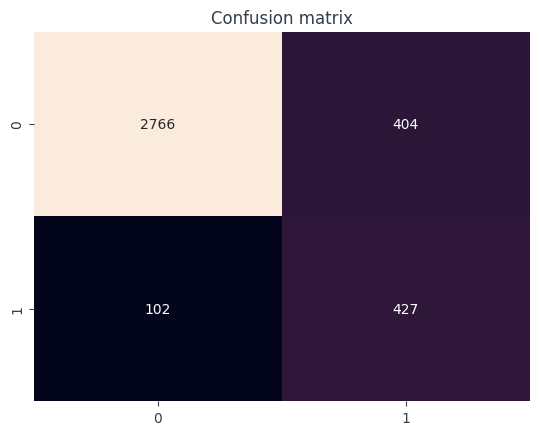

In [ ]:
sns.heatmap(pd.DataFrame(confusion_matrix(ytest,ypred_test)),annot=True,fmt='d',cbar=False)
plt.title('Confusion matrix')
plt.show()

#167 sessions which were predicted as revenue positive but were actually revenue negative in the base model increased to 393
#209 sessions which were actually turning into revenue but were not able to get detected in the base model decrea drastically decreased to 97

# there is a very significant improvement from the base model in terms of reducing the false negatives

# Separate Validation Set

In [ ]:
ypred_val_smote = xgb.predict(xval)

print('Test Accuracy:',accuracy_score(yval,ypred_val_smote))
print()

print('Test Precision:',precision_score(yval,ypred_val_smote))

print()

print('Test Recall:',recall_score(yval,ypred_val_smote))

print()

print('Test f1 score:',f1_score(yval,ypred_val_smote))

#ytrain_prob_smote = xgb.predict_proba(xsmote)[:,1]
yval_prob_smote = xgb.predict_proba(xval)[:,1]

#print('Train ROC AUC Score',roc_auc_score(ysmote,ytrain_prob_smote))
print('Validation ROC AUC Score',roc_auc_score(yval,yval_prob_smote))

Test Accuracy: 0.8622685185185185

Test Precision: 0.5682819383259912

Test Recall: 0.86

Test f1 score: 0.6843501326259946
Validation ROC AUC Score 0.938515406162465


In [ ]:
confusion_matrix(yval,ypred_val_smote)

array([[616,  98],
       [ 21, 129]])

In [ ]:
print(classification_report(yval,ypred_val_smote))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       714
           1       0.57      0.86      0.68       150

    accuracy                           0.86       864
   macro avg       0.77      0.86      0.80       864
weighted avg       0.90      0.86      0.87       864



In [ ]:
yval,ypred_val_smote

(3247     0
 4247     1
 8705     0
 1750     0
 8921     1
         ..
 8417     1
 6228     0
 10101    0
 1625     0
 9705     0
 Name: Revenue, Length: 864, dtype: int64,
 array([0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
        1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
        1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        0, 

In [ ]:
Final

Base Model  Base Model - Power Transformed  \
Train Accuracy         0.885413                        0.897901   
Test Accuracy          0.890781                        0.896999   
Train Precision        0.768621                        0.702980   
Test Precision         0.720848                        0.649798   
Train Recall           0.394630                        0.614321   
Test Recall            0.385633                        0.606805   
Train f1 score         0.521505                        0.655667   
Test f1 score          0.502463                        0.627566   
Train ROC AUC Score    0.898548                        0.917921   
Test ROC AUC Score     0.891177                        0.903096   

                     Final Model without SMOTE  Final Model with SMOTE  
Train Accuracy                        0.917600                0.891328  
Test Accuracy                         0.907813                0.864288  
Train Precision                       0.789009                0.881013  
Test Precision                        0.704348                0.516245  
Train Recall                          0.654190                0.904864  
Test Recall                           0.612476                0.810964  
Train f1 score                        0.715302                0.892779  
Test f1 score                         0.655207                0.630882  
Train ROC AUC Score                   0.949764                0.964376  
Test ROC AUC Score                    0.925445                0.922513

Final Conclusion - If the aim of the model is to minimize the the undetected revenue sessions (False Negatives) and at the cost of incorrectly predicting non-revenue sessions as revenue sessions, then SMOTE model should be chosen. If the aim of the company is to just focus on the recall value, then it must go ahead with a SMOTE analysis. Further, there is a high level of overfitting in the SMOTE model.

For the current analysis, I will go ahead with a more generalized model i.e without SMOTE

In [ ]:
# business interpretation/explanation of the model
xgb = XGBClassifier(max_depth=3,learning_rate=0.1,random_state=2)
xgb.fit(xtrain,ytrain)
rank = pd.DataFrame()
rank['Features'] = xtrain.columns
rank['Rank'] = xgb.feature_importances_
rank.sort_values(by='Rank',ascending=False).head(10)

Features      Rank
8                      PageValues  0.430050
17                      Month_Nov  0.070620
16                      Month_May  0.067921
6                     BounceRates  0.041456
0                  Administrative  0.041198
59  VisitorType_Returning_Visitor  0.039551
15                      Month_Mar  0.037137
4                  ProductRelated  0.028148
7                       ExitRates  0.024521
5         ProductRelated_Duration  0.024236

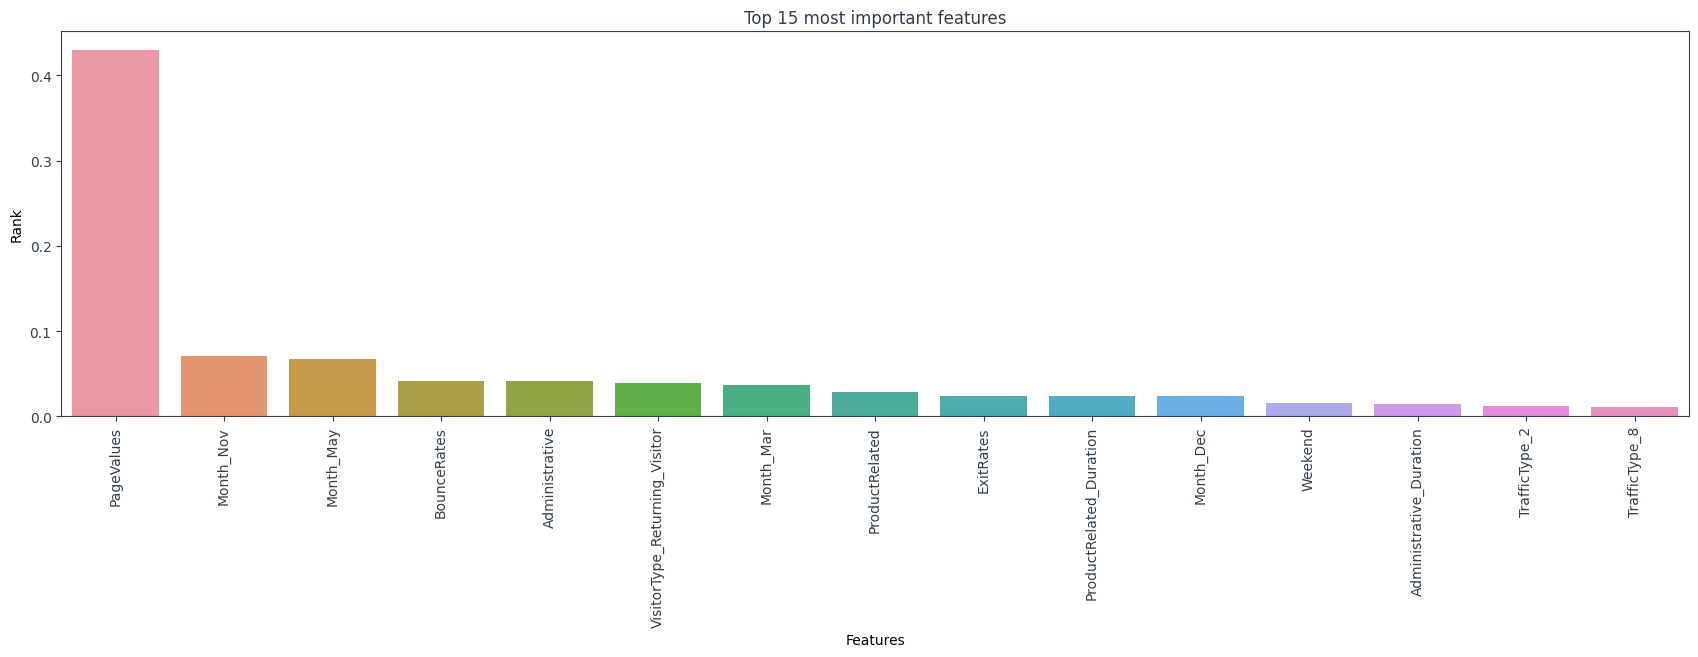

In [ ]:
plt.figure(figsize=(21,5))
sns.barplot(x='Features',y='Rank',data=rank.sort_values(by='Rank',ascending=False).head(15))
plt.title('Top 15 most important features')
plt.xticks(rotation=90)
plt.show()

In [ ]:
print('Features adding least value / areas not to be focussed on :')
print()
print(rank.sort_values(by='Rank',ascending=False).tail(28)['Features'].values)

Features adding least value / areas not to be focussed on :

['Browser_3' 'TrafficType_9' 'VisitorType_Other' 'SpecialDay'
 'TrafficType_19' 'TrafficType_18' 'TrafficType_17' 'TrafficType_16'
 'TrafficType_15' 'TrafficType_14' 'Month_Jul' 'TrafficType_12'
 'Month_June' 'Month_Sep' 'Browser_7' 'TrafficType_7' 'TrafficType_6'
 'TrafficType_5' 'OperatingSystems_4' 'OperatingSystems_5'
 'OperatingSystems_6' 'Browser_13' 'Browser_12' 'Browser_11'
 'OperatingSystems_7' 'Browser_9' 'OperatingSystems_8' 'Browser_8']


# Conclusion

- XGBoost works wonders on this data
- If the aim of the model is to minimize the the undetected revenue sessions (False Negatives) and at the cost of incorrectly predicting non-revenue sessions as revenue sessions, then SMOTE model should be chosen.
If the aim of the company is to just focus on the recall value, then it must go ahead with a SMOTE analysis. Further, there is a high level of overfitting in the SMOTE model

In [ ]:
pip install db-sqlite3

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for db-sqlite3: filename=db_sqlite3-0.0.1-py3-none-any.whl size=1769 sha256=37742c49dab076a1bffb80656ba38d0c8b982417d1de7a69646e15d80035bb12
  Stored in directory: /root/.cache/pip/wheels/a6/b7/83/e941e0a0e04f417982e718ae7295d1e82b5f2863a1c51edd71
  Created wheel for db: filename=db-0.1.1-py3-none-any.whl size=3874 sha256=2de062ca6898faead68e6b0054bf6d45d53040a9bf521b90873494a1579bef73
  Stored in directory: /root/.cache/pip/wheels/7d/e4/df/bc55b93af204ab098d9effec76f6889ad12d7ad74e833c4910
  Created wheel for antiorm: filename=antiorm-1.2.1-py3-none-any.whl size=31664 sha256=5bf9bfb56c91f283558c6ea3b73b65800e5a35bf532707eadb129e02a655c1ee
  Stored in directory: /root/.cache/pip/wheels/30/9f/7e/b7c95b391cfa77a9e722d359e9c669cf6c8d798d748aec5091
Successfully built db-sq

In [ ]:
import sqlite3
import pandas as pd

In [ ]:
# step 1: load data file
df = pd.read_csv('/content/drive/MyDrive/Spacy_CV_PARSER_NER/online_shoppers_intention.csv')

In [ ]:
#step 2: Data Clean up
df.columns = df.columns.str.strip()

In [ ]:
#step3: create/connect to a sqlite database
connection = sqlite3.connect('/content/drive/MyDrive/Spacy_CV_PARSER_NER/data_base/web_analytics.db')

In [ ]:
#step 4upload data file to sqlite
#fail;replace;append
df.to_sql('online_shop_intention',connection,if_exists='replace')


12330

In [ ]:
#Step 5. close connection
connection.close()

AttributeError: ignored

In [ ]:
query = "select * from online_shop_intention "
result = pd.read_sql_query(query,connection)

In [ ]:
result.head()

index  Administrative  Administrative_Duration  Informational  \
0      0               0                      0.0              0   
1      1               0                      0.0              0   
2      2               0                      0.0              0   
3      3               0                      0.0              0   
4      4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor        0        0  
1        2       1            2  Returning_Visitor        0        0  
2        1       9            3  Returning_Visitor        0        0  
3        2       2            4  Returning_Visitor        0        0  
4        3       1            4  Returning_Visitor        1        0